https://springernature.figshare.com/collections/_/5314466

van Woesik, Robert; Kratochwill, Chelsey (2022): A Global Coral-Bleaching Database (GCBD), 1998–2020. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.5314466.v1

##Data Introduction

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/DSC101/Data/"
df = pd.read_csv(data_path+"CB1.csv")


Mounted at /content/drive


In [ ]:
#cb2016 = cbA[cbA['Date_Year'] == 2016]

In [ ]:
df.shape

(41361, 52)

In [ ]:
df.head(7)

Site_ID  Sample_ID Data_Source  Latitude_Degrees  Longitude_Degrees  \
0     2501   10324336      Donner            23.163           -82.5260   
1     3467   10324754      Donner           -17.575          -149.7833   
2     1794   10323866      Donner            18.369           -64.5640   
3     8647   10328028      Donner            17.760           -64.5680   
4     8648   10328029      Donner            17.769           -64.5830   
5     2180   10324021      Donner             9.822           -75.8910   
6     9298   10328657      Donner            17.811           -64.6300   

  Ocean_Name            Realm_Name  Distance_to_Shore   Exposure  Turbidity  \
0   Atlantic     Tropical Atlantic            8519.23    Exposed     0.0287   
1    Pacific  Eastern Indo-Pacific            1431.62    Exposed     0.0262   
2   Atlantic     Tropical Atlantic             182.33    Exposed     0.0429   
3   Atlantic     Tropical Atlantic             313.13    Exposed     0.0424   
4   Atlantic     Tropical Atlantic             792.00    Exposed     0.0424   
5   Atlantic     Tropical Atlantic            4569.60  Sometimes     0.0954   
6   Atlantic     Tropical Atlantic            2399.36    Exposed     0.0372   

   ...  TSA_Maximum  TSA_Mean  TSA_Frequency  \
0  ...         1.83     -2.17           0.00   
1  ...         3.00     -1.26           0.25   
2  ...         2.31     -1.49           7.00   
3  ...         2.19     -1.49           3.00   
4  ...         1.87     -1.50           3.00   
5  ...         2.42     -1.02           2.00   
6  ...         1.99     -1.48           6.00   

   TSA_Frequency_Standard_Deviation  TSA_FrequencyMax TSA_FrequencyMean  \
0                              1.09               5.0               0.0   
1                              0.93               4.0               0.0   
2                              1.31               7.0               0.0   
3                              0.94               4.0               0.0   
4                              1.33               5.0               0.0   
5                              2.29              11.0               2.0   
6                              1.24               6.0               0.0   

   TSA_DHW TSA_DHW_Standard_Deviation  TSA_DHWMax  TSA_DHWMean  
0     0.00                       0.74        7.25         0.18  
1     0.26                       0.67        4.65         0.19  
2     0.00                       1.04       11.66         0.26  
3     0.00                       0.75        5.64         0.20  
4     0.00                       0.92        6.89         0.25  
5     2.21                       1.47       14.40         0.64  
6     6.89                       0.77        6.89         0.22  

[7 rows x 52 columns]

##Cleaning

In [ ]:
df.columns

Index(['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees',
       'Longitude_Degrees', 'Ocean_Name', 'Realm_Name', 'Distance_to_Shore',
       'Exposure', 'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month',
       'Date_Year', 'Depth_m', 'Substrate_Name', 'Percent_Cover',
       'Bleaching_Level', 'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard

In [ ]:
cb = df.drop(['Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
      'SSTA_Frequency_Standard_Deviation','SSTA_FrequencyMax', 'SSTA_FrequencyMean',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean',], axis=1)

In [ ]:
cb.columns

Index(['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees',
       'Longitude_Degrees', 'Ocean_Name', 'Realm_Name', 'Distance_to_Shore',
       'Exposure', 'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month',
       'Date_Year', 'Depth_m', 'Substrate_Name', 'Percent_Cover',
       'Bleaching_Level', 'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin',
       'Windspeed', 'SSTA', 'SSTA_Frequency', 'SSTA_DHW', 'TSA',
       'TSA_Frequency', 'TSA_DHW'],
      dtype='object')

*  delete site_id and Sample_id and data source - irrelevent for model creation
*  delete realm name (bc basically same as ocena name)
*  delete Date_Day bc not really related year to year ?

*   when test correlaiton also delete: 'SSTA', 'SSTA_Frequency', 'TSA','TSA_Frequency', 'TSA_DHW'
*   List item



In [ ]:
cb = cb.drop(['Latitude_Degrees', 'Longitude_Degrees','Site_ID', 'Sample_ID', 'Data_Source','Realm_Name', 'Date_Day', 'Bleaching_Level','SSTA', 'SSTA_Frequency', 'TSA','TSA_Frequency', 'TSA_DHW',], axis=1)

In [ ]:
cb.columns

Index(['Ocean_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity',
       'Cyclone_Frequency', 'Date_Month', 'Date_Year', 'Depth_m',
       'Substrate_Name', 'Percent_Cover', 'Percent_Bleaching', 'ClimSST',
       'Temperature_Kelvin', 'Windspeed', 'SSTA_DHW'],
      dtype='object')

In [ ]:
cb.head()

Ocean_Name  Distance_to_Shore Exposure  Turbidity  Cyclone_Frequency  \
0   Atlantic            8519.23  Exposed     0.0287              49.90   
1    Pacific            1431.62  Exposed     0.0262              51.20   
2   Atlantic             182.33  Exposed     0.0429              61.52   
3   Atlantic             313.13  Exposed     0.0424              65.39   
4   Atlantic             792.00  Exposed     0.0424              65.39   

   Date_Month  Date_Year  Depth_m Substrate_Name  Percent_Cover  \
0           9       2005    10.00          -9999        -9999.0   
1           3       1991    14.00          -9999        -9999.0   
2           1       2006     7.00          -9999        -9999.0   
3           4       2006     9.02          -9999        -9999.0   
4           4       2006    12.50          -9999        -9999.0   

   Percent_Bleaching  ClimSST  Temperature_Kelvin  Windspeed  SSTA_DHW  
0               50.2   301.61              302.05        8.0      0.00  
1               50.7   262.15              303.30        2.0      0.26  
2               50.9   298.79              299.18        8.0      0.00  
3               50.9   300.16              299.61        3.0      0.00  
4               50.9   300.15              299.70        3.0      0.00

Actual columns we might use^^^

In [ ]:
#cb2016 = cbA[cbA['Date_Year'] == 2016]

###Remove missing values 

In [ ]:
cb.shape

(41361, 15)

**other types of missing values ot check 

In [ ]:
cb= cb.drop('Percent_Cover', axis=1) #if want to drop column 

In [ ]:
cb= cb.drop('Substrate_Name', axis=1)

In [ ]:
cbmv = cb == -9999.0
count_of_cbmv = cbmv.sum()

print(count_of_cbmv)

Ocean_Name               0
Distance_to_Shore        2
Exposure                 0
Turbidity                6
Cyclone_Frequency        0
Date_Month               0
Date_Year                0
Depth_m               1799
Percent_Bleaching     6846
ClimSST                113
Temperature_Kelvin     148
Windspeed              129
SSTA_DHW               148
dtype: int64


In [ ]:
new_cb = cb[~cb.isin([-9999.0])].dropna()

In [ ]:
new_cbmv = new_cb == -9999.0
clean_cb = new_cbmv.sum()

print(clean_cb)

Ocean_Name            0
Distance_to_Shore     0
Exposure              0
Turbidity             0
Cyclone_Frequency     0
Date_Month            0
Date_Year             0
Depth_m               0
Percent_Bleaching     0
ClimSST               0
Temperature_Kelvin    0
Windspeed             0
SSTA_DHW              0
dtype: int64


In [ ]:
new_cb.shape

(32714, 13)

In [ ]:
new_cb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32714 entries, 0 to 35044
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ocean_Name          32714 non-null  object 
 1   Distance_to_Shore   32714 non-null  float64
 2   Exposure            32714 non-null  object 
 3   Turbidity           32714 non-null  float64
 4   Cyclone_Frequency   32714 non-null  float64
 5   Date_Month          32714 non-null  int64  
 6   Date_Year           32714 non-null  int64  
 7   Depth_m             32714 non-null  float64
 8   Percent_Bleaching   32714 non-null  float64
 9   ClimSST             32714 non-null  float64
 10  Temperature_Kelvin  32714 non-null  float64
 11  Windspeed           32714 non-null  float64
 12  SSTA_DHW            32714 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 3.5+ MB


In [ ]:
a=new_cb['Date_Year'].unique()
print(a)

[2005 1991 2006 1996 2009 1998 1988 2008 2010 2000 1992 2011 1993 2002
 2007 2004 1994 2003 2001 1983 1987 2016 2013 2015 1999 1997 1995 2012
 2014 1990 2017 2018 2019]


In [ ]:
value_counts = new_cb["Date_Year"].value_counts()
print(value_counts)

2005    3886
2006    2775
2009    1931
2008    1903
2016    1803
2004    1677
2003    1644
2017    1581
2015    1558
2010    1549
2007    1519
2013    1517
2014    1409
2012    1400
2011    1356
2018    1243
2019    1174
1999     721
2001     704
2002     565
2000     549
1998     177
1987      16
1994      11
1996      10
1997       9
1993       6
1995       6
1992       5
1991       4
1983       4
1988       1
1990       1
Name: Date_Year, dtype: int64


Because so few values delete 1998, back

In [ ]:
values_to_drop = [1998, 1987, 1994,1996,1997,1993,1995,1992,1991,1983,1988,1990]

# Use boolean indexing to filter and drop rows with 'Date_Year' in the list of values to drop
new_cb = new_cb[~new_cb['Date_Year'].isin(values_to_drop)]

In [ ]:
a=new_cb['Ocean_Name'].unique()
print(a)

['Atlantic' 'Pacific' 'Indian' 'Arabian Gulf' 'Red Sea']


In [ ]:
value_counts = new_cb["Ocean_Name"].value_counts()
print(value_counts)

Pacific         16170
Atlantic        12968
Indian           1948
Red Sea          1037
Arabian Gulf      341
Name: Ocean_Name, dtype: int64


In [ ]:
a=new_cb['Exposure'].unique()
print(a)

['Exposed' 'Sometimes' 'Sheltered']


In [ ]:
value_counts = new_cb["Exposure"].value_counts()
print(value_counts)

Sheltered    18085
Exposed      11723
Sometimes     2656
Name: Exposure, dtype: int64


In [ ]:
value_counts = new_cb["Percent_Bleaching"].value_counts()
print(value_counts)

0.00     16534
0.25       882
5.50       723
1.00       698
0.50       677
         ...  
8.85         1
8.68         1
8.67         1
8.62         1
97.22        1
Name: Percent_Bleaching, Length: 2126, dtype: int64


In [ ]:
new_cb.head()

Ocean_Name  Distance_to_Shore   Exposure  Turbidity  Cyclone_Frequency  \
0   Atlantic            8519.23    Exposed     0.0287              49.90   
2   Atlantic             182.33    Exposed     0.0429              61.52   
3   Atlantic             313.13    Exposed     0.0424              65.39   
4   Atlantic             792.00    Exposed     0.0424              65.39   
5   Atlantic            4569.60  Sometimes     0.0954              51.54   

   Date_Month  Date_Year  Depth_m  Percent_Bleaching  ClimSST  \
0           9       2005    10.00               50.2   301.61   
2           1       2006     7.00               50.9   298.79   
3           4       2006     9.02               50.9   300.16   
4           4       2006    12.50               50.9   300.15   
5           8       2005    11.50               51.0   302.63   

   Temperature_Kelvin  Windspeed  SSTA_DHW  
0              302.05        8.0      0.00  
2              299.18        8.0      0.00  
3              299.61        3.0      0.00  
4              299.70        3.0      0.00  
5              303.22        1.0      4.28

In [ ]:
from google.colab import files
file_name = "clean_cb.csv"

# save the file to Colab's file system
new_cb.to_csv(file_name, index=False)

#download the file to local machine
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Convert all colums to numerical values

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/DSC101/Data/"
data = pd.read_csv(data_path+'clean_cb.csv')

Mounted at /content/drive


In [ ]:
data.shape

(32464, 13)

In [ ]:
new_cb=data.copy()

In [ ]:
new_cb.columns

Index(['Ocean_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity',
       'Cyclone_Frequency', 'Date_Month', 'Date_Year', 'Depth_m',
       'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin', 'Windspeed',
       'SSTA_DHW'],
      dtype='object')

In [ ]:
value_counts = data["Ocean_Name"].value_counts()
print(value_counts)

Pacific         16170
Atlantic        12968
Indian           1948
Red Sea          1037
Arabian Gulf      341
Name: Ocean_Name, dtype: int64


In [ ]:
# loop through each column in the DataFrame
for col in new_cb.columns:
    # check if the column is an object type
    if new_cb[col].dtype == 'object':
        # convert the column to a numeric category
        new_cb[col] = new_cb[col].factorize()[0]

In [ ]:
value_counts = new_cb["Ocean_Name"].value_counts()
print(value_counts)

1    16170
0    12968
2     1948
4     1037
3      341
Name: Ocean_Name, dtype: int64


In [ ]:
new_cb5=new_cb.copy()

###Removing Outliers

In [ ]:
#I added how we coud remove the outliers but than there is not a lot of values left. Leaving for show but not actually removing outliers in used data

In [ ]:
# select only columns with float dtype
fl_cols = new_cb.select_dtypes(include='float').columns.tolist()

# remove outliers using IQR method
Q1 = new_cb[fl_cols].quantile(0.25)
Q3 = new_cb[fl_cols].quantile(0.75)
IQR = Q3 - Q1 

df_truncated = new_cb[~((new_cb[fl_cols] < (Q1 - 1.5 * IQR)) | (new_cb[fl_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_truncated.shape

(15198, 13)

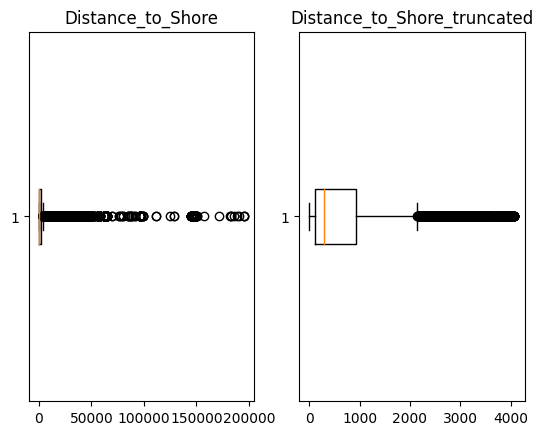

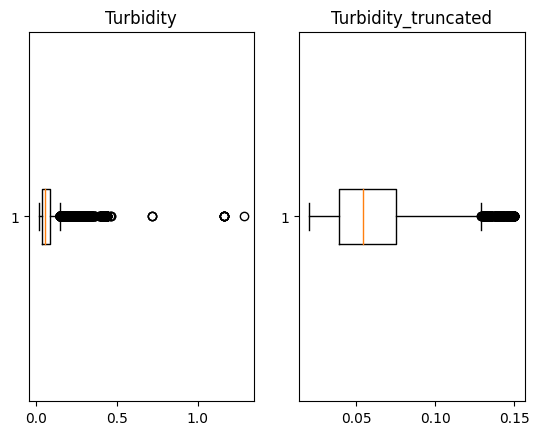

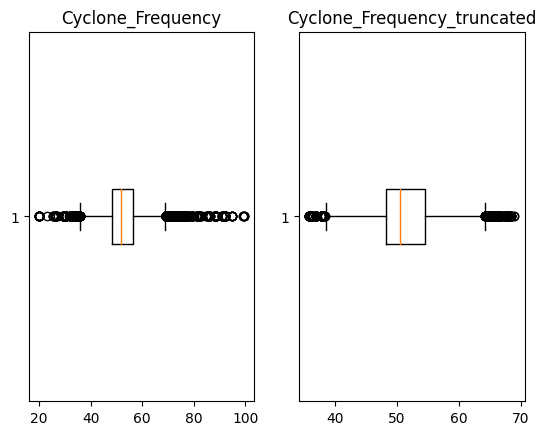

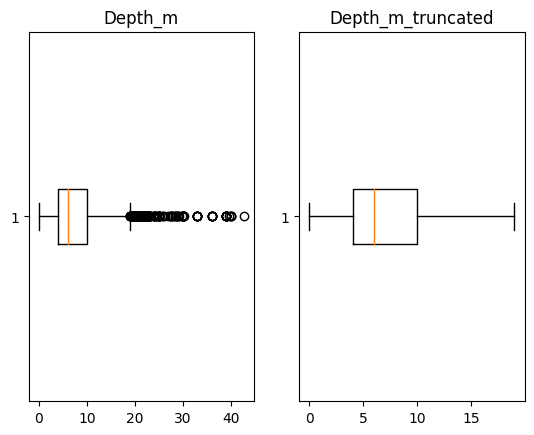

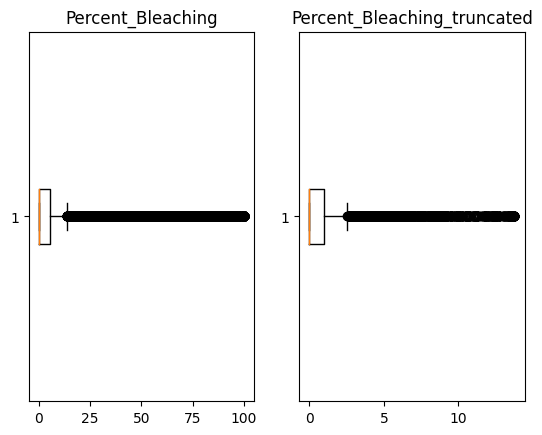

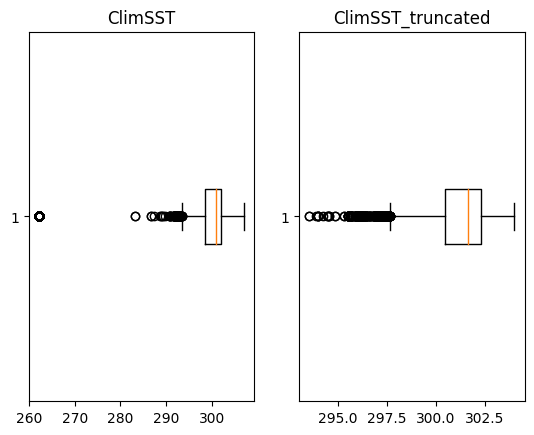

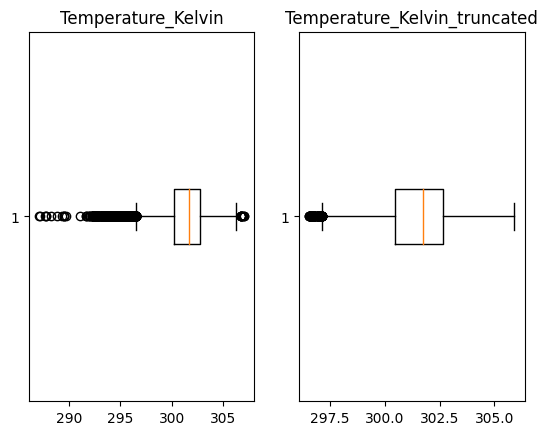

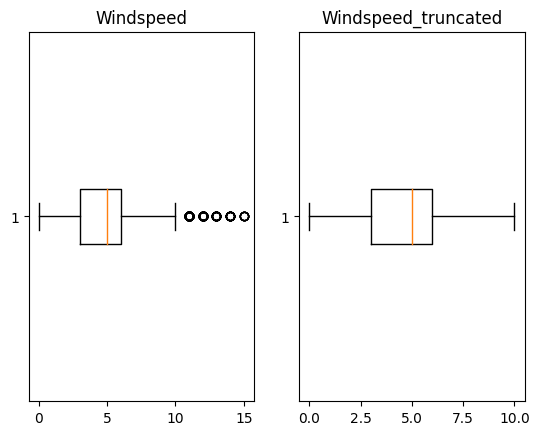

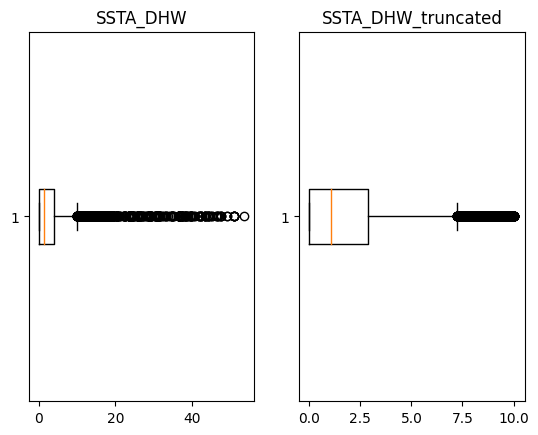

In [ ]:
import matplotlib.pyplot as plt
for column in fl_cols:
    plt.subplot(121)
    plt.boxplot(new_cb[column], vert=False)
    plt.title(column)
    
    plt.subplot(122)
    plt.boxplot(df_truncated[column], vert=False)
    plt.title(column+'_truncated')
    plt.show()

##Visualisation

In [ ]:
#new_cb=data.copy()

In [ ]:
new_cb.columns

Index(['Ocean_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity',
       'Cyclone_Frequency', 'Date_Month', 'Date_Year', 'Depth_m',
       'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin', 'Windspeed',
       'SSTA_DHW'],
      dtype='object')

In [ ]:
#import Libraries 
import seaborn as sns
import matplotlib.pyplot as plt

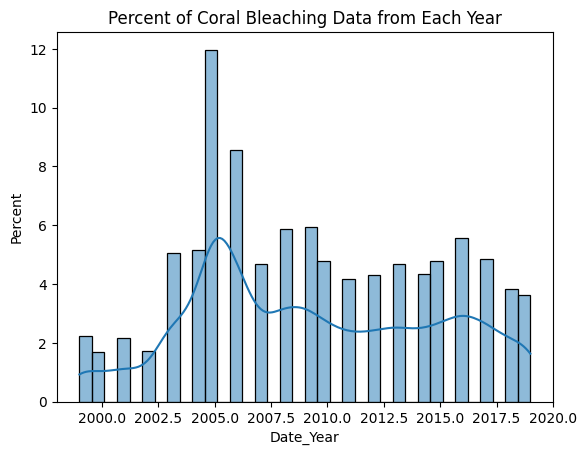

In [ ]:
from matplotlib.patches import Shadow
# Plot a probability histogram of the total crop land of Armenia
sns.histplot(x="Date_Year", data=new_cb, stat='percent',kde=True) #stat=density is the y value #kde=->the line
plt.title("Percent of Coral Bleaching Data from Each Year")

# Show the plot
plt.show()

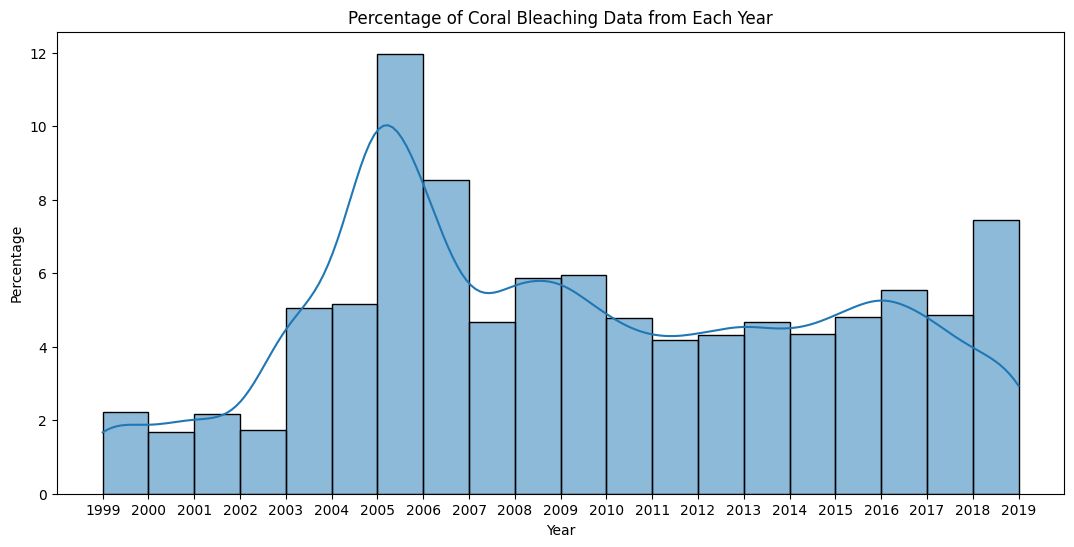

In [ ]:
from matplotlib.patches import Shadow
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(13, 6))

# Plot a probability histogram of the total crop land of Armenia
sns.histplot(x="Date_Year", data=new_cb, stat='percent', kde=True, binwidth=1)

# Set the title and axis labels
plt.title("Percentage of Coral Bleaching Data from Each Year")
plt.xlabel("Year")
plt.ylabel("Percentage")

# Set the tick values for the x-axis
plt.xticks(range(1999, 2020))

# Show the plot
plt.show()

###Ocean distribution


In [ ]:
value_counts = data["Ocean_Name"].value_counts()
print(value_counts)

Pacific         16170
Atlantic        12968
Indian           1948
Red Sea          1037
Arabian Gulf      341
Name: Ocean_Name, dtype: int64


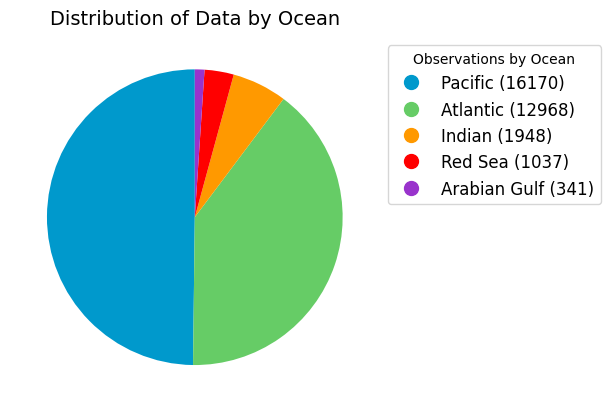

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

ocean_counts = data['Ocean_Name'].value_counts()

# Define the colors for each ocean
ocean_colors = {
    'Pacific': '#0099cc', 
    'Atlantic': '#66cc66', 
    'Indian': '#ff9900',  
    'Red Sea': 'red',  
    'Arabian Gulf': '#9933cc',  
}

# Create a pie chart using the defined colors and without displaying percentages and without labels
pie, _ = plt.pie(ocean_counts.values, startangle=90, colors=[ocean_colors[ocean] for ocean in ocean_counts.index])

# Set the title for the pie chart
plt.title("Distribution of Data by Ocean", fontsize=14)

# Create a legend for color and percentage
legend_labels = []
for label, percent, wedge in zip(ocean_counts.index, ocean_counts.values, pie):
    legend_labels.append(f"{label} ({percent})")
    plt.plot([], [], color=ocean_colors[label], marker='o', markersize=10, label=f"{label} ({percent}%)", linewidth=0, markerfacecolor=ocean_colors[label])
plt.legend(handles=plt.gca().lines, labels=legend_labels, title='Observations by Ocean', loc='center left', bbox_to_anchor=(1, 0.75), fontsize=12, handler_map={tuple: HandlerTuple(ndivide=None)})

# Remove y-axis label
plt.ylabel('')

# Show the pie chart
plt.show()

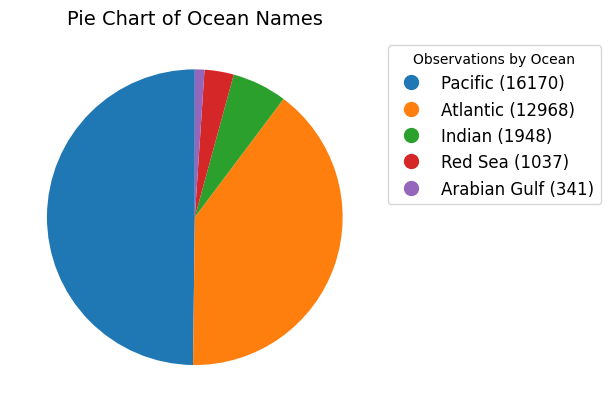

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

ocean_counts = data['Ocean_Name'].value_counts()

# Create a pie chart without displaying percentages and without labels
pie = ocean_counts.plot.pie(autopct='', startangle=90, labels=None)

# Set the title for the pie chart
plt.title("Pie Chart of Ocean Names", fontsize=14)

# Create a legend for color and percentage
legend_labels = []
for label, percent, text, wedge in zip(ocean_counts.index, ocean_counts.values, pie.texts, pie.patches):
    legend_labels.append(f"{label} ({percent})")
    plt.plot([], [], color=wedge.get_facecolor(), marker='o', markersize=10, label=f"{label} ({percent}%)", linewidth=0, markerfacecolor=wedge.get_facecolor())
plt.legend(handles=plt.gca().lines, labels=legend_labels, title='Observations by Ocean', loc='center left', bbox_to_anchor=(1, 0.75), fontsize=12, handler_map={tuple: HandlerTuple(ndivide=None)})

# Remove y-axis label
plt.ylabel('')

# Show the pie chart
plt.show()

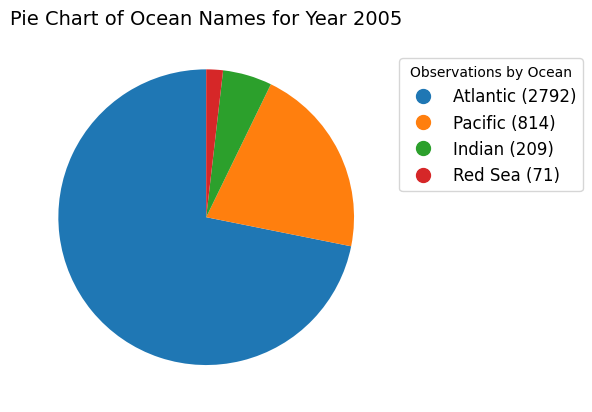

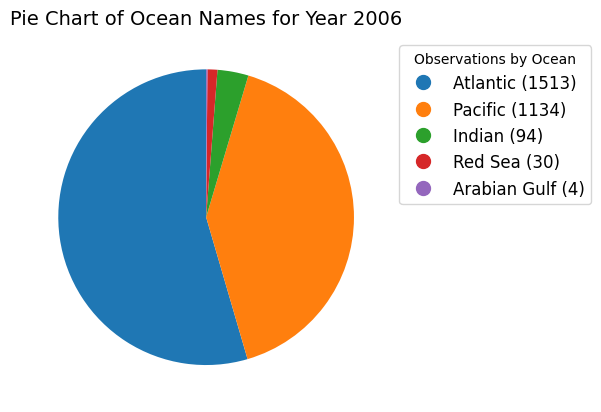

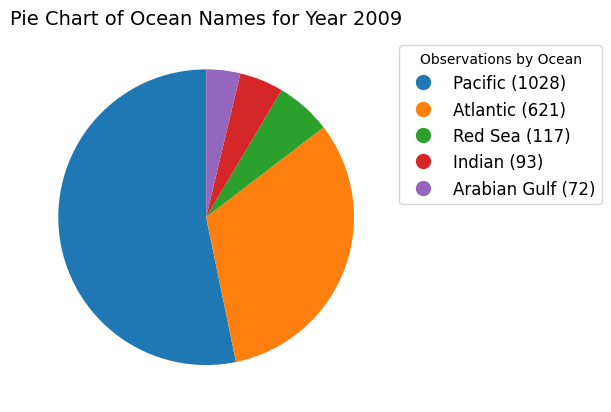

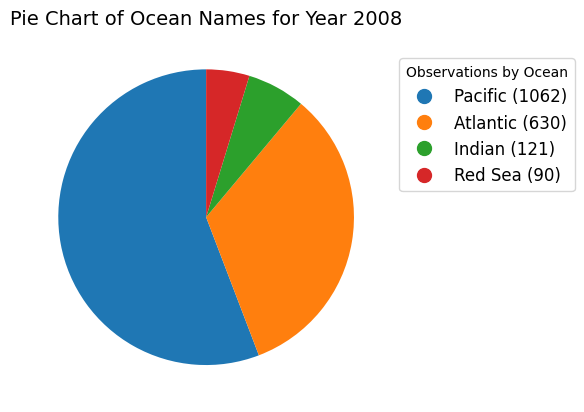

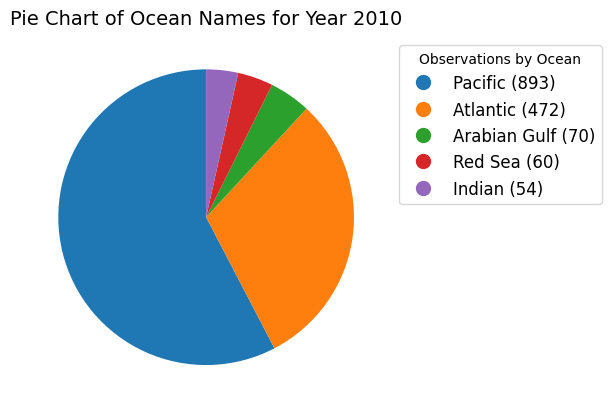

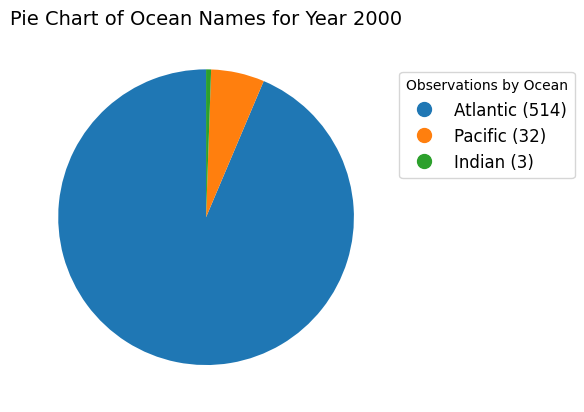

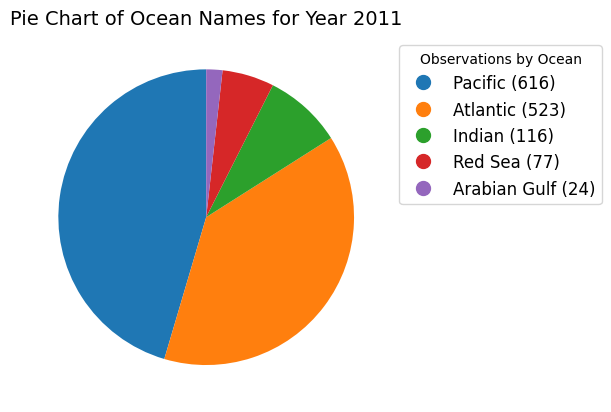

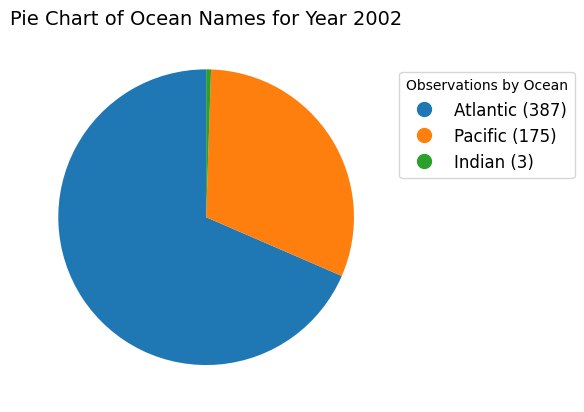

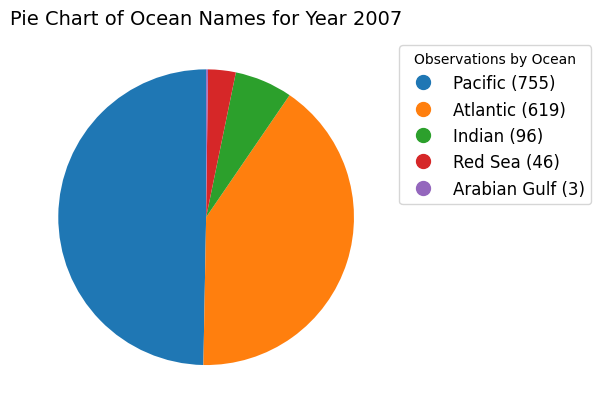

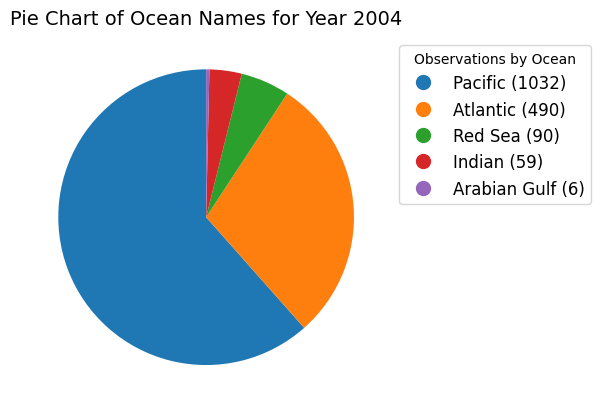

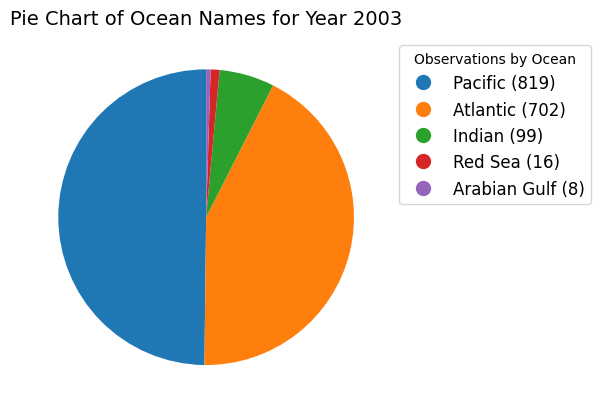

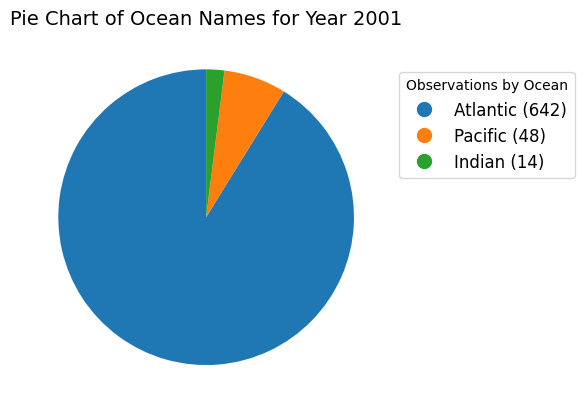

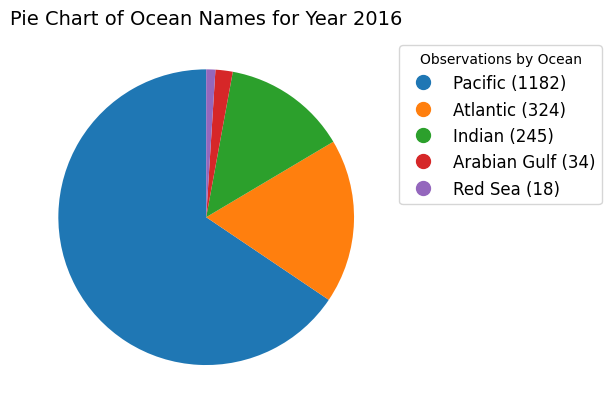

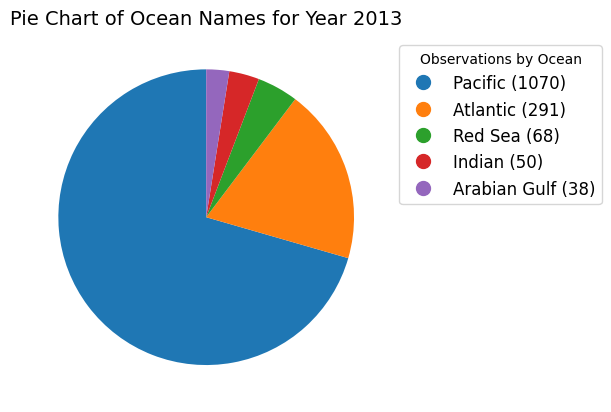

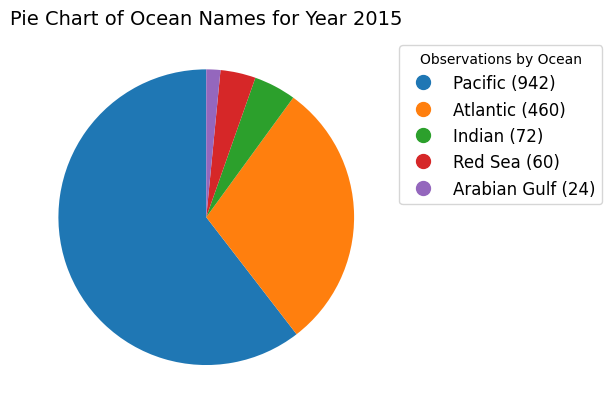

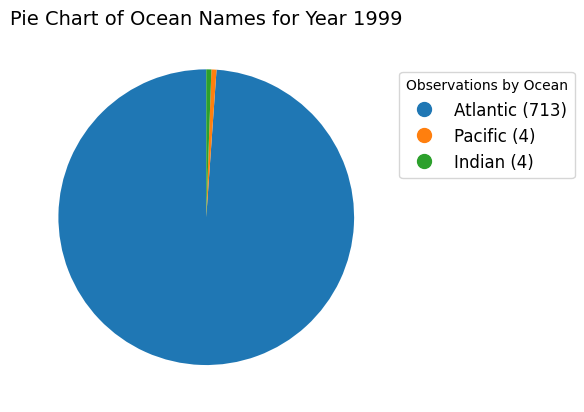

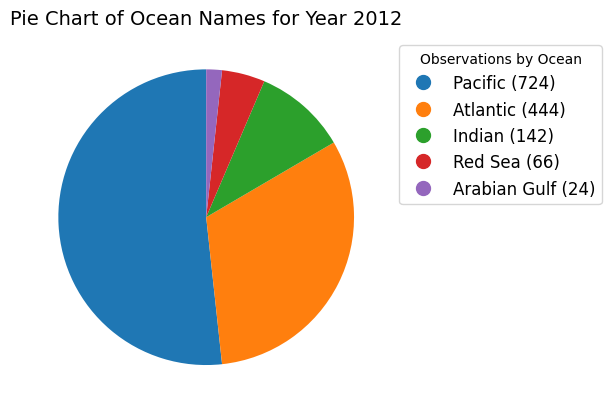

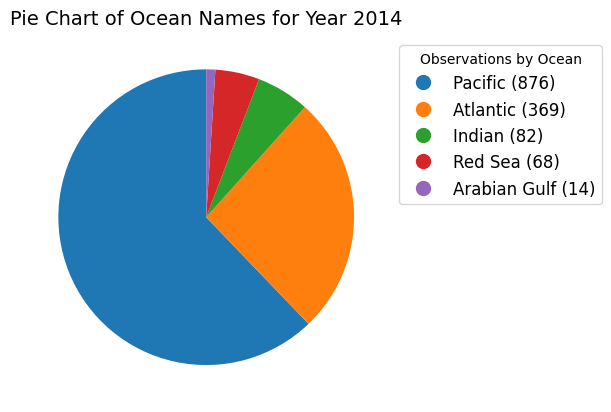

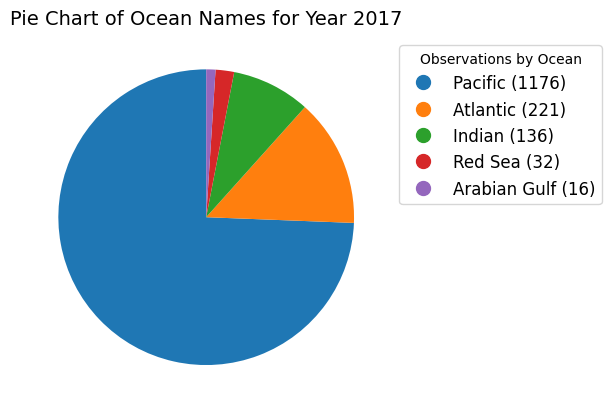

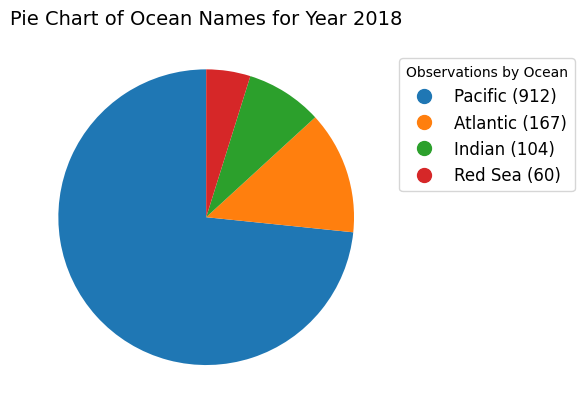

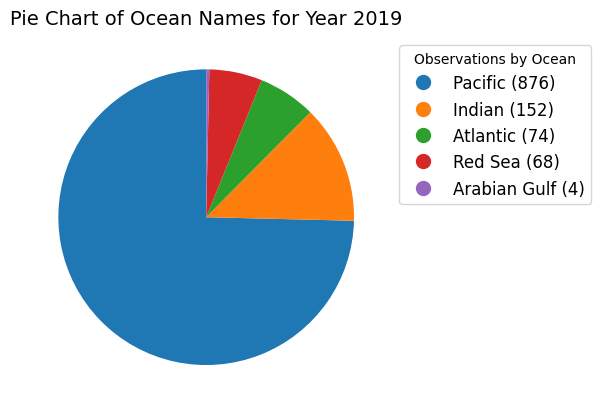

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

# Loop through unique years in the 'Date_Year' column of the 'data' DataFrame
for year in data['Date_Year'].unique():
    # Filter data for the current year
    year_data = data[data['Date_Year'] == year]
    ocean_counts = year_data['Ocean_Name'].value_counts()

    # Create a pie chart without displaying percentages and without labels
    pie = ocean_counts.plot.pie(autopct='', startangle=90, labels=None)

    # Set the title for the pie chart
    plt.title(f"Pie Chart of Ocean Names for Year {year}", fontsize=14)

    # Create a legend for color and percentage
    legend_labels = []
    for label, percent, text, wedge in zip(ocean_counts.index, ocean_counts.values, pie.texts, pie.patches):
        legend_labels.append(f"{label} ({percent})")
        plt.plot([], [], color=wedge.get_facecolor(), marker='o', markersize=10, label=f"{label} ({percent}%)", linewidth=0, markerfacecolor=wedge.get_facecolor())
    plt.legend(handles=plt.gca().lines, labels=legend_labels, title='Observations by Ocean', loc='center left', bbox_to_anchor=(1, 0.75), fontsize=12, handler_map={tuple: HandlerTuple(ndivide=None)})

    # Remove y-axis label
    plt.ylabel('')

    # Show the pie chart
    plt.show()

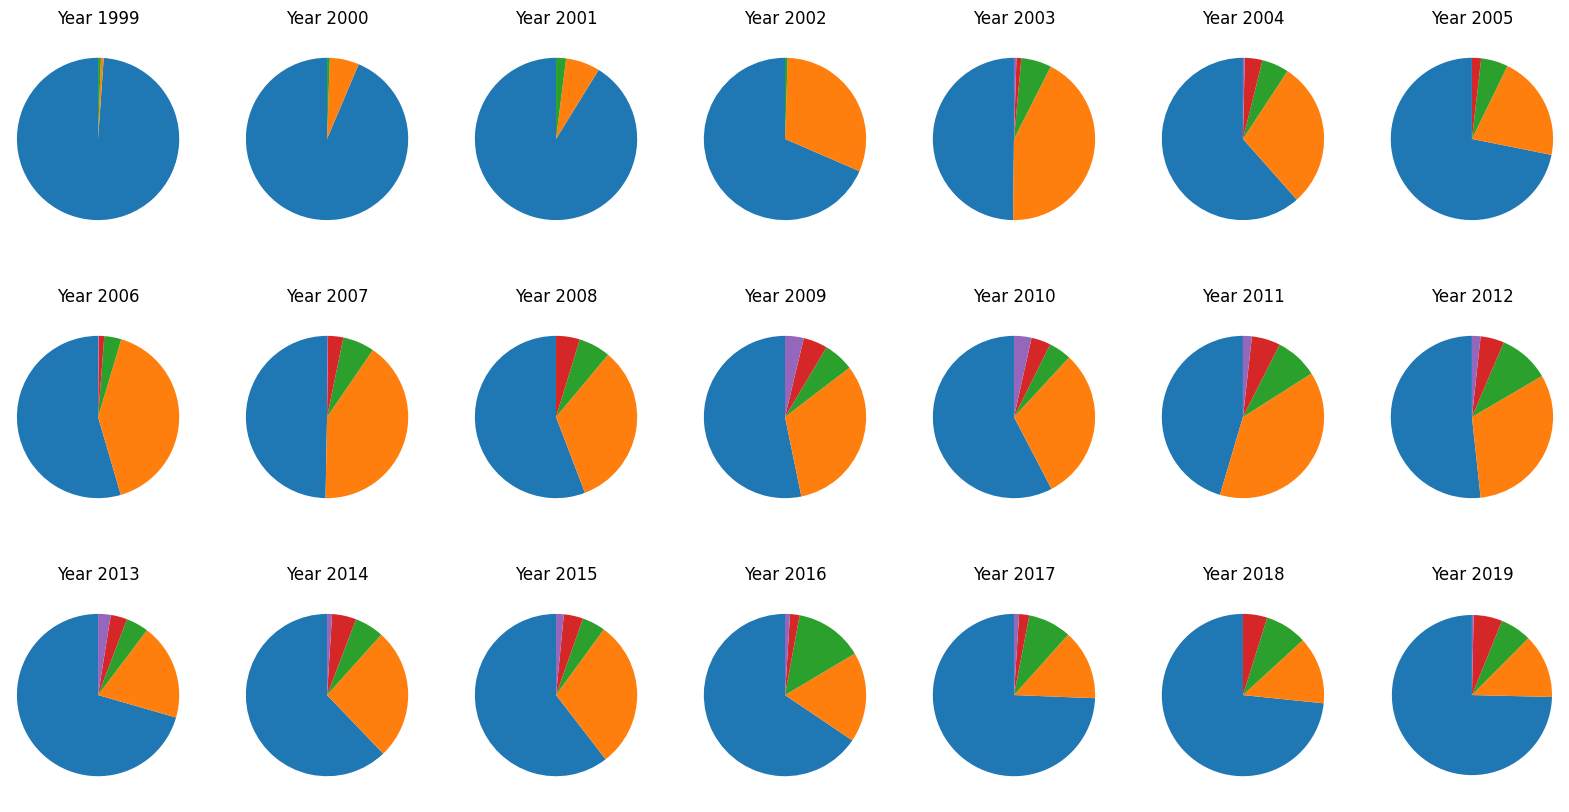

In [ ]:
######## COLORS NO CONSISTENT BY OCEAN 
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

# Get unique years in the 'Date_Year' column of the 'data' DataFrame and sort them in ascending order
years = sorted(data['Date_Year'].unique())

# Calculate the number of rows and columns needed based on the number of unique years
num_rows = len(years) // 7 + (len(years) % 7 > 0)  # Number of rows, rounded up
num_cols = min(len(years), 7)  # Number of columns, maximum 5

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10), squeeze=False)

# Flatten the axes array to simplify indexing
axes = axes.ravel()

# Loop through sorted unique years
for i, year in enumerate(years):
    # Filter data for the current year
    year_data = data[data['Date_Year'] == year]
    ocean_counts = year_data['Ocean_Name'].value_counts()

    # Create a pie chart in the current subplot
    pie = ocean_counts.plot.pie(autopct='', startangle=90, labels=None, ax=axes[i])
    axes[i].set_title(f"Year {year}", fontsize=12)

    # Create a legend for color without percentage
   # legend_labels = []
    #for label, wedge in zip(ocean_counts.index, pie.patches):
      #  legend_labels.append(f"{label}")
        #plt.plot([], [], color=wedge.get_facecolor(), marker='o', markersize=5, label=f"{label} ", linewidth=0, markerfacecolor=wedge.get_facecolor())
   # plt.legend(handles=plt.gca().lines, labels=legend_labels, title='Observations by Ocean', loc='center left', bbox_to_anchor=(0.90, 8.75), fontsize=8, handler_map={tuple: HandlerTuple(ndivide=None)})

    # Remove y-axis label
    axes[i].set_ylabel('')
    axes[i].axis('equal')  # Set aspect ratio to 'equal' for a circular pie chart

# Remove any empty subplots
for i in range(len(years), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Reduce spacing between subplots

# Show the plot
plt.show()

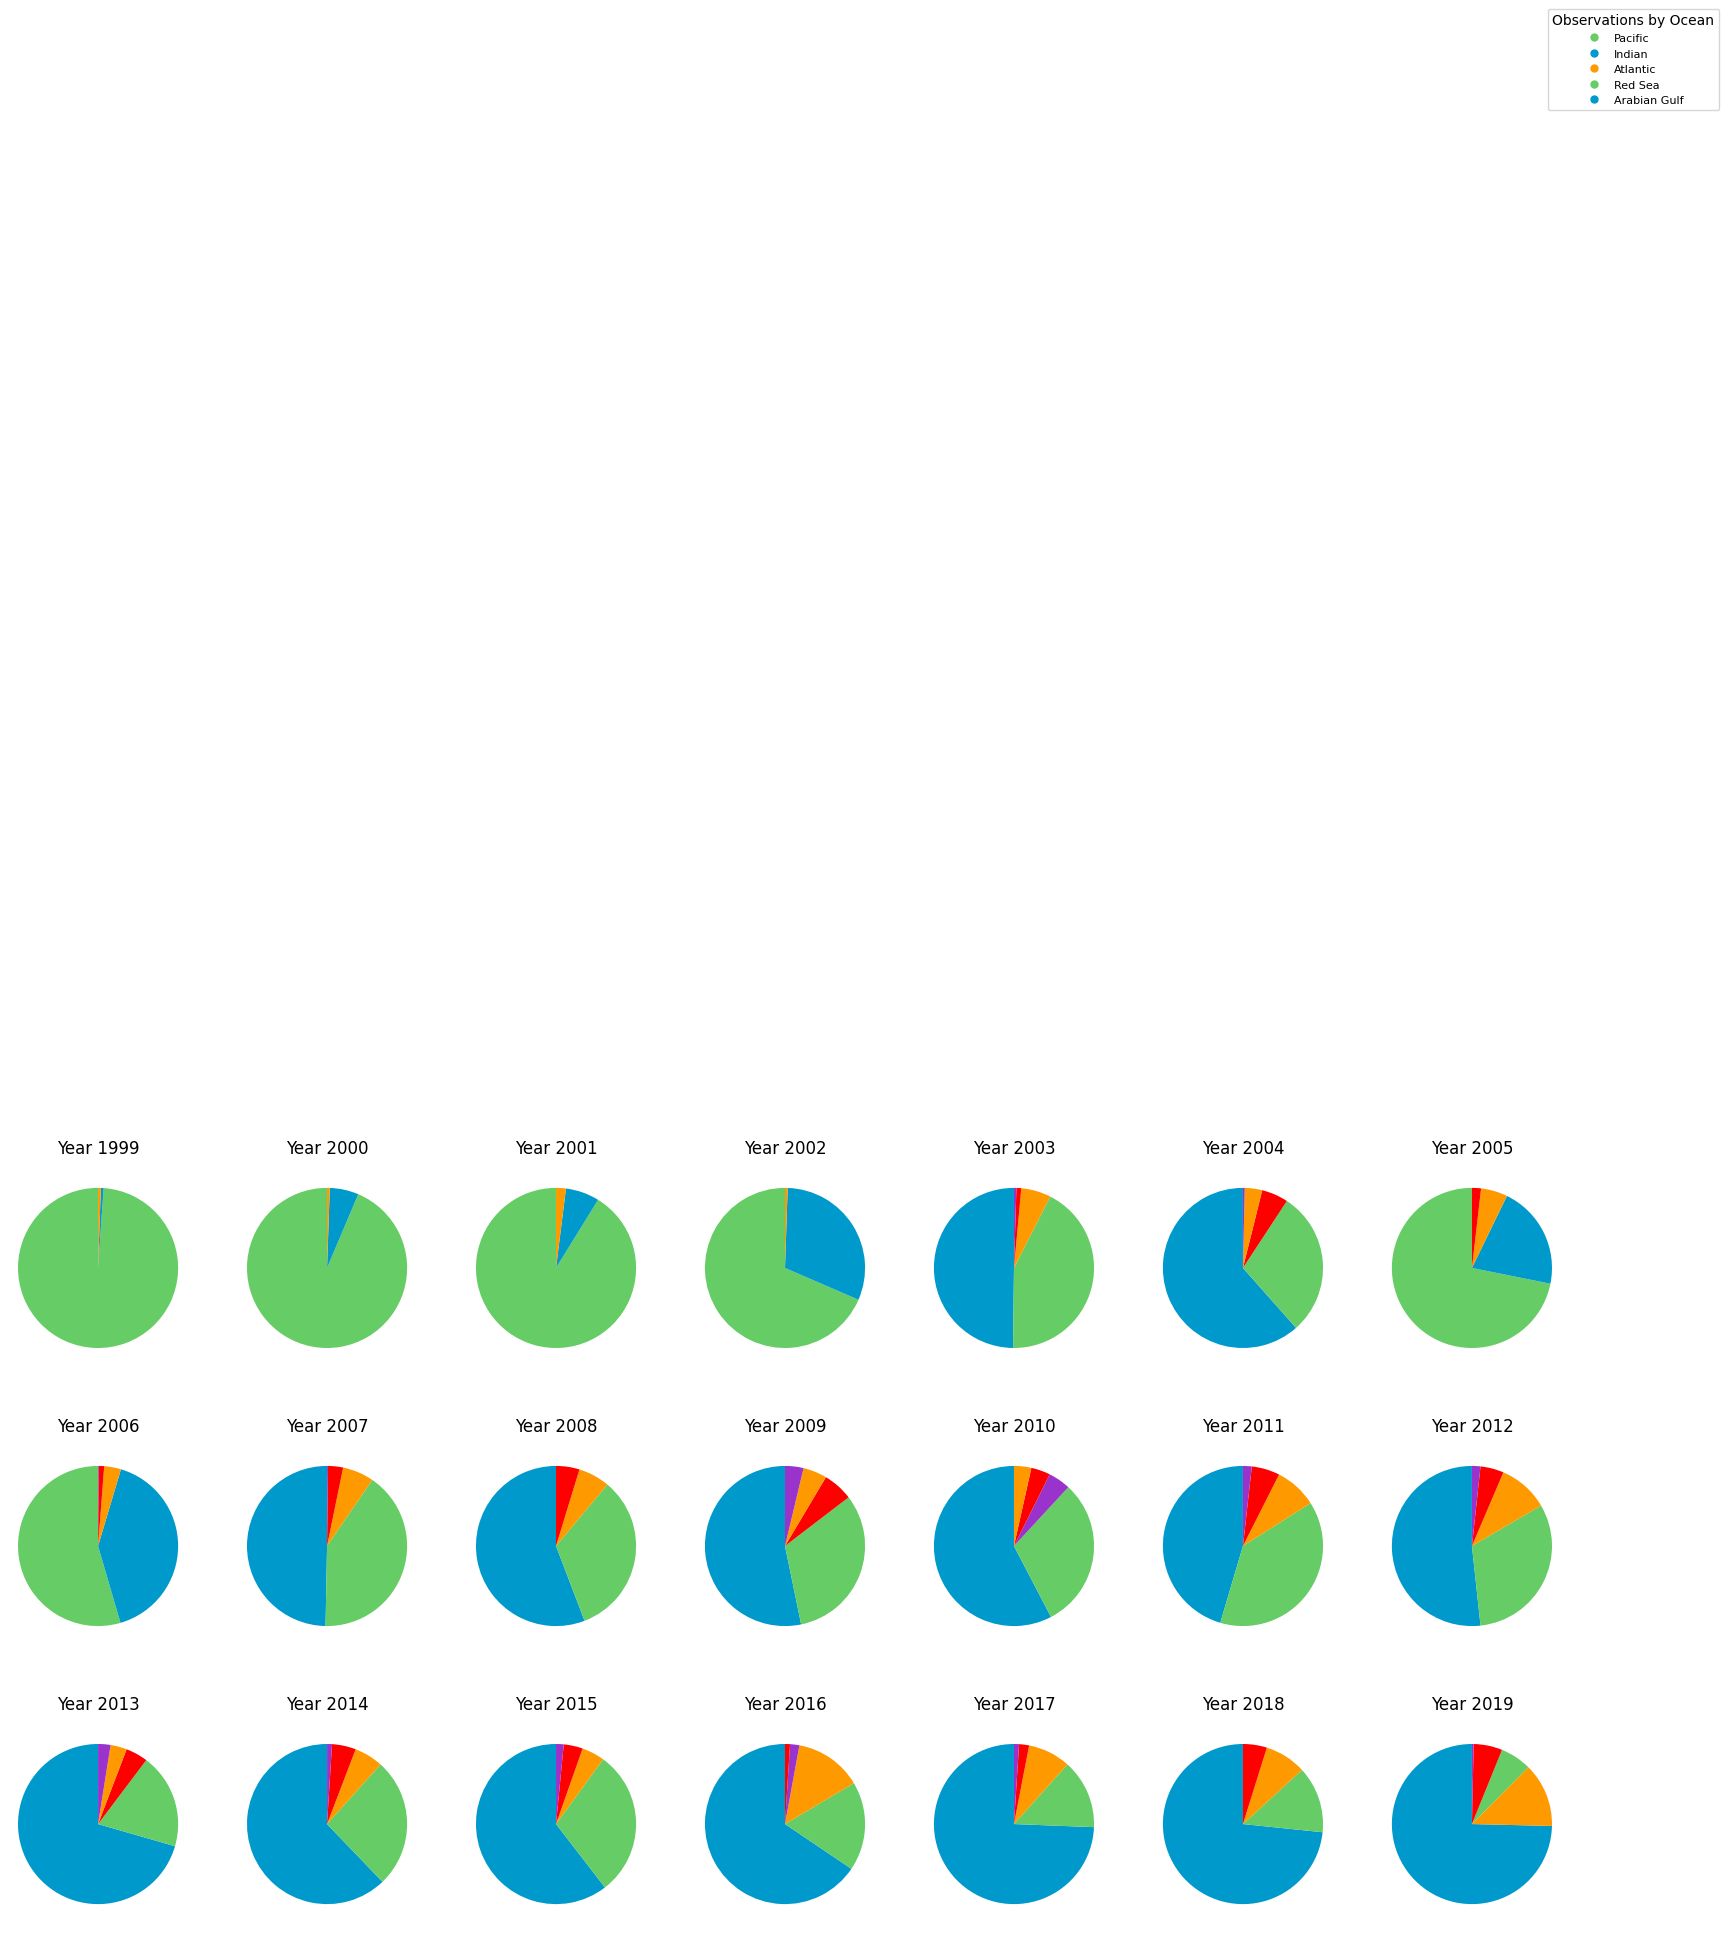

In [ ]:
# Define a dictionary that maps each ocean name to a specific color
ocean_colors = {
    'Pacific': '#0099cc', 
    'Atlantic': '#66cc66', 
    'Indian': '#ff9900',  
    'Red Sea': 'red',  
    'Arabian Gulf': '#9933cc',  
}

# Get unique years in the 'Date_Year' column of the 'data' DataFrame and sort them in ascending order
years = sorted(data['Date_Year'].unique())

# Calculate the number of rows and columns needed based on the number of unique years
num_rows = len(years) // 7 + (len(years) % 7 > 0)  # Number of rows, rounded up
num_cols = min(len(years), 7)  # Number of columns, maximum 5

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10), squeeze=False)

# Loop through sorted unique years
for i, year in enumerate(years):
    # Filter data for the current year
    year_data = data[data['Date_Year'] == year]
    ocean_counts = year_data['Ocean_Name'].value_counts()

    # Create a pie chart in the current subplot
    pie = axes[i // num_cols, i % num_cols].pie(ocean_counts, autopct='', startangle=90, labels=None, colors=[ocean_colors[ocean] for ocean in ocean_counts.index])
    axes[i // num_cols, i % num_cols].set_title(f"Year {year}", fontsize=12)

    # Create a legend for color without percentage
    legend_labels = []
    for label, wedge in zip(ocean_counts.index, pie[0]):
        legend_labels.append(f"{label}")
        plt.plot([], [], color=wedge.get_facecolor(), marker='o', markersize=5, label=f"{label} ", linewidth=0, markerfacecolor=wedge.get_facecolor())
    plt.legend(handles=plt.gca().lines, labels=legend_labels, title='Observations by Ocean', loc='center left', bbox_to_anchor=(0.90, 8.75), fontsize=8, handler_map={tuple: HandlerTuple(ndivide=None)})

    # Remove y-axis label
    axes[i // num_cols, i % num_cols].set_ylabel('')
    axes[i // num_cols, i % num_cols].axis('equal')  # Set aspect ratio to 'equal' for a circular pie chart

# Remove any empty subplots
for i in range(len(years), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Reduce spacing between subplots

# Show the plot
plt.show()

Exposure 

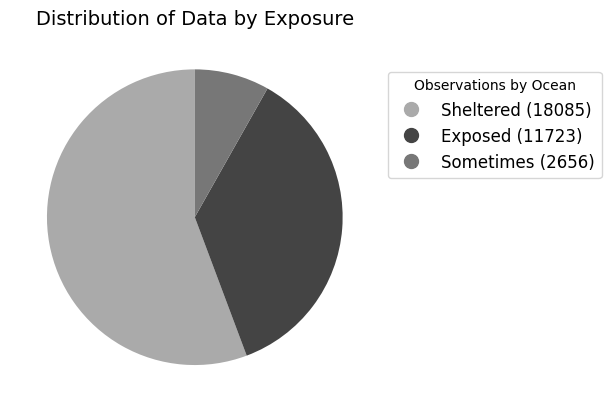

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

ocean_counts = data['Exposure'].value_counts()

# Define the colors for each ocean
ocean_colors = {
    'Exposed': '#444444', 
    'Sometimes': '#777777', 
    'Sheltered': '#AAAAAA',    
}

# Create a pie chart using the defined colors and without displaying percentages and without labels
pie, _ = plt.pie(ocean_counts.values, startangle=90, colors=[ocean_colors[ocean] for ocean in ocean_counts.index])

# Set the title for the pie chart
plt.title("Distribution of Data by Exposure", fontsize=14)

# Create a legend for color and percentage
legend_labels = []
for label, percent, wedge in zip(ocean_counts.index, ocean_counts.values, pie):
    legend_labels.append(f"{label} ({percent})")
    plt.plot([], [], color=ocean_colors[label], marker='o', markersize=10, label=f"{label} ({percent}%)", linewidth=0, markerfacecolor=ocean_colors[label])
plt.legend(handles=plt.gca().lines, labels=legend_labels, title='Observations by Ocean', loc='center left', bbox_to_anchor=(1, 0.75), fontsize=12, handler_map={tuple: HandlerTuple(ndivide=None)})

# Remove y-axis label
plt.ylabel('')

# Show the pie chart
plt.show()

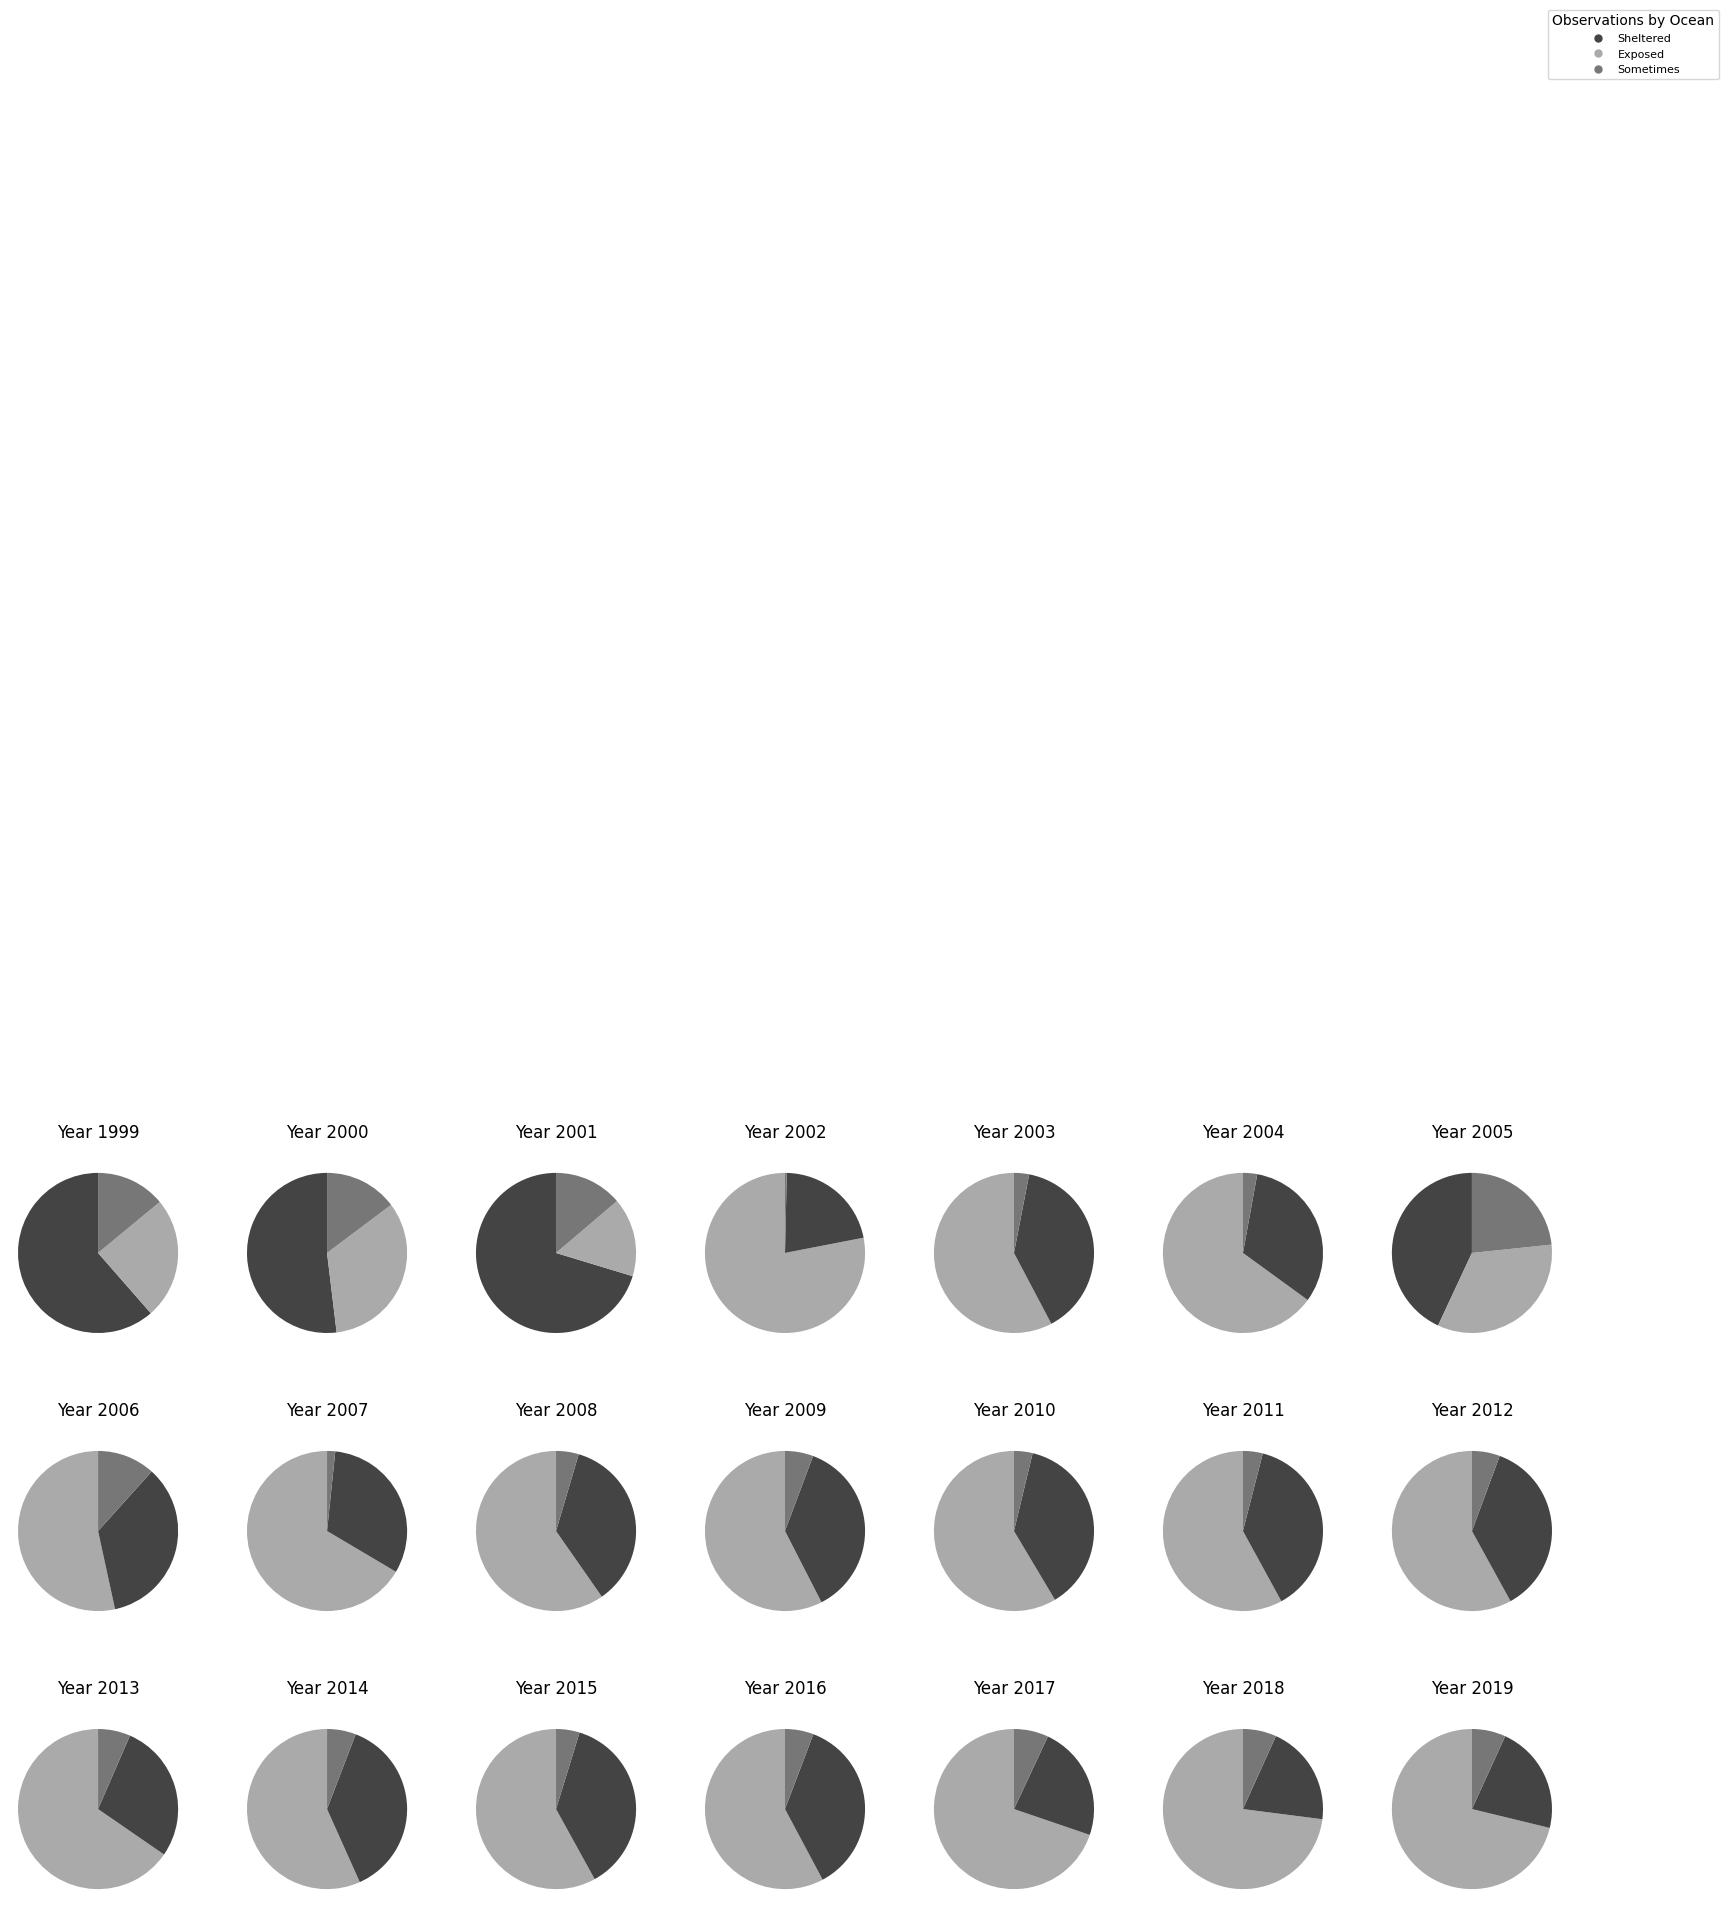

In [ ]:
# Define a dictionary that maps each ocean name to a specific color
ocean_colors = {
    'Exposed': '#444444', 
    'Sometimes': '#777777', 
    'Sheltered': '#AAAAAA',    
}


# Get unique years in the 'Date_Year' column of the 'data' DataFrame and sort them in ascending order
years = sorted(data['Date_Year'].unique())

# Calculate the number of rows and columns needed based on the number of unique years
num_rows = len(years) // 7 + (len(years) % 7 > 0)  # Number of rows, rounded up
num_cols = min(len(years), 7)  # Number of columns, maximum 5

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10), squeeze=False)

# Loop through sorted unique years
for i, year in enumerate(years):
    # Filter data for the current year
    year_data = data[data['Date_Year'] == year]
    ocean_counts = year_data['Exposure'].value_counts()

    # Create a pie chart in the current subplot
    pie = axes[i // num_cols, i % num_cols].pie(ocean_counts, autopct='', startangle=90, labels=None, colors=[ocean_colors[ocean] for ocean in ocean_counts.index])
    axes[i // num_cols, i % num_cols].set_title(f"Year {year}", fontsize=12)

    # Create a legend for color without percentage
    legend_labels = []
    for label, wedge in zip(ocean_counts.index, pie[0]):
        legend_labels.append(f"{label}")
        plt.plot([], [], color=wedge.get_facecolor(), marker='o', markersize=5, label=f"{label} ", linewidth=0, markerfacecolor=wedge.get_facecolor())
    plt.legend(handles=plt.gca().lines, labels=legend_labels, title='Observations by Ocean', loc='center left', bbox_to_anchor=(0.90, 8.75), fontsize=8, handler_map={tuple: HandlerTuple(ndivide=None)})

    # Remove y-axis label
    axes[i // num_cols, i % num_cols].set_ylabel('')
    axes[i // num_cols, i % num_cols].axis('equal')  # Set aspect ratio to 'equal' for a circular pie chart

# Remove any empty subplots
for i in range(len(years), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Reduce spacing between subplots

# Show the plot
plt.show()

###Oceans averages over the years

In [ ]:
ocean_names = new_cb['Ocean_Name'].unique()  # Get unique ocean names

# Create a dictionary to store the DataFrames
ocean_dfs = {}

# Loop through each ocean name and create a DataFrame for each
for ocean_name in ocean_names:
    ocean_dfs[ocean_name] = new_cb[new_cb['Ocean_Name'] == ocean_name]

# Access each DataFrame using the ocean name as the key
# For example, to access the DataFrame for 'Pacific Ocean':
pacific = ocean_dfs[1]
atlantic = ocean_dfs[0]
indian = ocean_dfs[2]
redsea = ocean_dfs[4]
arabiangulf = ocean_dfs[3]

In [ ]:
pacific.columns

Index(['Ocean_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity',
       'Cyclone_Frequency', 'Date_Month', 'Date_Year', 'Depth_m',
       'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin', 'Windspeed',
       'SSTA_DHW'],
      dtype='object')

####Pacific Ocean 

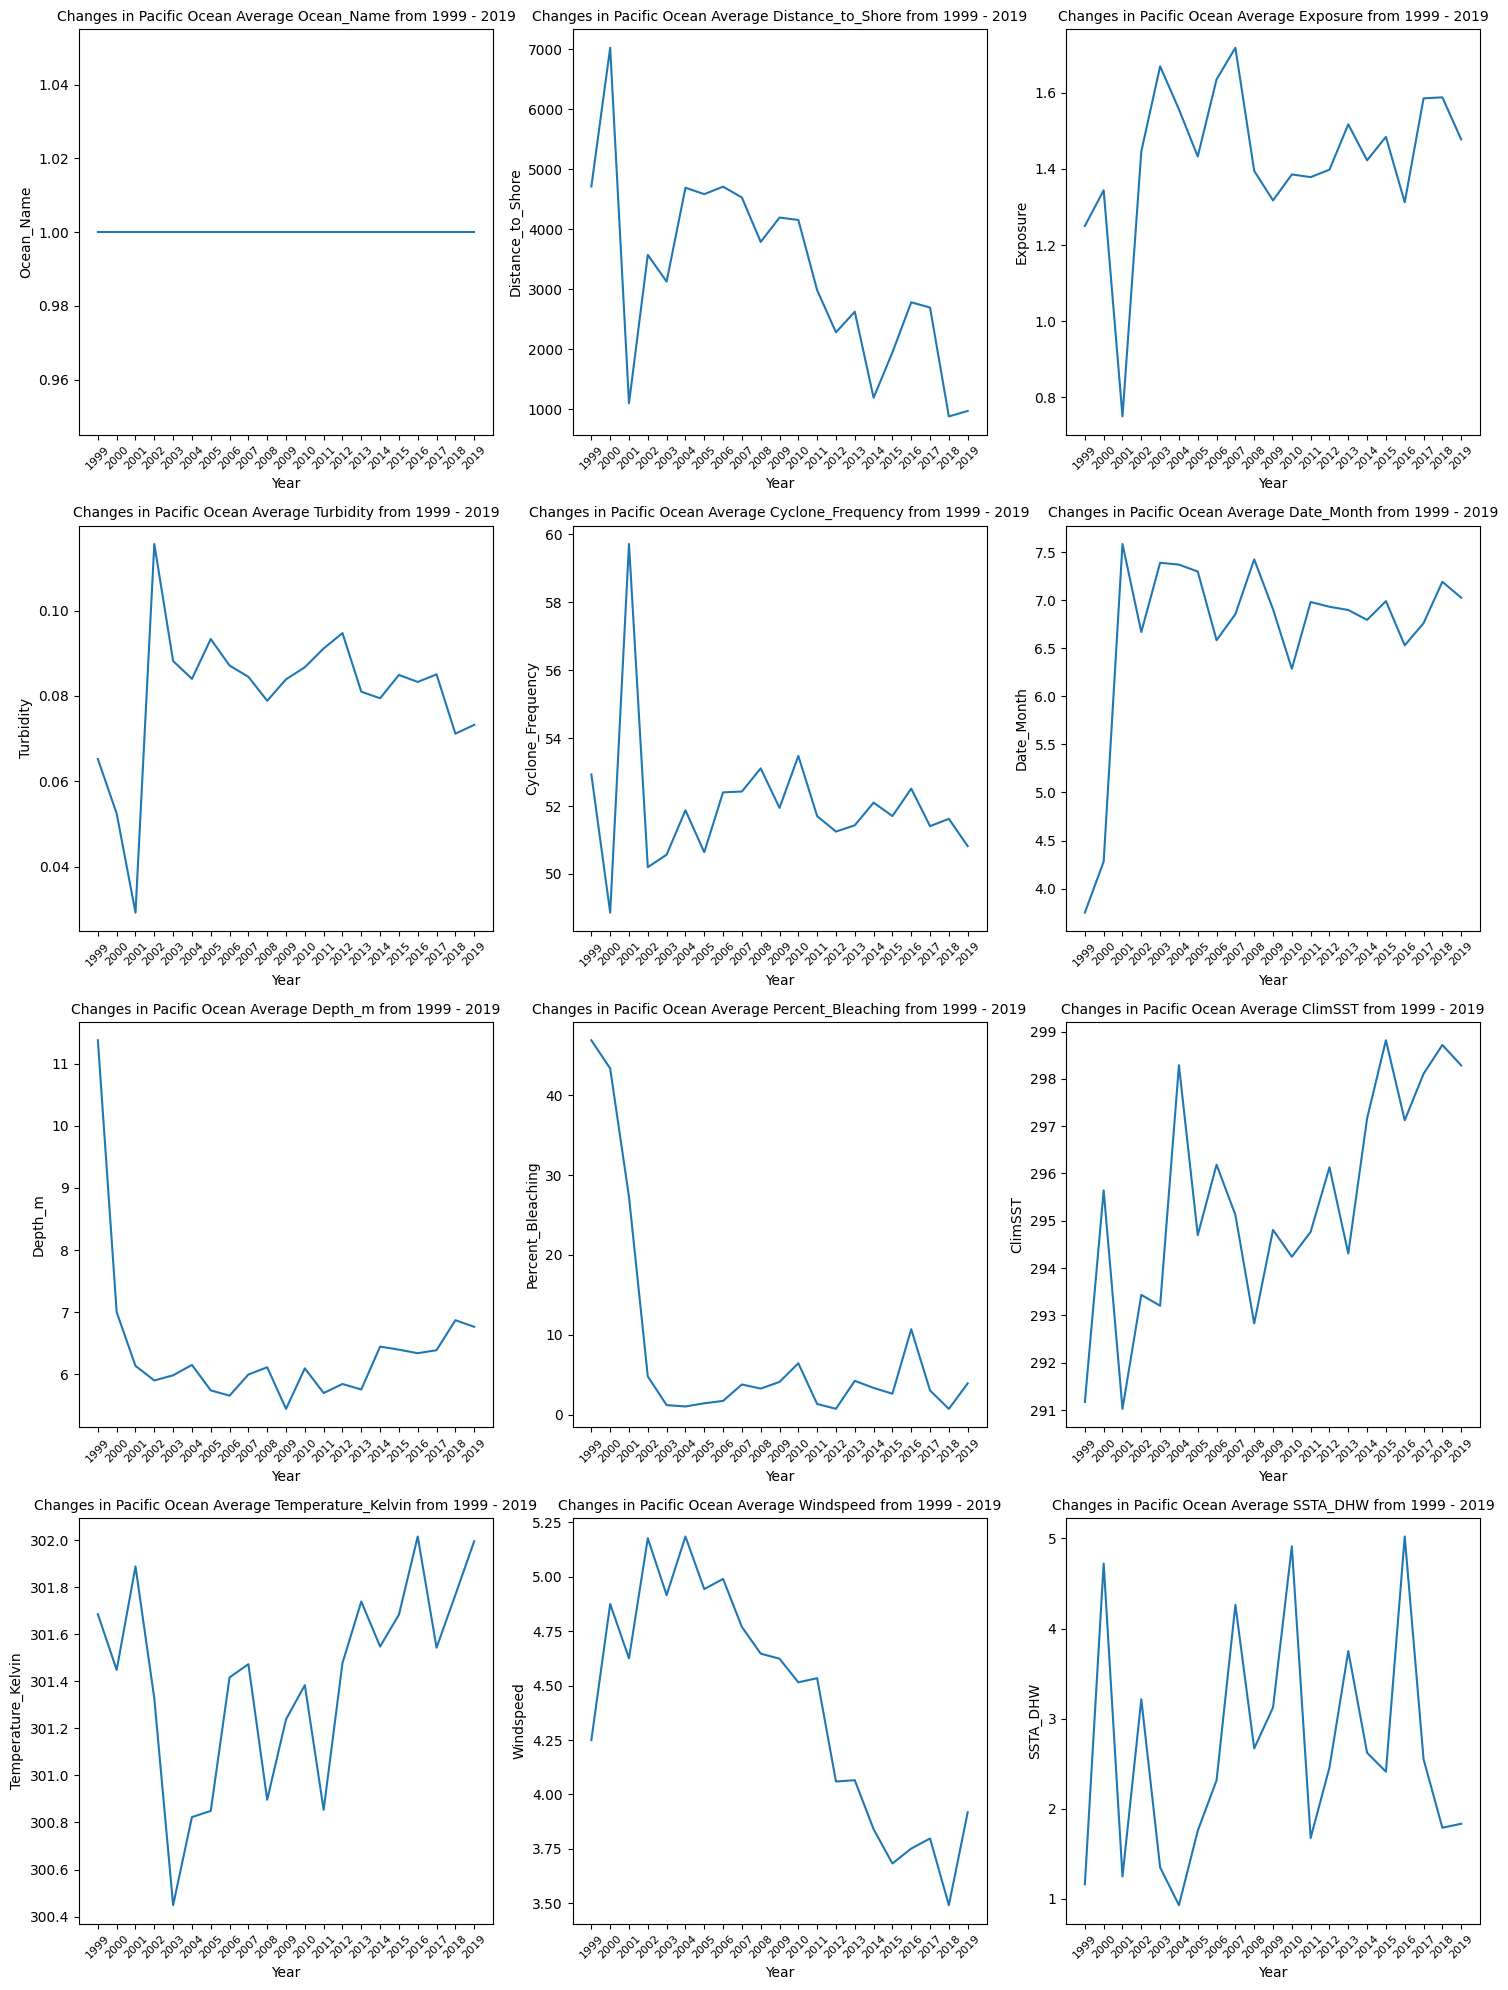

In [ ]:

average_by_year = pacific.groupby('Date_Year').mean()
variables_to_plot = average_by_year.columns.tolist()

# Calculate the number of rows and columns for subplots
num_variables = len(variables_to_plot)
num_cols = 3
num_rows = (num_variables + num_cols - 1) // num_cols

# Create a figure and subplots with specified figsize
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize as desired

# Flatten the axs array to a 1D array
axs = axs.flatten()

# Loop through each variable and create a plot
for i, variable in enumerate(variables_to_plot):
    # Plot the variable against the years in the current subplot
    axs[i].plot(average_by_year.index, average_by_year[variable])
    
    # Set plot title and axis labels
    axs[i].set_title("Changes in Pacific Ocean Average " f"{variable} from 1999 - 2019",fontsize=10)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel(variable)
    
     # Adjust x-axis ticks and tick labels
    axs[i].set_xticks(average_by_year.index)  # Set x-axis ticks to match the years
    axs[i].set_xticklabels(average_by_year.index, rotation=45)  # Set x-axis tick labels with rotation
    axs[i].tick_params(axis='x', labelsize=8)  # Set x-axis tick label size

# Remove any unused subplots
for i in range(len(variables_to_plot), num_rows*num_cols):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

####Atlantic Ocean 

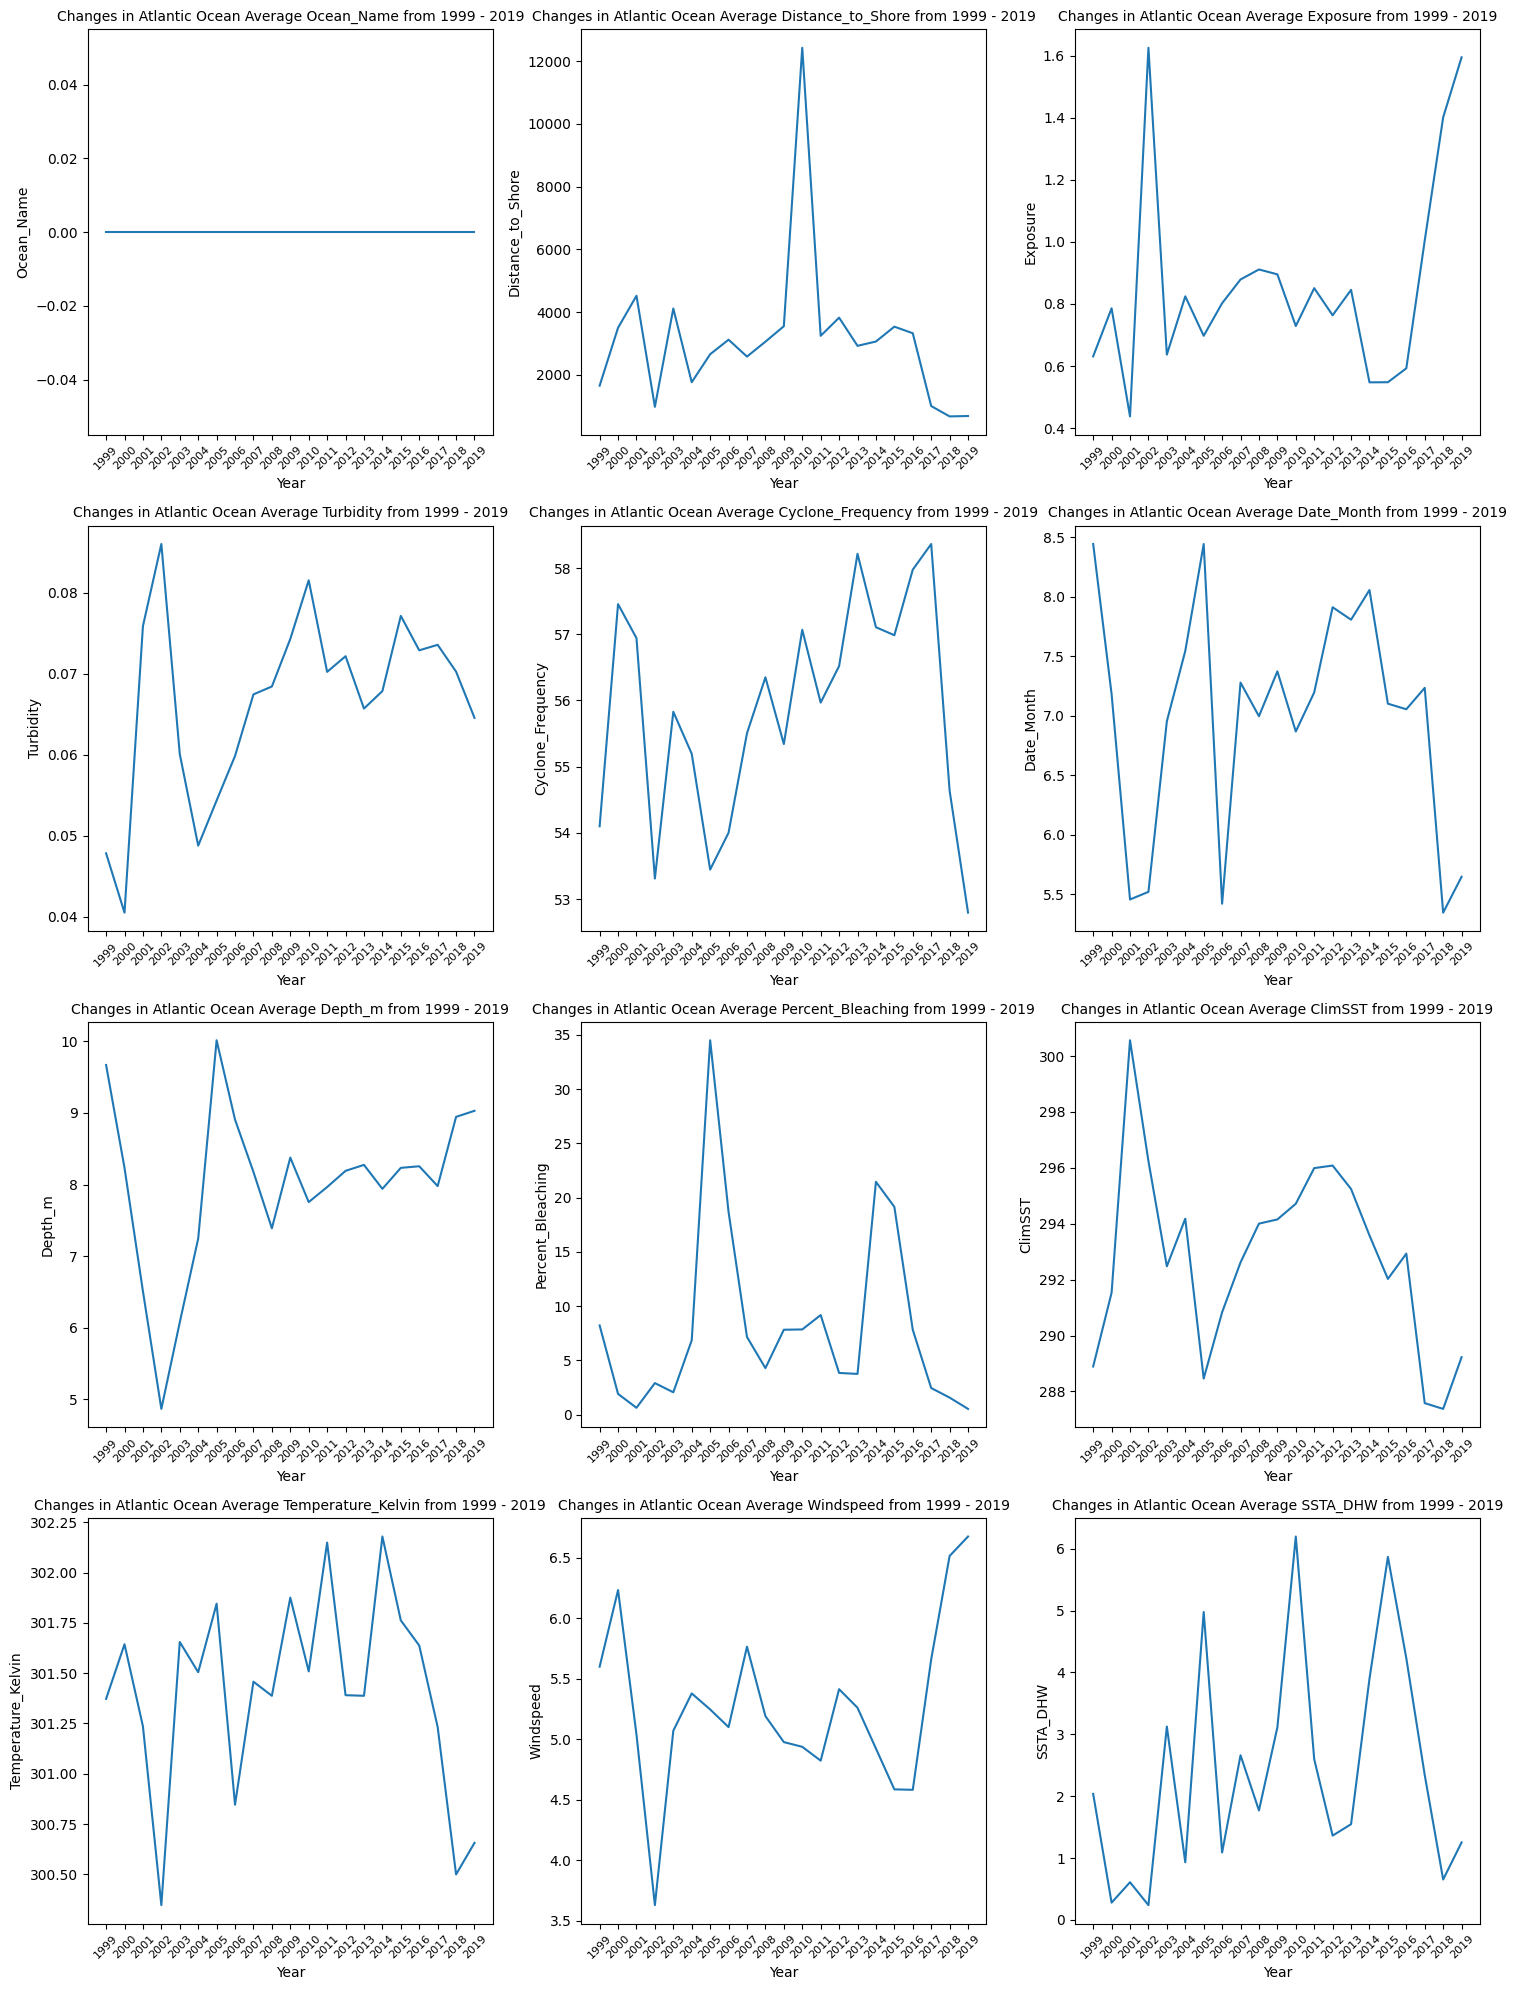

In [ ]:
average_by_year = atlantic.groupby('Date_Year').mean()
variables_to_plot = average_by_year.columns.tolist()

# Calculate the number of rows and columns for subplots
num_variables = len(variables_to_plot)
num_cols = 3
num_rows = (num_variables + num_cols - 1) // num_cols

# Create a figure and subplots with specified figsize
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize as desired

# Flatten the axs array to a 1D array
axs = axs.flatten()

# Loop through each variable and create a plot
for i, variable in enumerate(variables_to_plot):
    # Plot the variable against the years in the current subplot
    axs[i].plot(average_by_year.index, average_by_year[variable])
    
    # Set plot title and axis labels
    axs[i].set_title("Changes in Atlantic Ocean Average " f"{variable} from 1999 - 2019",fontsize=10)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel(variable)
    
     # Adjust x-axis ticks and tick labels
    axs[i].set_xticks(average_by_year.index)  # Set x-axis ticks to match the years
    axs[i].set_xticklabels(average_by_year.index, rotation=45)  # Set x-axis tick labels with rotation
    axs[i].tick_params(axis='x', labelsize=8)  # Set x-axis tick label size

# Remove any unused subplots
for i in range(len(variables_to_plot), num_rows*num_cols):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

####Indian Ocean 

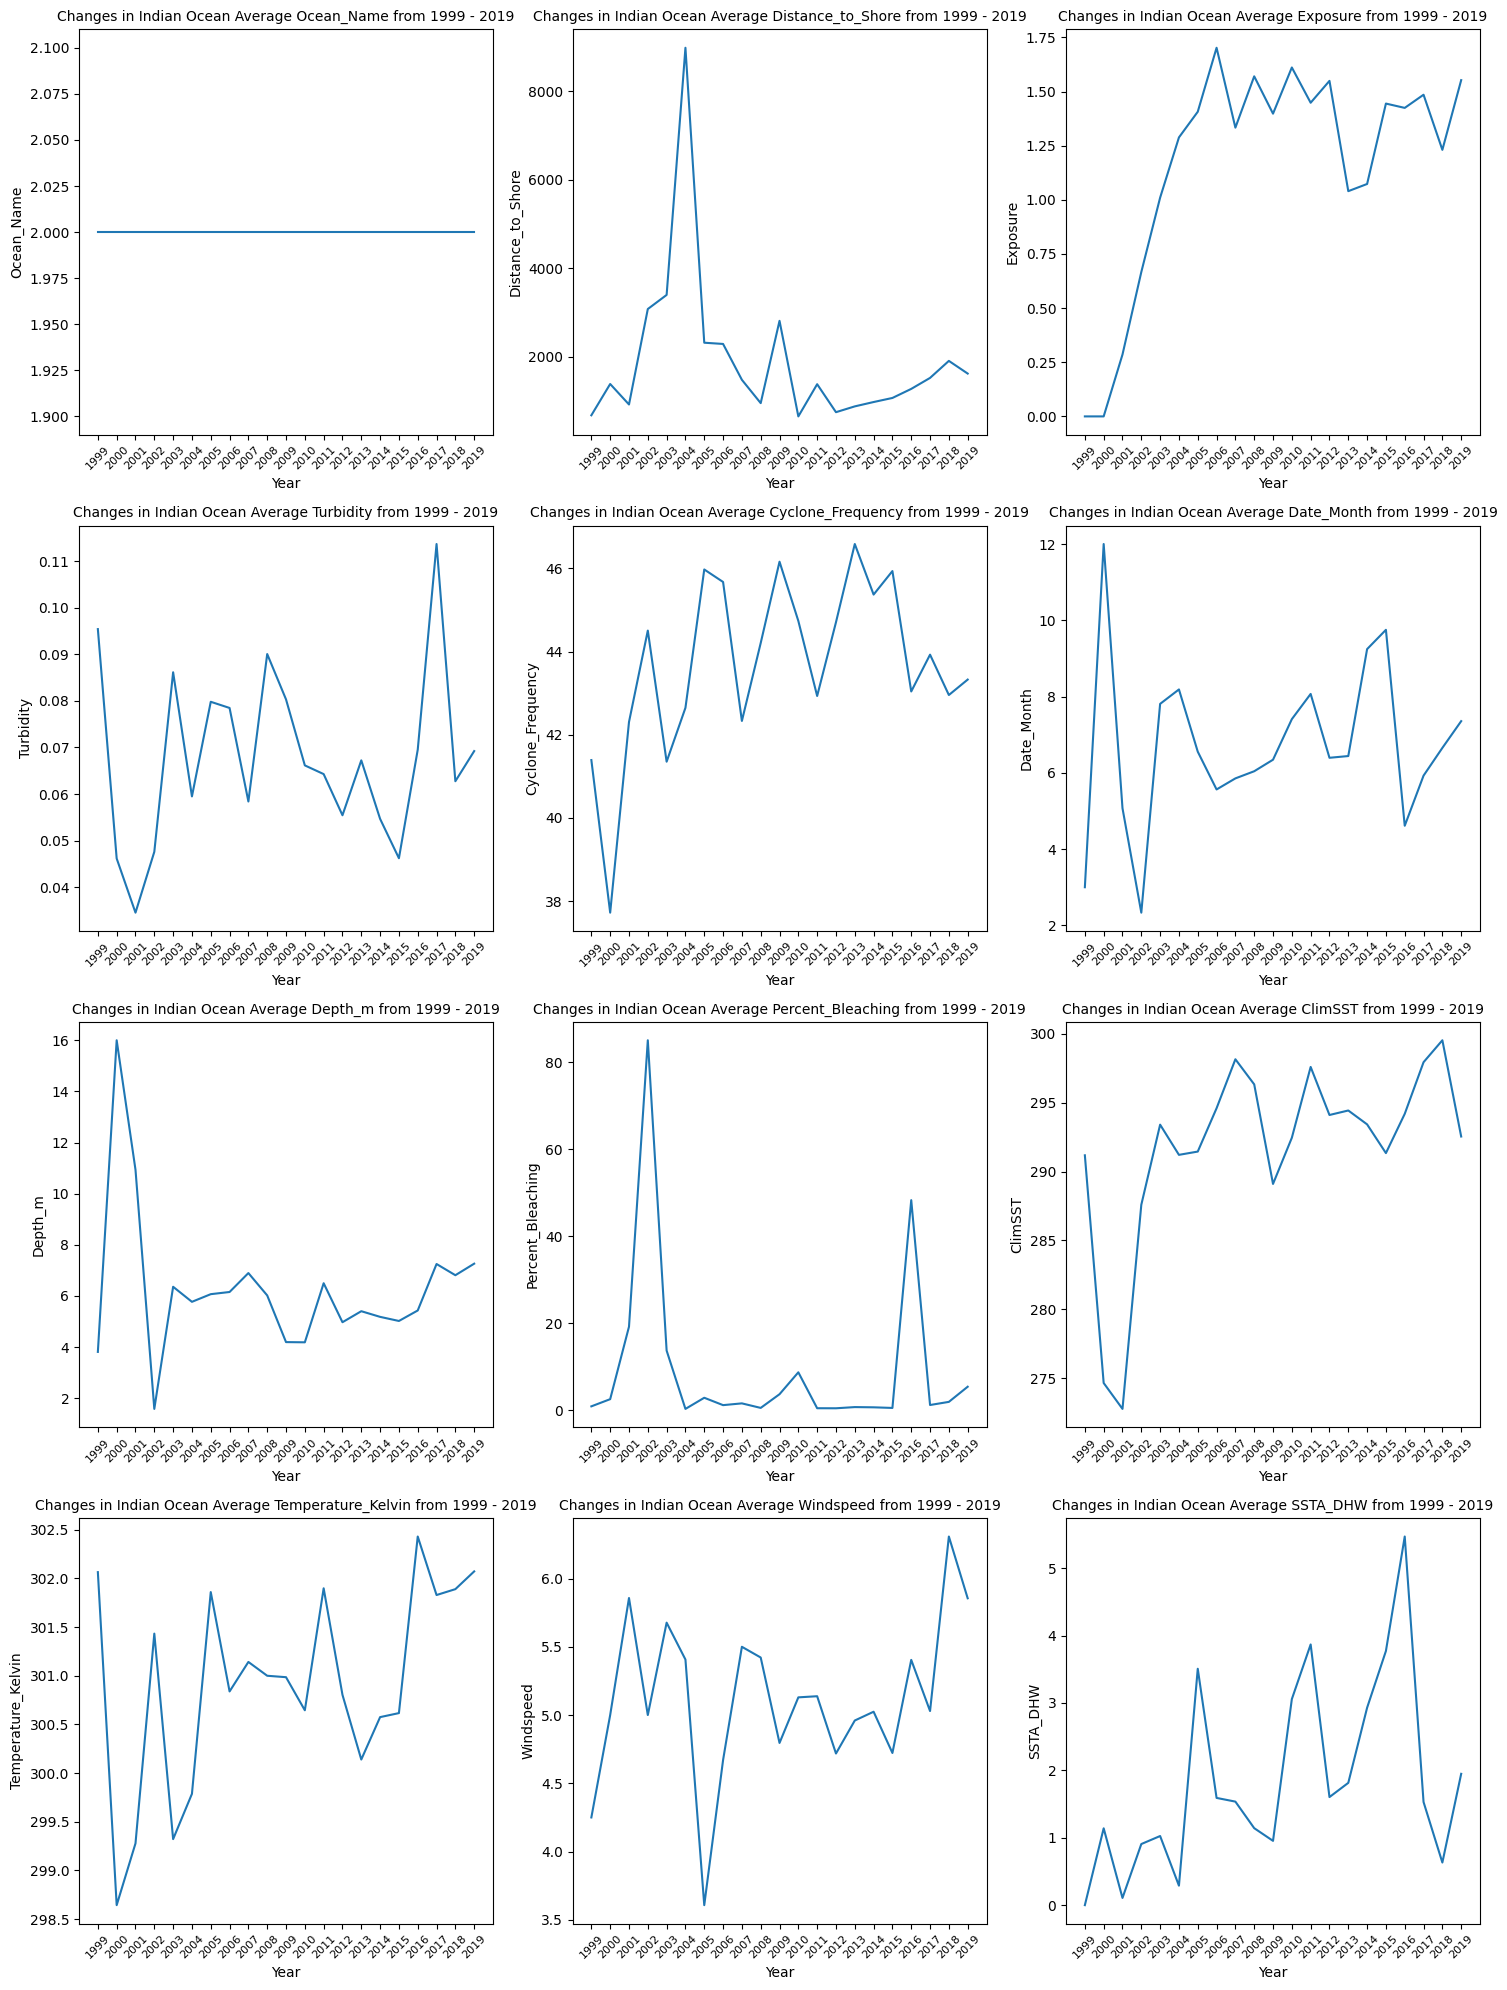

In [ ]:

average_by_year = indian.groupby('Date_Year').mean()
variables_to_plot = average_by_year.columns.tolist()

# Calculate the number of rows and columns for subplots
num_variables = len(variables_to_plot)
num_cols = 3
num_rows = (num_variables + num_cols - 1) // num_cols

# Create a figure and subplots with specified figsize
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize as desired

# Flatten the axs array to a 1D array
axs = axs.flatten()

# Loop through each variable and create a plot
for i, variable in enumerate(variables_to_plot):
    # Plot the variable against the years in the current subplot
    axs[i].plot(average_by_year.index, average_by_year[variable])
    
    # Set plot title and axis labels
    axs[i].set_title("Changes in Indian Ocean Average " f"{variable} from 1999 - 2019",fontsize=10)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel(variable)
    
     # Adjust x-axis ticks and tick labels
    axs[i].set_xticks(average_by_year.index)  # Set x-axis ticks to match the years
    axs[i].set_xticklabels(average_by_year.index, rotation=45)  # Set x-axis tick labels with rotation
    axs[i].tick_params(axis='x', labelsize=8)  # Set x-axis tick label size

# Remove any unused subplots
for i in range(len(variables_to_plot), num_rows*num_cols):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

####RedSea Ocean 

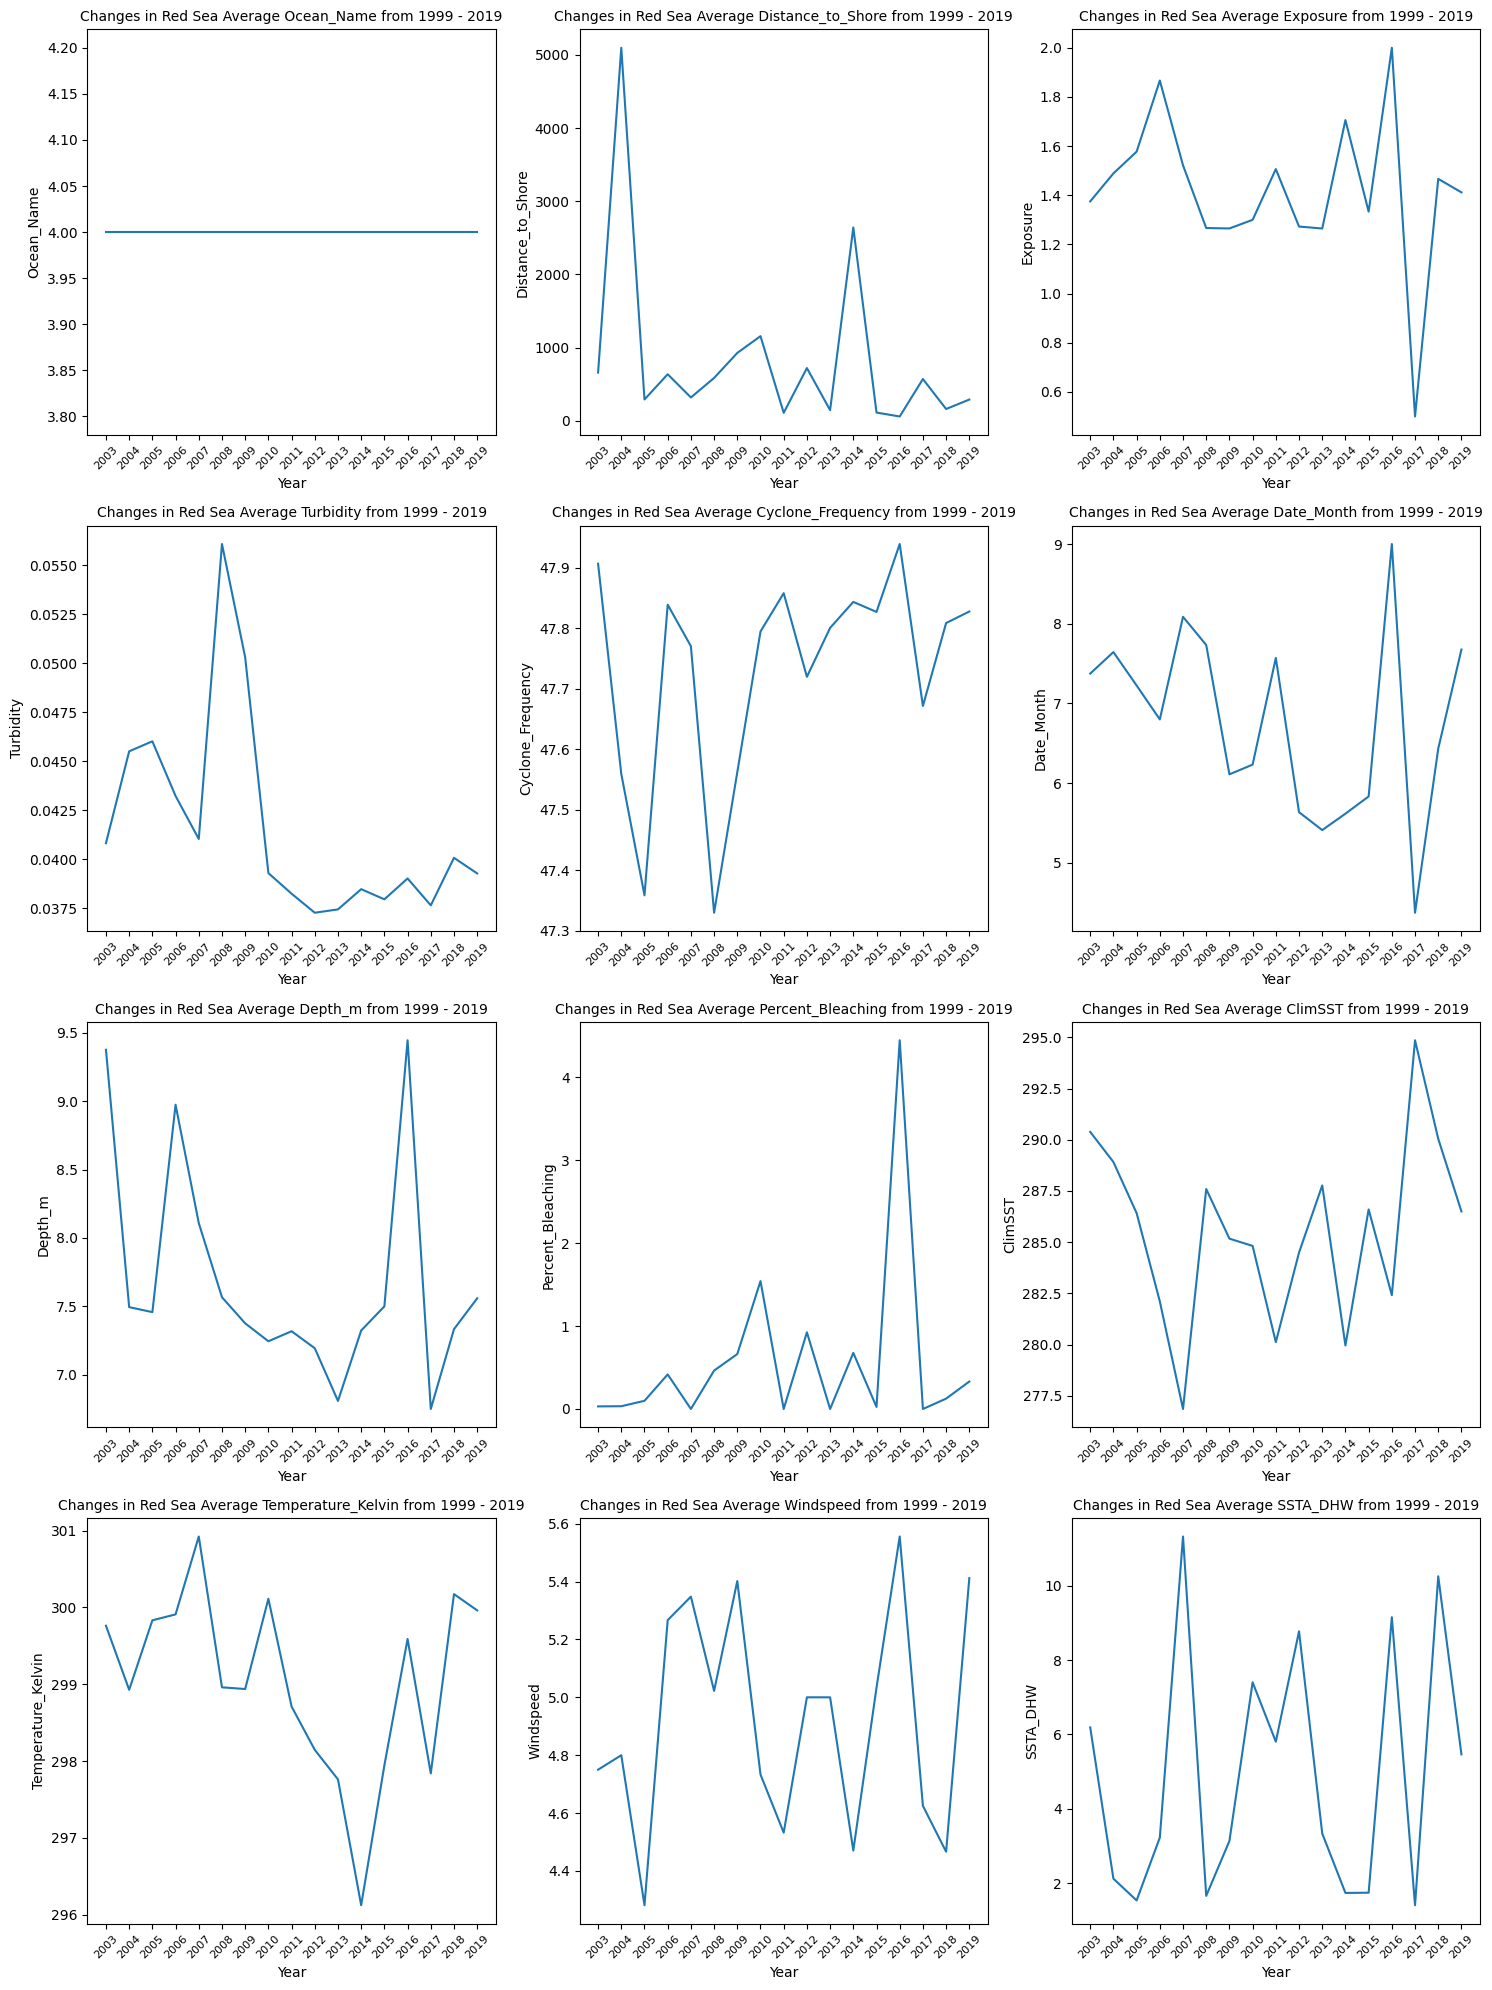

In [ ]:

average_by_year = redsea.groupby('Date_Year').mean()
variables_to_plot = average_by_year.columns.tolist()

# Calculate the number of rows and columns for subplots
num_variables = len(variables_to_plot)
num_cols = 3
num_rows = (num_variables + num_cols - 1) // num_cols

# Create a figure and subplots with specified figsize
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize as desired

# Flatten the axs array to a 1D array
axs = axs.flatten()

# Loop through each variable and create a plot
for i, variable in enumerate(variables_to_plot):
    # Plot the variable against the years in the current subplot
    axs[i].plot(average_by_year.index, average_by_year[variable])
    
    # Set plot title and axis labels
    axs[i].set_title("Changes in Red Sea Average " f"{variable} from 1999 - 2019",fontsize=10)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel(variable)
    
     # Adjust x-axis ticks and tick labels
    axs[i].set_xticks(average_by_year.index)  # Set x-axis ticks to match the years
    axs[i].set_xticklabels(average_by_year.index, rotation=45)  # Set x-axis tick labels with rotation
    axs[i].tick_params(axis='x', labelsize=8)  # Set x-axis tick label size

# Remove any unused subplots
for i in range(len(variables_to_plot), num_rows*num_cols):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

####Arabian Gulf 

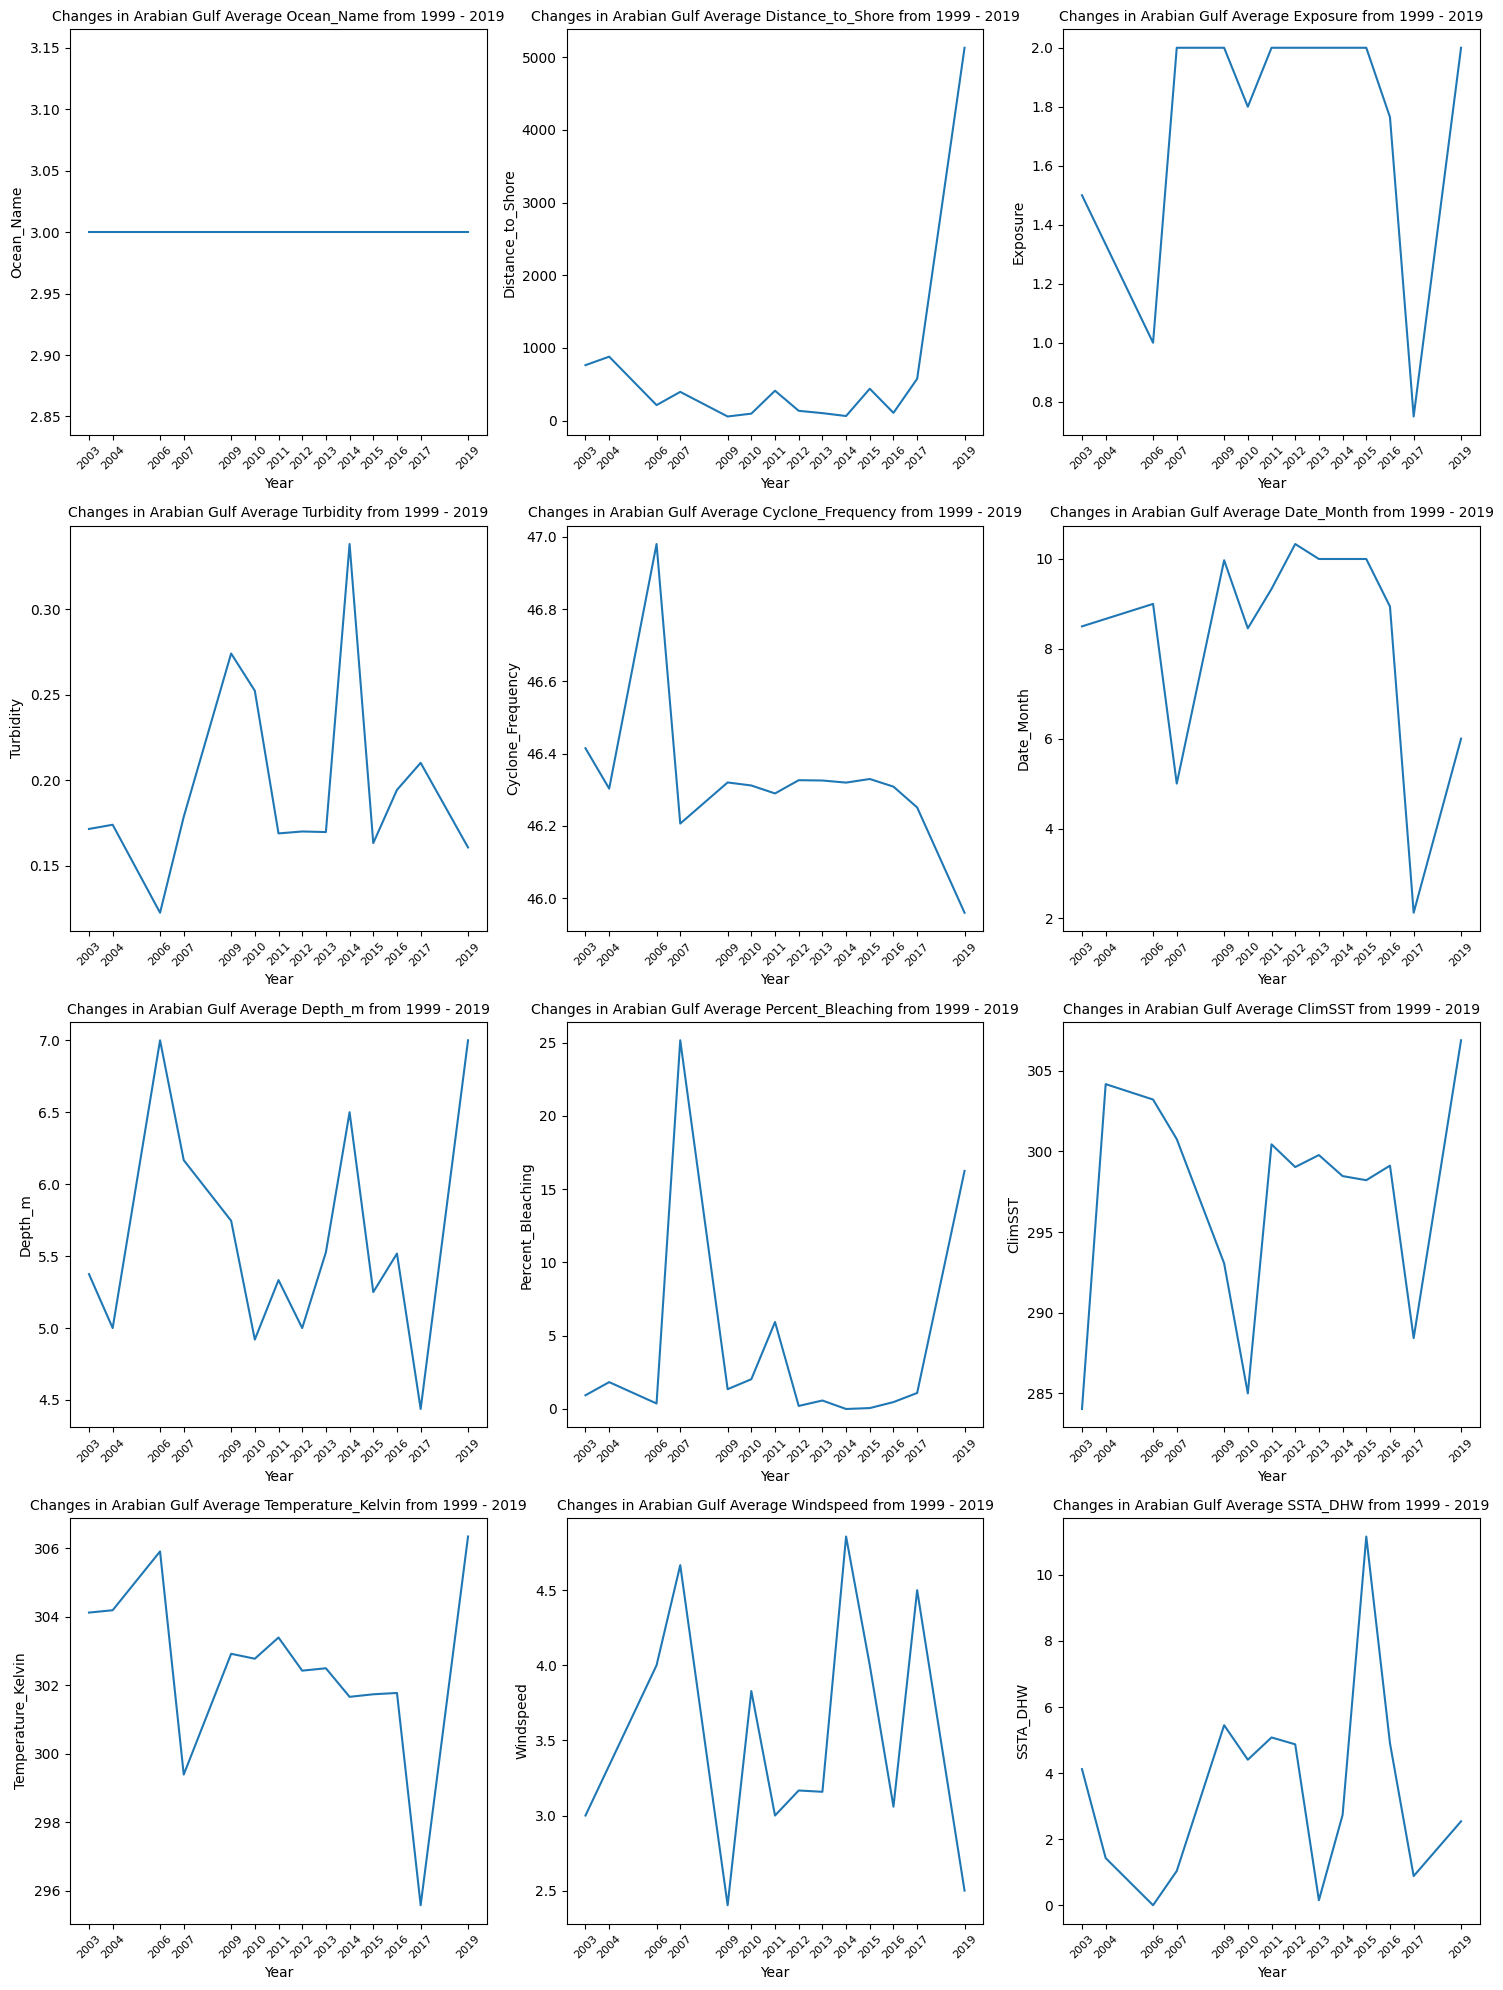

In [ ]:

average_by_year = arabiangulf.groupby('Date_Year').mean()
variables_to_plot = average_by_year.columns.tolist()

# Calculate the number of rows and columns for subplots
num_variables = len(variables_to_plot)
num_cols = 3
num_rows = (num_variables + num_cols - 1) // num_cols

# Create a figure and subplots with specified figsize
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize as desired

# Flatten the axs array to a 1D array
axs = axs.flatten()

# Loop through each variable and create a plot
for i, variable in enumerate(variables_to_plot):
    # Plot the variable against the years in the current subplot
    axs[i].plot(average_by_year.index, average_by_year[variable])
    
    # Set plot title and axis labels
    axs[i].set_title("Changes in Arabian Gulf Average " f"{variable} from 1999 - 2019",fontsize=10)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel(variable)
    
     # Adjust x-axis ticks and tick labels
    axs[i].set_xticks(average_by_year.index)  # Set x-axis ticks to match the years
    axs[i].set_xticklabels(average_by_year.index, rotation=45)  # Set x-axis tick labels with rotation
    axs[i].tick_params(axis='x', labelsize=8)  # Set x-axis tick label size

# Remove any unused subplots
for i in range(len(variables_to_plot), num_rows*num_cols):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

###Vis cont.

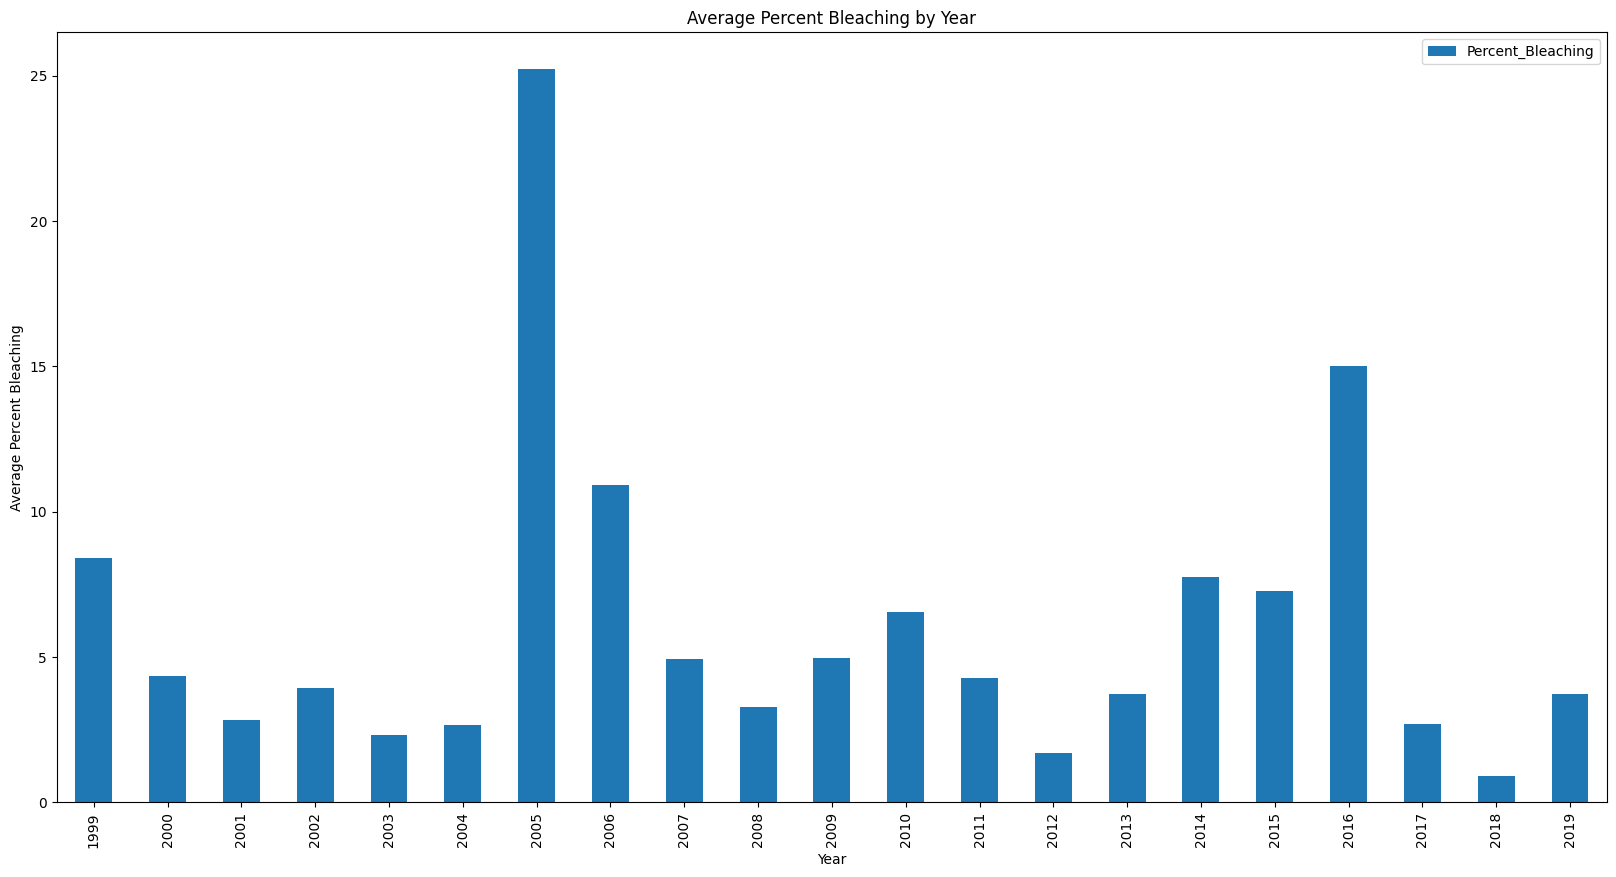

In [ ]:
#Data grouped by year and summed
mean_by_year = new_cb.groupby('Date_Year').mean()
mean_by_year.plot(y='Percent_Bleaching', kind='bar', figsize=(20, 10))
plt.xlabel('Year')
plt.ylabel('Average Percent Bleaching')
plt.title('Average Percent Bleaching by Year')

plt.show()

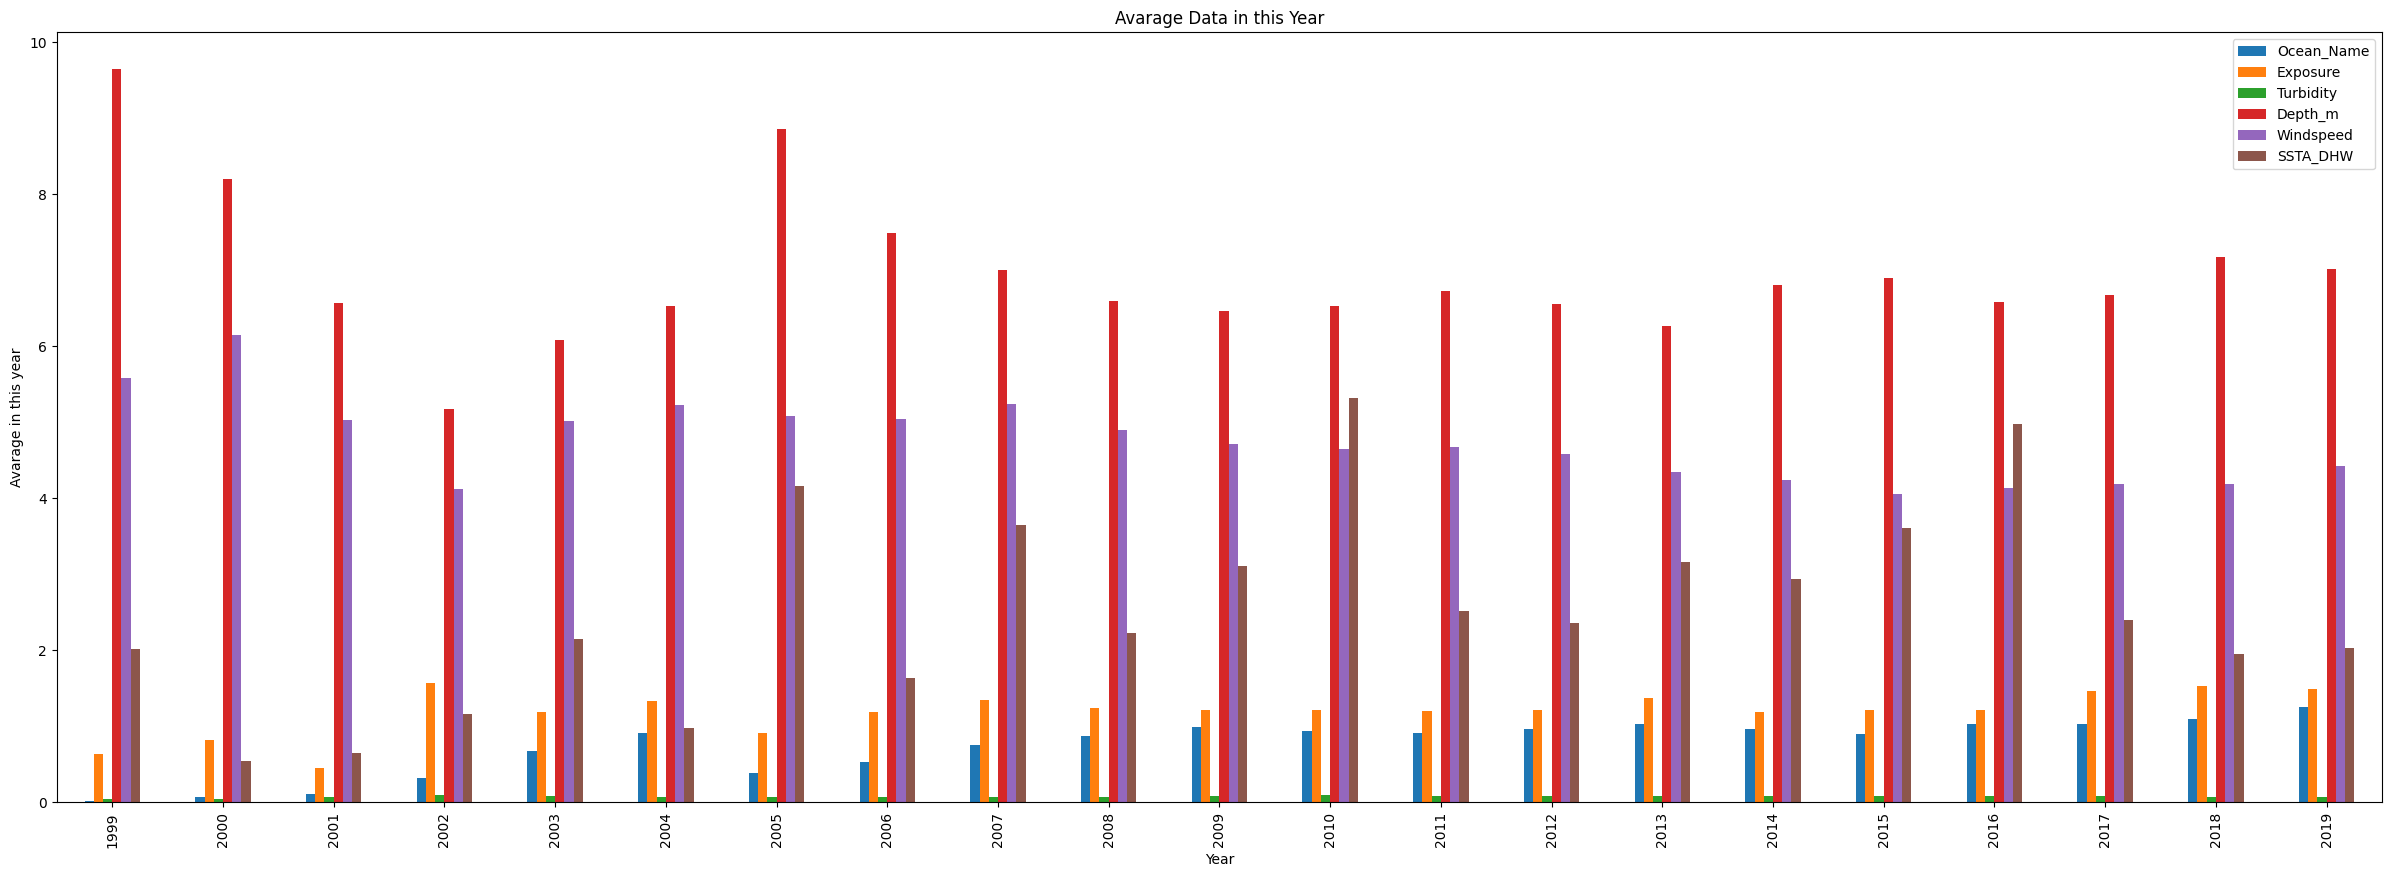

In [ ]:
#Data grouped by year and summed
avarage_by_year = new_cb.groupby('Date_Year').mean()
avarage_by_year=avarage_by_year.drop('Date_Month', axis=1)
avarage_by_year=avarage_by_year.drop('Distance_to_Shore', axis=1)
avarage_by_year1=avarage_by_year.drop(['Temperature_Kelvin','ClimSST','Percent_Bleaching','Cyclone_Frequency'], axis=1)


# Bar plot of the summed data for each year
avarage_by_year1.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Year')
plt.ylabel('Avarage in this year')
plt.title('Avarage Data in this Year')

plt.show()
#big ones on seperate graph

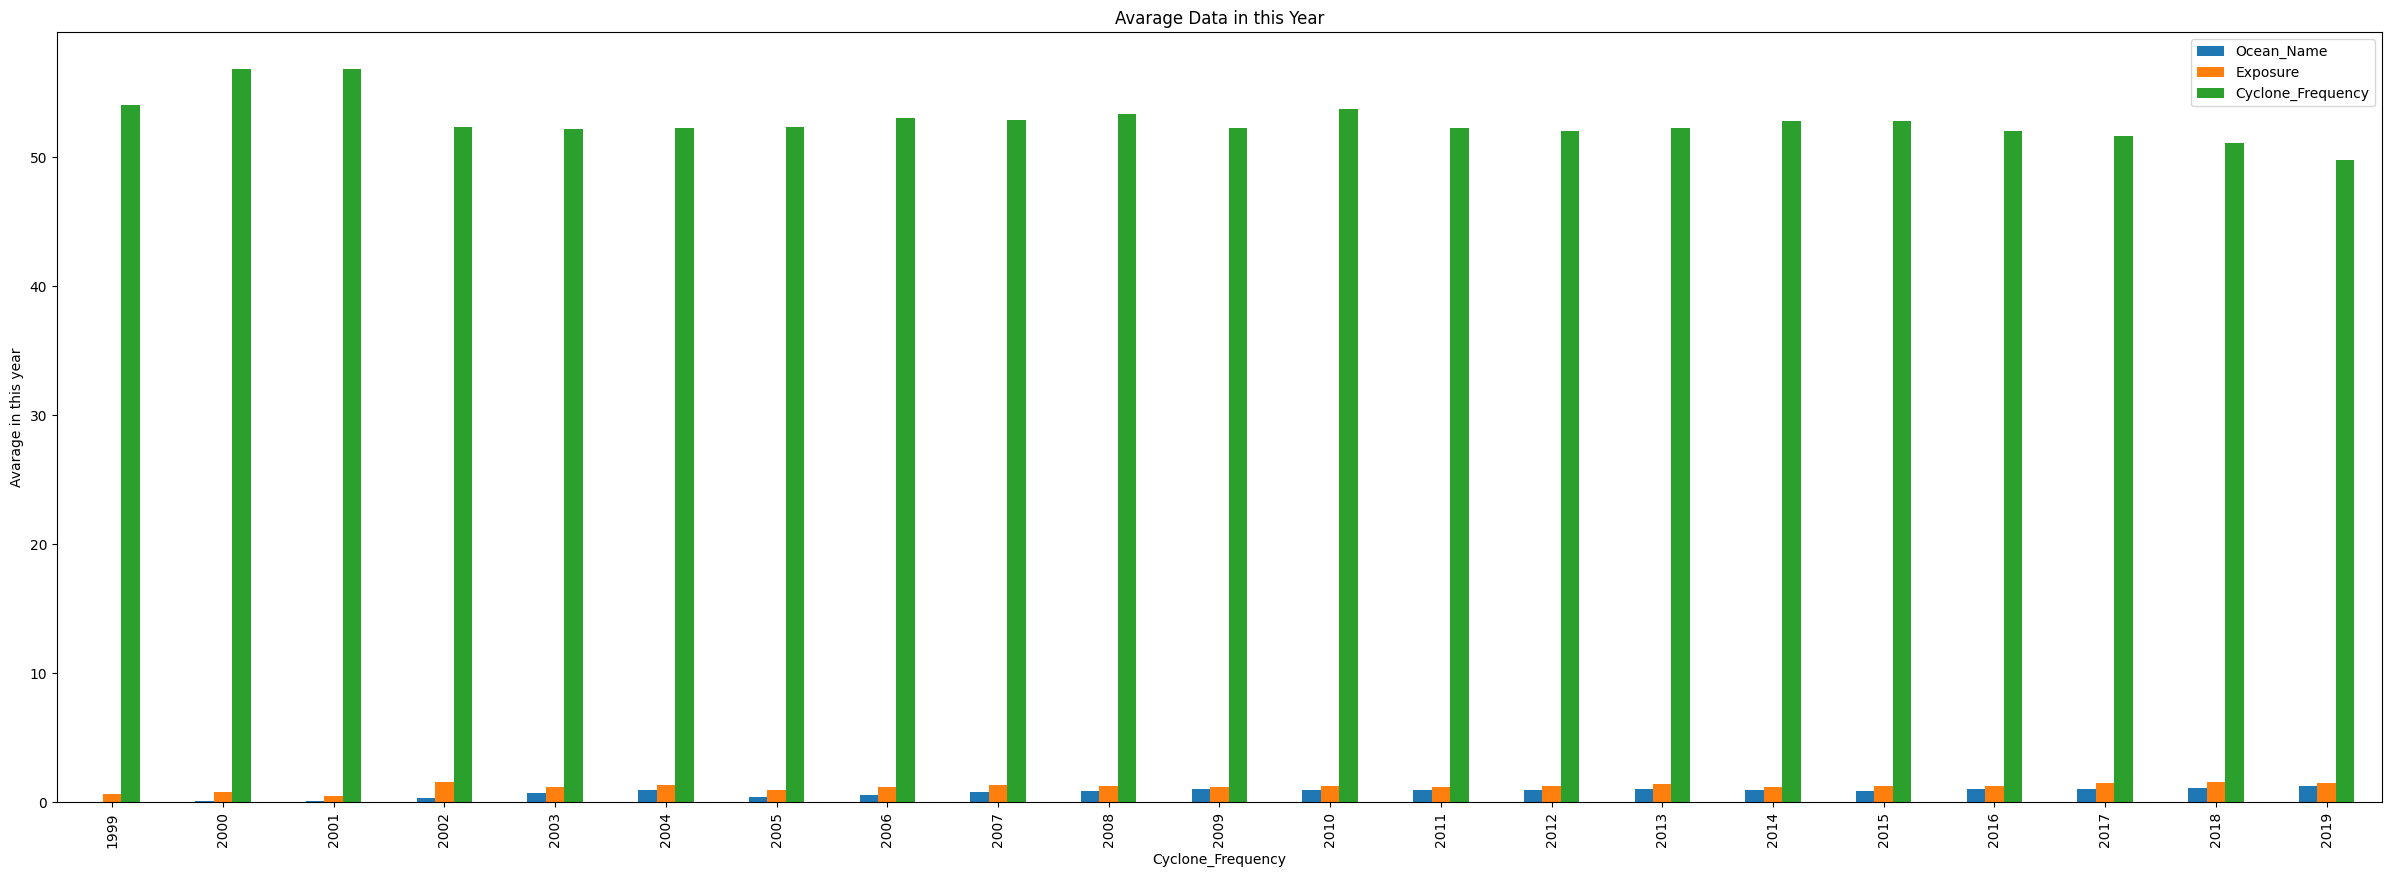

In [ ]:
avarage_by_year2=avarage_by_year.drop(['Turbidity','Depth_m','Windspeed','SSTA_DHW','Percent_Bleaching','Temperature_Kelvin','ClimSST'], axis=1)


# Bar plot of the summed data for each year
avarage_by_year2.plot(kind='bar', figsize=(30, 10))
plt.xlabel('Cyclone_Frequency')
plt.ylabel('Avarage in this year')
plt.title('Avarage Data in this Year')

plt.show()
#big ones on seperate graph

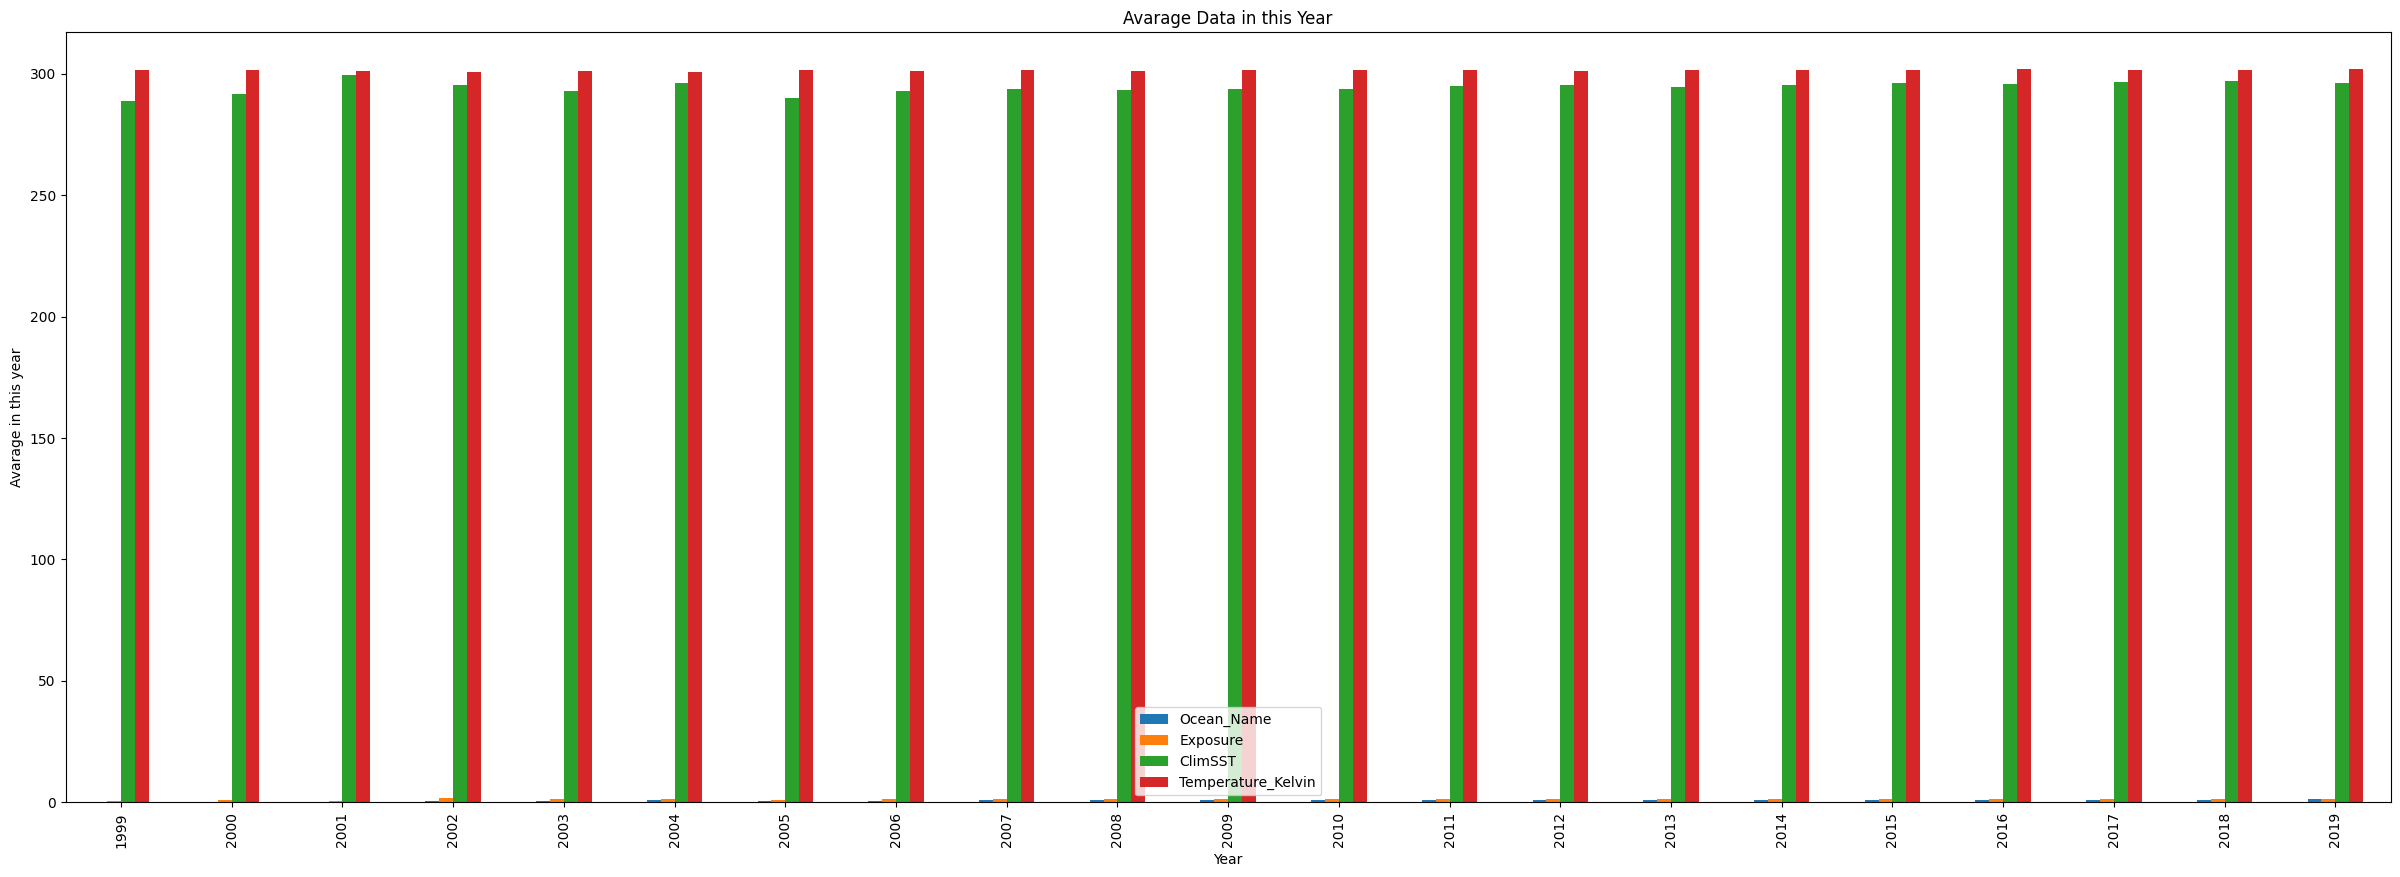

In [ ]:
avarage_by_year2=avarage_by_year.drop(['Turbidity','Cyclone_Frequency','Depth_m','Windspeed','SSTA_DHW','Percent_Bleaching'], axis=1)


# Bar plot of the summed data for each year
avarage_by_year2.plot(kind='bar', figsize=(30, 10))
plt.xlabel('Year')
plt.ylabel('Avarage in this year')
plt.title('Avarage Data in this Year')

plt.show()
#big ones on seperate graph

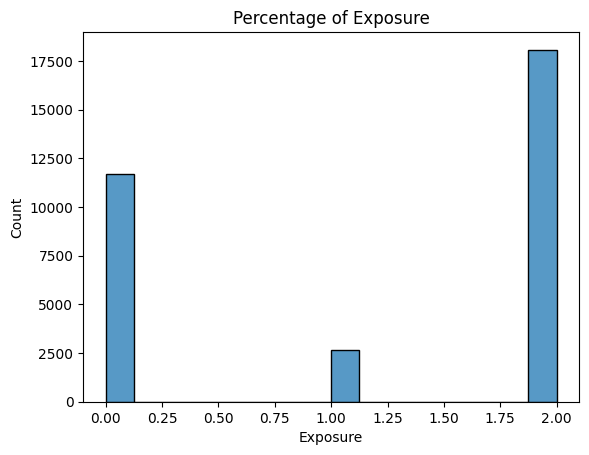

In [ ]:
sns.histplot(x="Exposure", data=new_cb)
plt.title("Percentage of Exposure")

# Show the plot
plt.show()

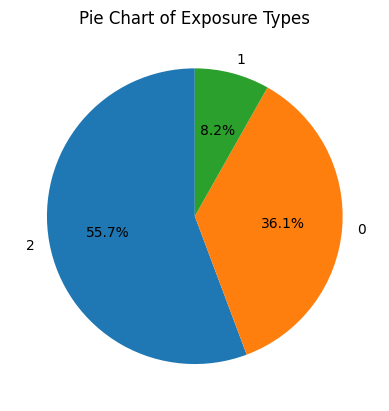

In [ ]:
ocean_counts = new_cb['Exposure'].value_counts()

# Create a pie chart
ocean_counts.plot.pie(autopct='%1.1f%%', startangle=90)

# Set the title and labels for the pie chart
plt.title("Pie Chart of Exposure Types")
plt.ylabel("")

# Show the pie chart
plt.show()

In [ ]:
#devide the data into two groups
#group1 is all the 0 for the percentage bleaching=> means there was no bleaching
zero_bleaching = data[data['Percent_Bleaching'] == 0]

#group2 is the rest
bleaching=data[data['Percent_Bleaching'] > 0]

In [ ]:
#devide the data into two groups
#group1 is all the 0 for the percentage bleaching=> means there was no bleaching
zero_bleaching = new_cb[new_cb['Percent_Bleaching'] == 0]

#group2 is the rest
bleaching=new_cb[new_cb['Percent_Bleaching'] > 0]

In [ ]:
zero_bleaching.shape


(16534, 13)

In [ ]:
bleaching.shape

(15930, 13)

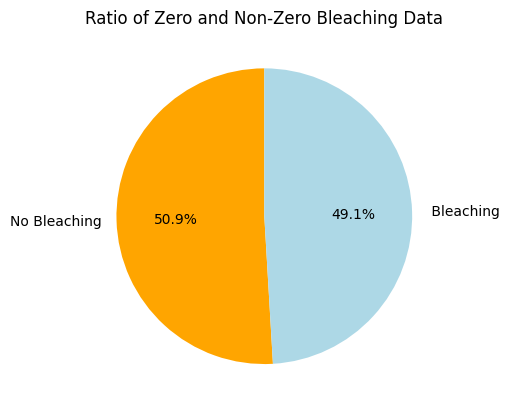

In [ ]:
# Calculate the ratio of zero and non-zero bleaching data
bleaching_counts = new_cb['Percent_Bleaching'].value_counts()
zero_bleaching_count = bleaching_counts.get(0, 0)
nonzero_bleaching_count = bleaching_counts.sum() - zero_bleaching_count
ratio = [zero_bleaching_count, nonzero_bleaching_count]

# Plot the results using a pie chart
labels = ['No Bleaching', ' Bleaching']
colors = ['orange', 'lightblue']
plt.pie(ratio, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of Zero and Non-Zero Bleaching Data')
plt.show()

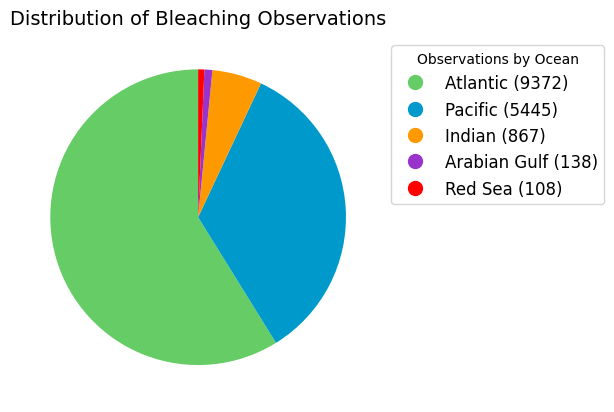

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

ocean_counts = bleaching['Ocean_Name'].value_counts()

# Define the colors for each ocean
ocean_colors = {
    'Pacific': '#0099cc', 
    'Atlantic': '#66cc66', 
    'Indian': '#ff9900',  
    'Red Sea': 'red',  
    'Arabian Gulf': '#9933cc',  
}

# Create a pie chart using the defined colors and without displaying percentages and without labels
pie, _ = plt.pie(ocean_counts.values, startangle=90, colors=[ocean_colors[ocean] for ocean in ocean_counts.index])

# Set the title for the pie chart
plt.title("Distribution of Bleaching Observations", fontsize=14)

# Create a legend for color and percentage
legend_labels = []
for label, percent, wedge in zip(ocean_counts.index, ocean_counts.values, pie):
    legend_labels.append(f"{label} ({percent})")
    plt.plot([], [], color=ocean_colors[label], marker='o', markersize=10, label=f"{label} ({percent}%)", linewidth=0, markerfacecolor=ocean_colors[label])
plt.legend(handles=plt.gca().lines, labels=legend_labels, title='Observations by Ocean', loc='center left', bbox_to_anchor=(1, 0.75), fontsize=12, handler_map={tuple: HandlerTuple(ndivide=None)})

# Remove y-axis label
plt.ylabel('')

# Show the pie chart
plt.show()

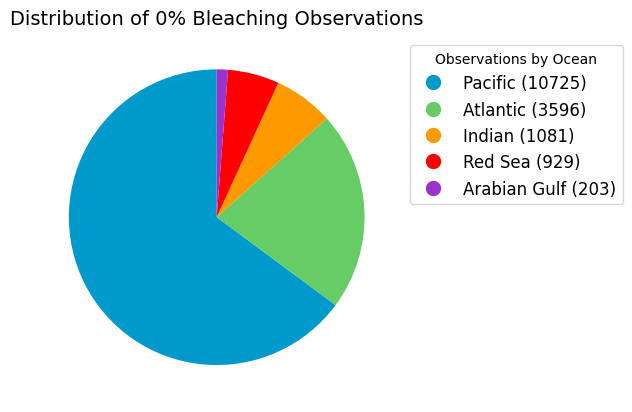

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

ocean_counts = zero_bleaching['Ocean_Name'].value_counts()

# Define the colors for each ocean
ocean_colors = {
    'Pacific': '#0099cc', 
    'Atlantic': '#66cc66', 
    'Indian': '#ff9900',  
    'Red Sea': 'red',  
    'Arabian Gulf': '#9933cc',  
}

# Create a pie chart using the defined colors and without displaying percentages and without labels
pie, _ = plt.pie(ocean_counts.values, startangle=90, colors=[ocean_colors[ocean] for ocean in ocean_counts.index])

# Set the title for the pie chart
plt.title("Distribution of 0% Bleaching Observations", fontsize=14)

# Create a legend for color and percentage
legend_labels = []
for label, percent, wedge in zip(ocean_counts.index, ocean_counts.values, pie):
    legend_labels.append(f"{label} ({percent})")
    plt.plot([], [], color=ocean_colors[label], marker='o', markersize=10, label=f"{label} ({percent}%)", linewidth=0, markerfacecolor=ocean_colors[label])
plt.legend(handles=plt.gca().lines, labels=legend_labels, title='Observations by Ocean', loc='center left', bbox_to_anchor=(1, 0.75), fontsize=12, handler_map={tuple: HandlerTuple(ndivide=None)})

# Remove y-axis label
plt.ylabel('')

# Show the pie chart
plt.show()

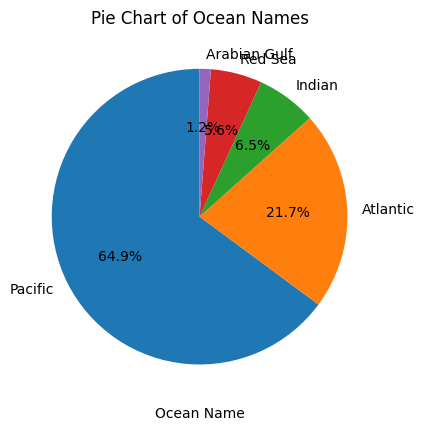

In [ ]:
ocean_counts = zero_bleaching['Ocean_Name'].value_counts()

# Create a pie chart
ocean_counts.plot.pie(autopct='%1.1f%%', startangle=90)

# Set the title and labels for the pie chart
plt.title("Pie Chart of Ocean Names")
plt.xlabel("Ocean Name")
plt.ylabel("")


# Show the pie chart
plt.show()
#############is has to be in relativation coralation to the amount of dta collected in that ocean ->graph undernieth represents that better

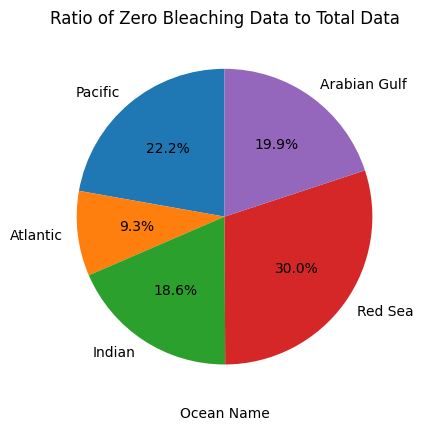

In [ ]:
# Count the number of data points in each ocean
ocean_data_counts = data['Ocean_Name'].value_counts()

# Divide the counts of zero bleaching by the total number of data points in each ocean
ocean_ratios = ocean_counts / ocean_data_counts

# Create a pie chart with the ocean ratios
ocean_ratios.plot.pie(autopct='%1.1f%%', startangle=90)

# Set the title and labels for the pie chart
plt.title("Ratio of Zero Bleaching Data to Total Data")
plt.xlabel("Ocean Name")
plt.ylabel("")

# Show the pie chart
plt.show()

In [ ]:

#for not zero data set: show coralations betwen differnt columns and percent_bleaching

In [ ]:
bleaching.head()

Ocean_Name  Distance_to_Shore   Exposure  Turbidity  Cyclone_Frequency  \
0   Atlantic            8519.23    Exposed     0.0287              49.90   
1   Atlantic             182.33    Exposed     0.0429              61.52   
2   Atlantic             313.13    Exposed     0.0424              65.39   
3   Atlantic             792.00    Exposed     0.0424              65.39   
4   Atlantic            4569.60  Sometimes     0.0954              51.54   

   Date_Month  Date_Year  Depth_m  Percent_Bleaching  ClimSST  \
0           9       2005    10.00               50.2   301.61   
1           1       2006     7.00               50.9   298.79   
2           4       2006     9.02               50.9   300.16   
3           4       2006    12.50               50.9   300.15   
4           8       2005    11.50               51.0   302.63   

   Temperature_Kelvin  Windspeed  SSTA_DHW  
0              302.05        8.0      0.00  
1              299.18        8.0      0.00  
2              299.61        3.0      0.00  
3              299.70        3.0      0.00  
4              303.22        1.0      4.28

Text(0, 0.5, 'Percent Bleaching')

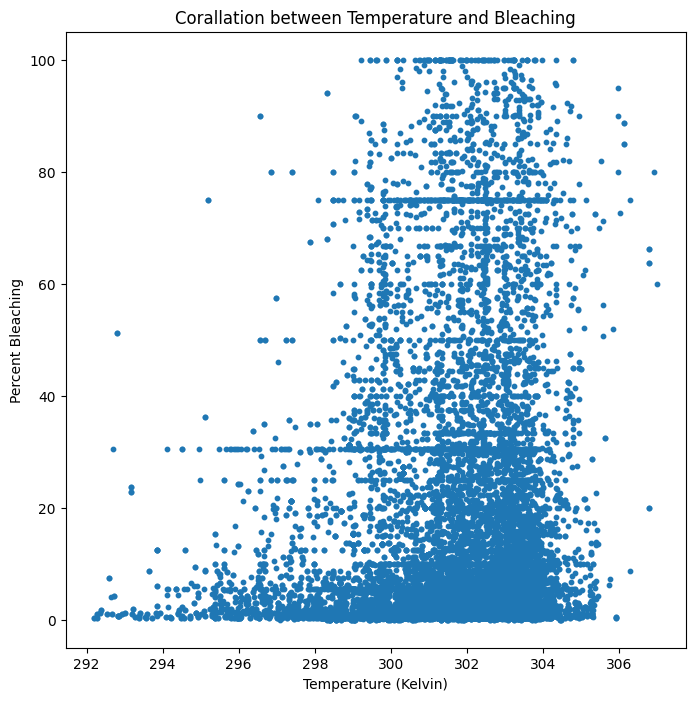

In [ ]:
y = bleaching["Percent_Bleaching"]
x = bleaching["Temperature_Kelvin"]
plt.figure(figsize=(8,8))
plt.scatter(x, y, s=10)
plt.title("Corallation between Temperature and Bleaching")
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Percent Bleaching")

#bleaching occours most often between 299 and 305 klevin

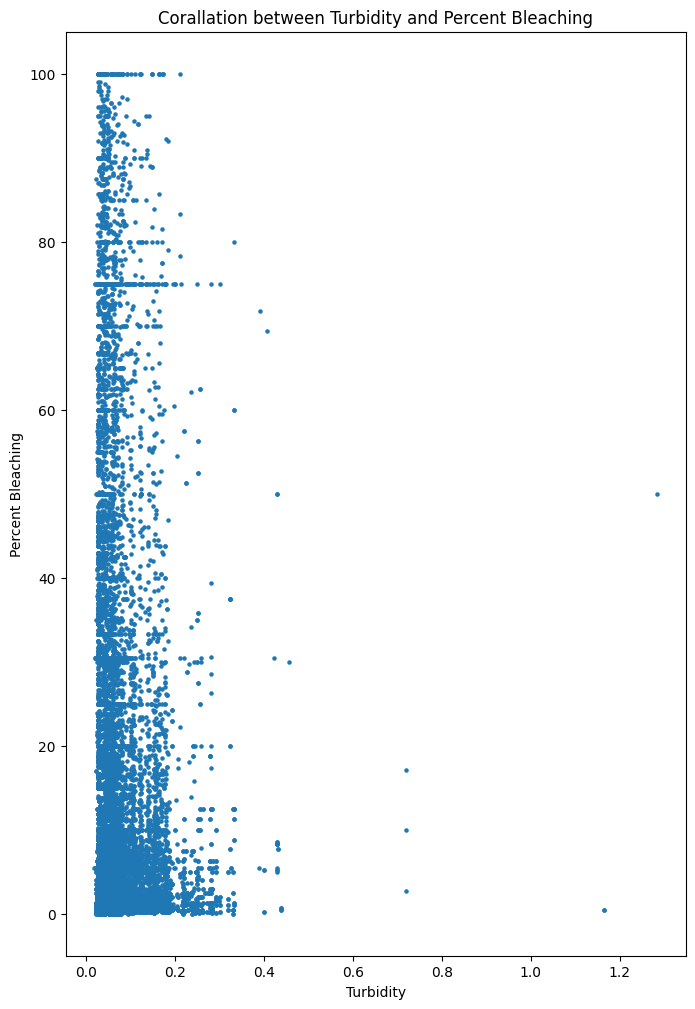

In [ ]:
y = bleaching["Percent_Bleaching"]
x = bleaching["Turbidity"]
plt.figure(figsize=(8,12))
plt.scatter(x, y, s=5)

plt.title("Corallation between Turbidity and Percent Bleaching")
plt.xlabel("Turbidity")
plt.ylabel("Percent Bleaching")

plt.show()

In [ ]:
# Group the data by ocean and calculate the mean temperature for each ocean
ocean_mean_temp_bleaching = bleaching.groupby('Ocean_Name')['Temperature_Kelvin'].mean()

# Print the results
print(ocean_mean_temp_bleaching)

Ocean_Name
Arabian Gulf    302.847029
Atlantic        301.726976
Indian          301.684095
Pacific         301.200634
Red Sea         299.414444
Name: Temperature_Kelvin, dtype: float64


In [ ]:
# Group the data by ocean and calculate the mean temperature for each ocean
ocean_mean_temp_zero = zero_bleaching.groupby('Ocean_Name')['Temperature_Kelvin'].mean()

# Print the results
print(ocean_mean_temp_zero)

Ocean_Name
Arabian Gulf    302.005074
Atlantic        300.903059
Indian          300.992211
Pacific         301.480229
Red Sea         298.870549
Name: Temperature_Kelvin, dtype: float64


In [ ]:
#temperature for no bleaching is on avarage lower than where there is bleaching apart from pacific ->show this in a graph

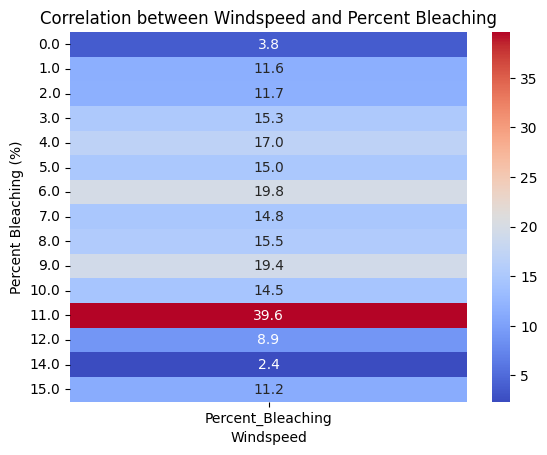

In [ ]:
# Create a pivot table of percent bleaching by temperature
table = bleaching.pivot_table(values='Percent_Bleaching', index="Windspeed", aggfunc='mean')

# Create a heatmap using seaborn
sns.heatmap(table, cmap='coolwarm', annot=True, fmt='.1f')

# Add axis labels and a title
plt.xlabel('Windspeed')
plt.ylabel('Percent Bleaching (%)')
plt.title('Correlation between Windspeed and Percent Bleaching')

# Show the plot
plt.show()
#wind speed from 11 causes most bleaching??

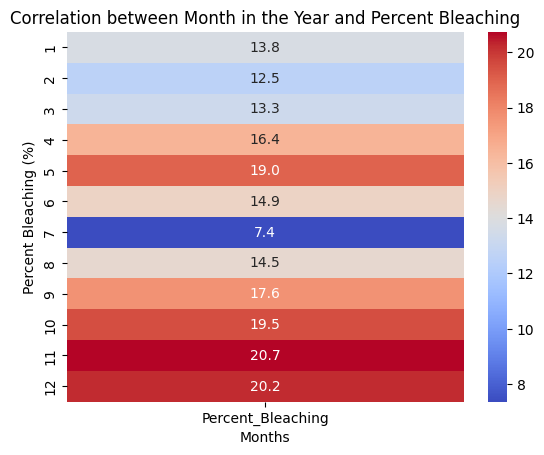

In [ ]:
# Create a pivot table of percent bleaching by temperature
table = bleaching.pivot_table(values='Percent_Bleaching', index="Date_Month", aggfunc='mean')

# Create a heatmap using seaborn
sns.heatmap(table, cmap='coolwarm', annot=True, fmt='.1f')

# Add axis labels and a title
plt.xlabel('Months')
plt.ylabel('Percent Bleaching (%)')
plt.title('Correlation between Month in the Year and Percent Bleaching')

# Show the plot
plt.show()
#bleaching is more likly in the last month of the year???

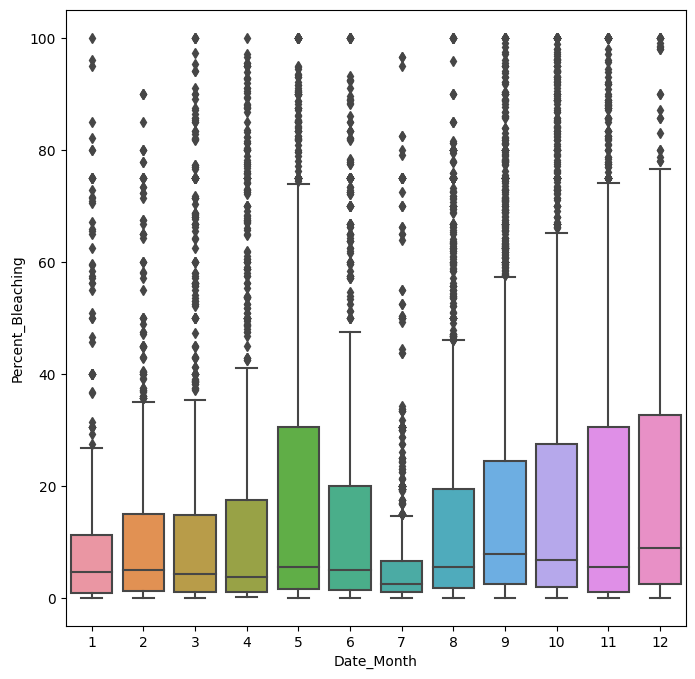

In [ ]:

plt.figure(figsize=(8,8))
sns.boxplot(data=bleaching, x="Date_Month", y="Percent_Bleaching")
plt.xlabel("Date_Month")
plt.ylabel("Percent_Bleaching")
plt.show()


###Correlation matrix

In [ ]:
# Create a correlation matrix
corr_matrix = new_cb.corr()
corr_matrix

Ocean_Name  Distance_to_Shore  Exposure  Turbidity  \
Ocean_Name            1.000000          -0.048177  0.264641   0.084963   
Distance_to_Shore    -0.048177           1.000000 -0.085360  -0.022651   
Exposure              0.264641          -0.085360  1.000000   0.178598   
Turbidity             0.084963          -0.022651  0.178598   1.000000   
Cyclone_Frequency    -0.341920           0.017563 -0.166591  -0.024311   
Date_Month           -0.032759          -0.057970 -0.083219   0.014438   
Date_Year             0.289335          -0.053473  0.146505   0.071223   
Depth_m              -0.162288           0.021423 -0.263634  -0.186103   
Percent_Bleaching    -0.209888           0.005954 -0.164437  -0.081933   
ClimSST              -0.005205           0.101171  0.033664   0.136553   
Temperature_Kelvin   -0.158402          -0.042434 -0.002437   0.063440   
Windspeed            -0.097993           0.088275 -0.045425  -0.173138   
SSTA_DHW              0.046178           0.013875 -0.022786   0.092790   

                    Cyclone_Frequency  Date_Month  Date_Year   Depth_m  \
Ocean_Name                  -0.341920   -0.032759   0.289335 -0.162288   
Distance_to_Shore            0.017563   -0.057970  -0.053473  0.021423   
Exposure                    -0.166591   -0.083219   0.146505 -0.263634   
Turbidity                   -0.024311    0.014438   0.071223 -0.186103   
Cyclone_Frequency            1.000000    0.087890  -0.091873  0.044815   
Date_Month                   0.087890    1.000000  -0.042088  0.044629   
Date_Year                   -0.091873   -0.042088   1.000000 -0.072169   
Depth_m                      0.044815    0.044629  -0.072169  1.000000   
Percent_Bleaching            0.075136    0.080273  -0.094335  0.161501   
ClimSST                      0.003043   -0.006441   0.087881 -0.065728   
Temperature_Kelvin           0.057585    0.100860   0.077724  0.052450   
Windspeed                    0.100749   -0.003523  -0.184477  0.023405   
SSTA_DHW                     0.054816    0.120024   0.080750  0.017207   

                    Percent_Bleaching   ClimSST  Temperature_Kelvin  \
Ocean_Name                  -0.209888 -0.005205           -0.158402   
Distance_to_Shore            0.005954  0.101171           -0.042434   
Exposure                    -0.164437  0.033664           -0.002437   
Turbidity                   -0.081933  0.136553            0.063440   
Cyclone_Frequency            0.075136  0.003043            0.057585   
Date_Month                   0.080273 -0.006441            0.100860   
Date_Year                   -0.094335  0.087881            0.077724   
Depth_m                      0.161501 -0.065728            0.052450   
Percent_Bleaching            1.000000 -0.055220            0.106003   
ClimSST                     -0.055220  1.000000            0.131067   
Temperature_Kelvin           0.106003  0.131067            1.000000   
Windspeed                    0.057775 -0.115997           -0.436066   
SSTA_DHW                     0.215674 -0.004733            0.153050   

                    Windspeed  SSTA_DHW  
Ocean_Name          -0.097993  0.046178  
Distance_to_Shore    0.088275  0.013875  
Exposure            -0.045425 -0.022786  
Turbidity           -0.173138  0.092790  
Cyclone_Frequency    0.100749  0.054816  
Date_Month          -0.003523  0.120024  
Date_Year           -0.184477  0.080750  
Depth_m              0.023405  0.017207  
Percent_Bleaching    0.057775  0.215674  
ClimSST             -0.115997 -0.004733  
Temperature_Kelvin  -0.436066  0.153050  
Windspeed            1.000000 -0.016027  
SSTA_DHW            -0.016027  1.000000

In [ ]:
# Create a lower triangular mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) #mask the top falues and do not mask bottom
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True],
       [False, False, False,

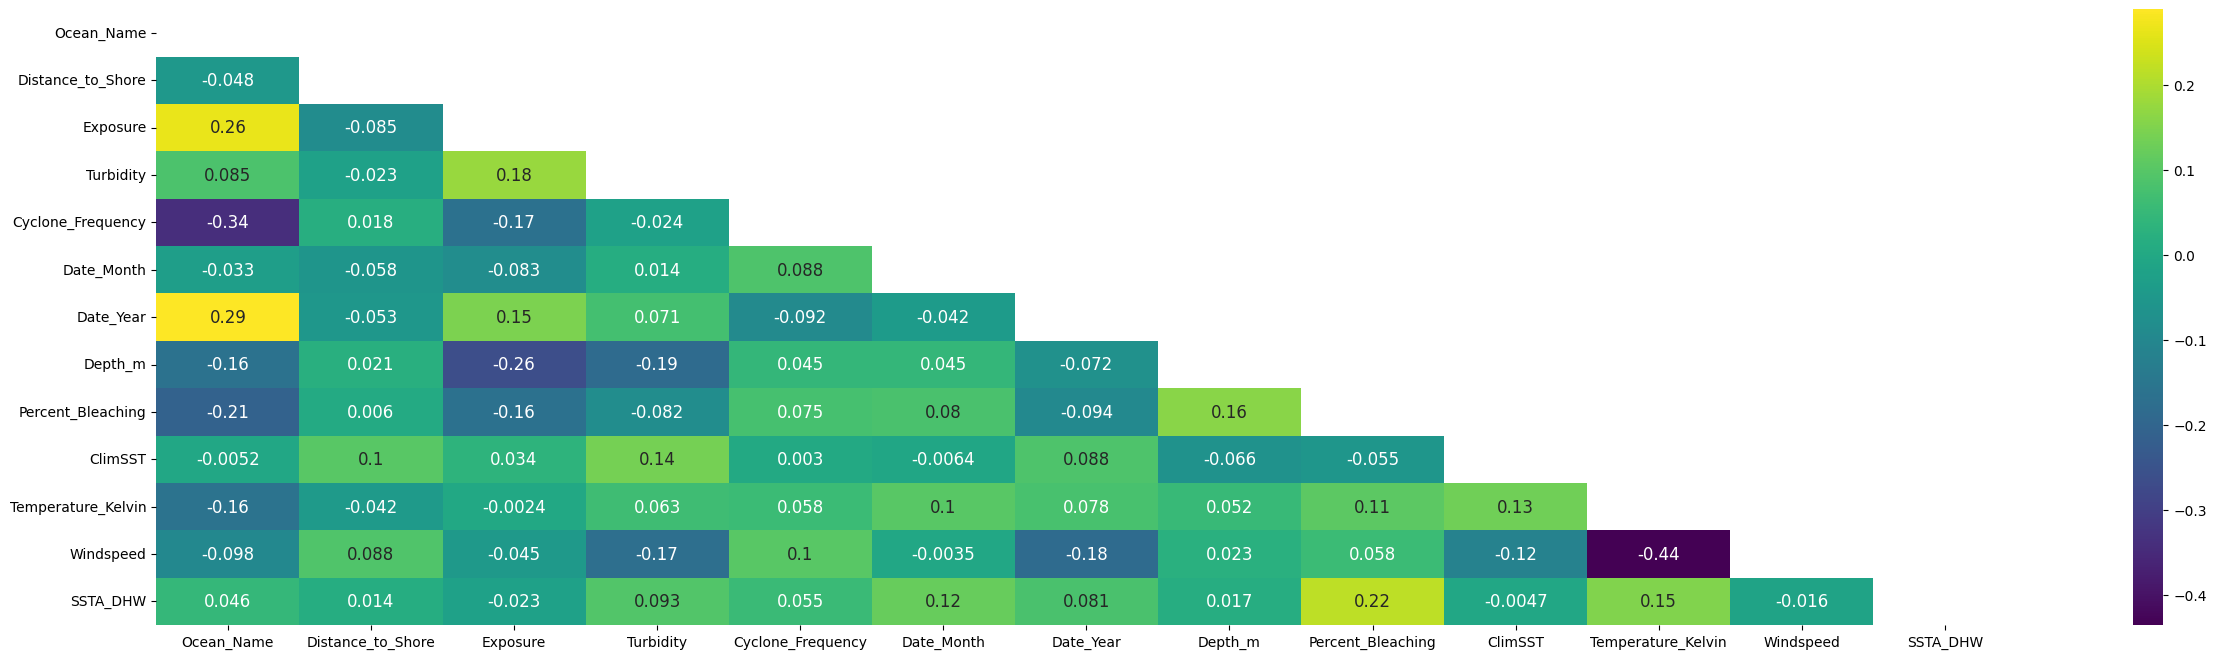

<Figure size 3000x800 with 0 Axes>

In [ ]:
# cmap = 'cividis' or 'viridis' is good options since it is for color vision deficiencies
plt.figure(figsize=(30, 8))

# Create a heatmap of the correlation matrix - only what you need!
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 12}, cmap="viridis", mask=mask)

# cmap = 'cividis' or 'viridis' is good options since it is for color vision deficiencies
plt.figure(figsize=(30, 8))

# Show the plot
plt.show()

# Predict IF bleaching occured

##Learning Models

In [ ]:
bin_cb=data.copy()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column in the DataFrame
for col in bin_cb.columns:
    if bin_cb[col].dtype == 'object':
        # Check if the column is of object (string) data type
        bin_cb[col] = label_encoder.fit_transform(bin_cb[col])

In [ ]:
bin_cb.head()

Ocean_Name  Distance_to_Shore  Exposure  Turbidity  Cyclone_Frequency  \
0           1            8519.23         0     0.0287              49.90   
1           1             182.33         0     0.0429              61.52   
2           1             313.13         0     0.0424              65.39   
3           1             792.00         0     0.0424              65.39   
4           1            4569.60         2     0.0954              51.54   

   Date_Month  Date_Year  Depth_m  Percent_Bleaching  ClimSST  \
0           9       2005    10.00               50.2   301.61   
1           1       2006     7.00               50.9   298.79   
2           4       2006     9.02               50.9   300.16   
3           4       2006    12.50               50.9   300.15   
4           8       2005    11.50               51.0   302.63   

   Temperature_Kelvin  Windspeed  SSTA_DHW  
0              302.05        8.0      0.00  
1              299.18        8.0      0.00  
2              299.61        3.0      0.00  
3              299.70        3.0      0.00  
4              303.22        1.0      4.28

In [ ]:
bin_cb['Percent_Bleaching'] = bin_cb['Percent_Bleaching'].apply(lambda x: 1 if x != 0 else x)

In [ ]:
value_counts = bin_cb["Percent_Bleaching"].value_counts()
print(value_counts)

0.0    16534
1.0    15930
Name: Percent_Bleaching, dtype: int64


In [ ]:
bin_cb1=bin_cb.copy()
bin_cb2=bin_cb.copy()

###**Logistic Regression**

In [ ]:
X = bin_cb.drop('Percent_Bleaching', axis=1)
y = bin_cb['Percent_Bleaching']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #can make test_size= 0.2, .25, .15 (.3 kind of the limit)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
# Evaluate the performance of the model on the test data
y_pred = lr.predict(X_test_scaled)
cm1=confusion_matrix(y_test, y_pred)
scores1=classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print(cm1)
print(classification_report(y_test, y_pred))
print(accuracy)

[[2447  944]
 [1073 2029]]
              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71      3391
         1.0       0.68      0.65      0.67      3102

    accuracy                           0.69      6493
   macro avg       0.69      0.69      0.69      6493
weighted avg       0.69      0.69      0.69      6493

0.6893577699060527


In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
K= X.shape[1]

accuracy=[]
f1=[]

for i in range(1,K+1):
  rfe = RFE(estimator=lr, n_features_to_select=i)
  rfe.fit(X_train_scaled, y_train)

  # select only the selected features
  X_selected = X[X.columns[rfe.support_]]
  X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
  

  logreg = LogisticRegression(max_iter=1000)
  logreg.fit(X_selected_train, y_train)

  y_pred = logreg.predict(X_selected_test)
  accuracy.append(accuracy_score(y_test, y_pred))
  
  f1.append(f1_score(y_test, y_pred))

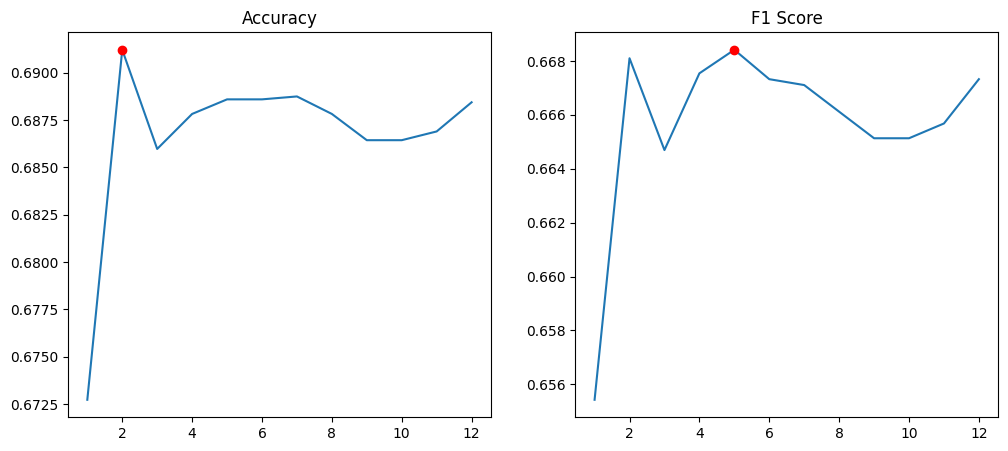

Coordinates of maximum accuracy point: (2, 0.6912059140612968)
Coordinates of maximum f1 score point: (5, 0.6684158740570678)


In [ ]:
# Plot both graphs side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Plot accuracy scores
ax1.plot(range(1,K+1),accuracy)
ax1.set_title('Accuracy')
max_accuracy = max(accuracy) # Find the maximum accuracy score and its index
max_accuracy_index = accuracy.index(max_accuracy)
ax1.plot(max_accuracy_index+1, max_accuracy, 'ro') # Plot a red dot at the maximum accuracy point

# Plot f1 scores
ax2.plot(range(1,K+1),f1)
ax2.set_title('F1 Score')
max_f1 = max(f1) # Find the maximum f1 score and its index
max_f1_index = f1.index(max_f1)
ax2.plot(max_f1_index+1, max_f1, 'ro') # Plot a red dot at the maximum f1 score point

#Show the plot
plt.show()

# Print the coordinates of the highest points
print("Coordinates of maximum accuracy point: ({}, {})".format(max_accuracy_index+1, max_accuracy))
print("Coordinates of maximum f1 score point: ({}, {})".format(max_f1_index+1, max_f1))

In [ ]:
# the best model:
#for accuracy k=5 *chosen*
#for f1 score k=6

rfe = RFE(estimator=lr, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

X_selected = X[X.columns[rfe.support_]]
X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_selected_train, y_train)

y_pred = logreg.predict(X_selected_test)

In [ ]:
print(X_selected.columns)

Index(['Ocean_Name', 'Distance_to_Shore', 'Depth_m', 'Temperature_Kelvin',
       'SSTA_DHW'],
      dtype='object')


In [ ]:
LRselected = list(X_selected.columns)

In [ ]:
# Evaluate the performance of the model on the test data
LRcm=confusion_matrix(y_test, y_pred)
LRscores=classification_report(y_test, y_pred)
LRaccuracy=accuracy_score(y_test, y_pred)
print(LRcm)
print(LRscores) #f1 score
print(LRaccuracy)

[[2433  958]
 [1064 2038]]
              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71      3391
         1.0       0.68      0.66      0.67      3102

    accuracy                           0.69      6493
   macro avg       0.69      0.69      0.69      6493
weighted avg       0.69      0.69      0.69      6493

0.6885877098413676


In [ ]:
LR1scores = classification_report(y_test, y_pred, output_dict=True)
LRweighted_avg_value = LR1scores['weighted avg']['f1-score']
print(LRweighted_avg_value)

0.6882772837970681


Text(0.5, 1.0, 'Accuracy(Logistic Regression): 0.6886')

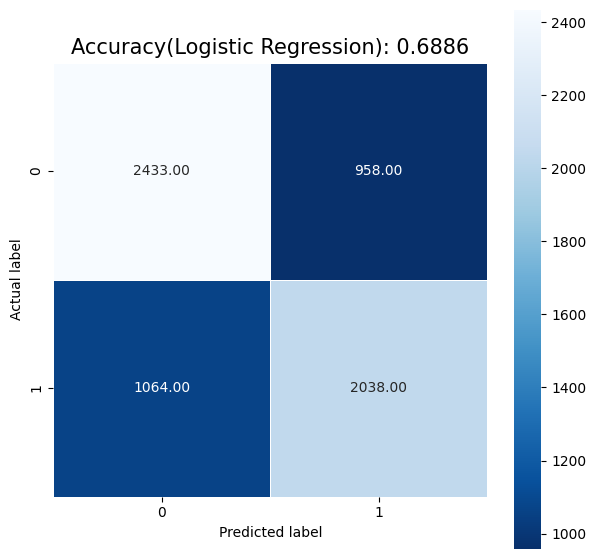

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(LRcm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy(Logistic Regression): {:.4f}'.format(LRaccuracy)
plt.title(all_sample_title, size = 15)

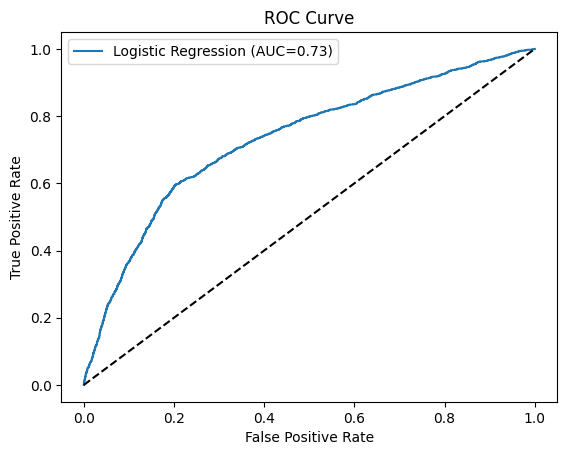

0.7319610582189249


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, classification_report
y_pred_prob = logreg.predict_proba(X_selected_test)[:, 1]
y_pred_prob
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
LRauc_score = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={LRauc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print(LRauc_score)

### **Decision Tree**

In [ ]:
X = bin_cb1.drop('Percent_Bleaching', axis=1)
y = bin_cb1['Percent_Bleaching']

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create a decision tree classifier object
dtc = DecisionTreeClassifier(criterion='entropy')
# Train the classifier on the training data
dtc.fit(X_train_scaled, y_train)
# Make predictions on the testing data
y_pred = dtc.predict(X_test_scaled)

In [ ]:
# Evaluate the performance of the model on the test data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score

In [ ]:
# Evaluate the performance of the model on the test data
cm1=confusion_matrix(y_test, y_pred)
scores1=classification_report(y_test, y_pred, zero_division=1)
accuracy1=accuracy_score(y_test, y_pred)
print(cm1)
print(scores1)
print(accuracy1)

[[3203  188]
 [ 239 2863]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      3391
         1.0       0.94      0.92      0.93      3102

    accuracy                           0.93      6493
   macro avg       0.93      0.93      0.93      6493
weighted avg       0.93      0.93      0.93      6493

0.9342368704758971


*select k best*

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
K= X.shape[1]

accuracy=[]
f1=[]

for i in range(1,K+1):
  dtc = DecisionTreeClassifier(criterion='entropy')
  rfe = RFE(estimator=lr, n_features_to_select=i)
  rfe.fit(X_train_scaled, y_train)

  # select only the selected features
  X_selected = X[X.columns[rfe.support_]]
  X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
  
  dtc.fit(X_selected_train, y_train)

  y_pred =dtc.predict(X_selected_test)
  accuracy.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred))

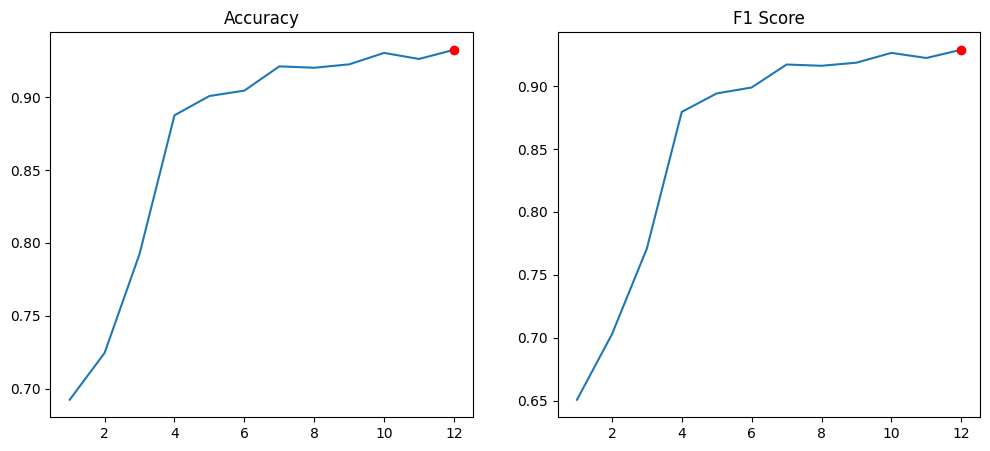

Coordinates of maximum accuracy point: (12, 0.93254273833359)
Coordinates of maximum f1 score point: (12, 0.9287804878048781)


In [ ]:
# Plot both graphs side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Plot accuracy scores
ax1.plot(range(1,K+1),accuracy)
ax1.set_title('Accuracy')
max_accuracy = max(accuracy) # Find the maximum accuracy score and its index
max_accuracy_index = accuracy.index(max_accuracy)
ax1.plot(max_accuracy_index+1, max_accuracy, 'ro') # Plot a red dot at the maximum accuracy point

# Plot f1 scores
ax2.plot(range(1,K+1),f1)
ax2.set_title('F1 Score')
max_f1 = max(f1) # Find the maximum f1 score and its index
max_f1_index = f1.index(max_f1)
ax2.plot(max_f1_index+1, max_f1, 'ro') # Plot a red dot at the maximum f1 score point

#Show the plot
plt.show()

# Print the coordinates of the highest points
print("Coordinates of maximum accuracy point: ({}, {})".format(max_accuracy_index+1, max_accuracy))
print("Coordinates of maximum f1 score point: ({}, {})".format(max_f1_index+1, max_f1))

*final model*

In [ ]:
# the best model for:
#accuracy is k=14 
#f1 is k=7 *chosen*
rfe = RFE(estimator=dtc, n_features_to_select=12)
rfe.fit(X_train_scaled, y_train)

X_selected = X[X.columns[rfe.support_]]
X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

dtc.fit(X_selected_train, y_train)

y_pred = dtc.predict(X_selected_test)

In [ ]:
print(X_selected.columns)

Index(['Ocean_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity',
       'Cyclone_Frequency', 'Date_Month', 'Date_Year', 'Depth_m', 'ClimSST',
       'Temperature_Kelvin', 'Windspeed', 'SSTA_DHW'],
      dtype='object')


In [ ]:
DTselected = list(X_selected.columns)

*confusion matrix and accuracy and f1*

In [ ]:
# Evaluate the performance of the model on the test data
DTcm=confusion_matrix(y_test, y_pred)
DTscores=classification_report(y_test, y_pred)
DTaccuracy=accuracy_score(y_test, y_pred)
print(DTcm)
print(DTscores) #f1 score
print(DTaccuracy)

[[3202  189]
 [ 243 2859]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      3391
         1.0       0.94      0.92      0.93      3102

    accuracy                           0.93      6493
   macro avg       0.93      0.93      0.93      6493
weighted avg       0.93      0.93      0.93      6493

0.933466810411212


In [ ]:
DT1scores = classification_report(y_test, y_pred, output_dict=True)
DTweighted_avg_value = DT1scores['weighted avg']['f1-score']
print(DTweighted_avg_value)

0.9334374981681002


Text(0.5, 1.0, 'Accuracy(Decision Tree): 0.9335')

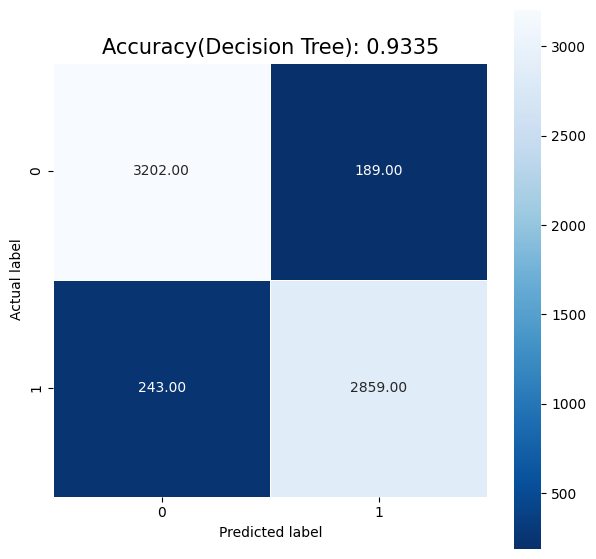

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(DTcm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy(Decision Tree): {:.4f}'.format(DTaccuracy)
plt.title(all_sample_title, size = 15)

*area under the curve*

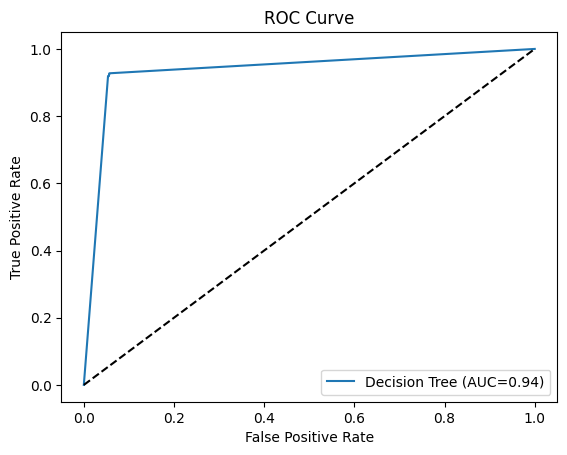

0.9365452050892862


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = dtc.predict_proba(X_selected_test)[:, 1]
y_pred_prob
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
DTauc_score = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC={DTauc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print(DTauc_score)

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, classification_report

In [ ]:
X = bin_cb2.drop('Percent_Bleaching', axis=1)
y = bin_cb2['Percent_Bleaching']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Hyperparameter tuning*

- commented out save commented out to save computing time

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define the hyperparameter search space
#param_dist = {'n_estimators': [50, 100,150, 200],'max_depth': [5, 10, 15, 20],'min_samples_leaf': [1, 5, 10]}

In [ ]:
# Create a randomized search object
#rand_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist,  cv=5, n_iter=10, scoring='accuracy')

In [ ]:
# Fit the randomized search object to the data
#rand_search.fit(X_train_scaled, y_train)

In [ ]:
# Print the best hyperparameters
#print("Best Hyperparameters:", rand_search.best_params_)

*end tuning proceed with model*

In [ ]:
# Build the random forest model
rfc = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=10)

In [ ]:
# Train the model on the training data
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=10)

In [ ]:
# Evaluate the performance of the model on the testing data
y_pred = rfc.predict(X_test_scaled)
cm1=confusion_matrix(y_test, y_pred)
accuracy = rfc.score(X_test_scaled, y_test)
report=classification_report(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print(cm1)
print(report)
print(accuracy)

[[3031  360]
 [ 588 2514]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      3391
         1.0       0.87      0.81      0.84      3102

    accuracy                           0.85      6493
   macro avg       0.86      0.85      0.85      6493
weighted avg       0.86      0.85      0.85      6493

0.8539966117357154


*select best k features*

In [ ]:
from sklearn.feature_selection import RFE
K= X.shape[1]

accuracy=[]
f1=[]

for i in range(1,K+1):
  rf = RandomForestClassifier(n_estimators=100,criterion='entropy')
  rfe = RFE(estimator=lr, n_features_to_select=i)
  rfe.fit(X_train_scaled, y_train)

  # select only the selected features
  X_selected = X[X.columns[rfe.support_]]
  X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
  
  rf.fit(X_selected_train, y_train)

  y_pred =rf.predict(X_selected_test)
  accuracy.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred))

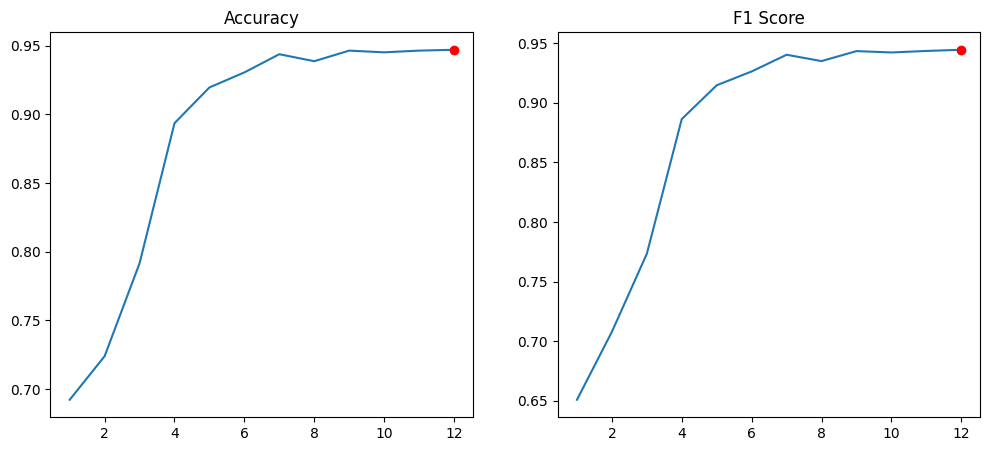

Coordinates of maximum accuracy point: (12, 0.9470198675496688)
Coordinates of maximum f1 score point: (12, 0.9444623829512431)


In [ ]:
# Plot both graphs side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Plot accuracy scores
ax1.plot(range(1,K+1),accuracy)
ax1.set_title('Accuracy')
max_accuracy = max(accuracy) # Find the maximum accuracy score and its index
max_accuracy_index = accuracy.index(max_accuracy)
ax1.plot(max_accuracy_index+1, max_accuracy, 'ro') # Plot a red dot at the maximum accuracy point

# Plot f1 scores
ax2.plot(range(1,K+1),f1)
ax2.set_title('F1 Score')
max_f1 = max(f1) # Find the maximum f1 score and its index
max_f1_index = f1.index(max_f1)
ax2.plot(max_f1_index+1, max_f1, 'ro') # Plot a red dot at the maximum f1 score point

#Show the plot
plt.show()

# Print the coordinates of the highest points
print("Coordinates of maximum accuracy point: ({}, {})".format(max_accuracy_index+1, max_accuracy))
print("Coordinates of maximum f1 score point: ({}, {})".format(max_f1_index+1, max_f1))

*final model*

In [ ]:
# the best model:
# both = 12
rfe = RFE(estimator=rfc, n_features_to_select=12) 
rfe.fit(X_train_scaled, y_train)

X_selected = X[X.columns[rfe.support_]]
X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

rfc.fit(X_selected_train, y_train)

y_pred = rfc.predict(X_selected_test)

In [ ]:
print(X_selected.columns)

Index(['Ocean_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity',
       'Cyclone_Frequency', 'Date_Month', 'Date_Year', 'Depth_m', 'ClimSST',
       'Temperature_Kelvin', 'Windspeed', 'SSTA_DHW'],
      dtype='object')


In [ ]:
RFselected = list(X_selected.columns)

*confusion matrix and accuracy and f1*

In [ ]:
# Evaluate the performance of the model on the test data
RFcm=confusion_matrix(y_test, y_pred)
RFscores=classification_report(y_test, y_pred)
RFaccuracy=accuracy_score(y_test, y_pred)
print(RFcm)
print(RFscores) #f1 score
print(RFaccuracy)

[[3029  362]
 [ 579 2523]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      3391
         1.0       0.87      0.81      0.84      3102

    accuracy                           0.86      6493
   macro avg       0.86      0.85      0.85      6493
weighted avg       0.86      0.86      0.85      6493

0.8550746958262745


In [ ]:
RF1scores = classification_report(y_test, y_pred, output_dict=True)
RFweighted_avg_value = RF1scores['weighted avg']['f1-score']
print(RFweighted_avg_value)

0.8546949358255106


Text(0.5, 1.0, 'Accuracy(Random Forest): 0.8551')

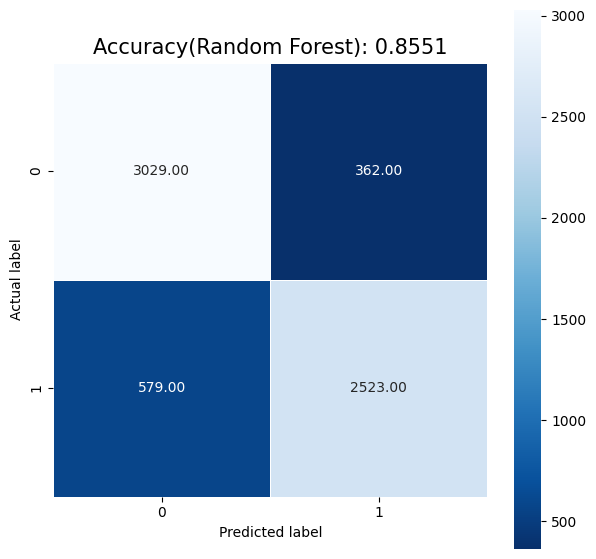

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(RFcm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy(Random Forest): {:.4f}'.format(RFaccuracy)
plt.title(all_sample_title, size = 15)

*area under the curve*

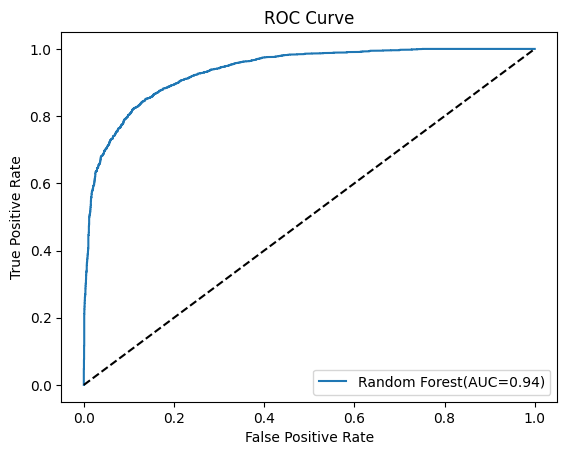

0.9359638220107421


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = rfc.predict_proba(X_selected_test)[:, 1]
y_pred_prob
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
RFauc_score = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'Random Forest(AUC={RFauc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print(RFauc_score)

###**Comparative study**

In [ ]:
LRcmT = LRcm[0]
LRcmB = LRcm[1]

DTcmT = DTcm[0]
DTcmB = DTcm[1]

RFcmT = RFcm[0]
RFcmB = RFcm[1]

In [ ]:
import numpy as np

# create a 6x4 table
table = [[0 for _ in range(4)] for _ in range(6)]

# set the row and column labels
row_labels = [0, 'Accuracy', 'Area Under the Curve','F1Score Weighted Accuracy', 'Confusion Matrix','']
col_labels = [0, 'Logistic Regression', 'Decision Tree', 'Random Forest']

# initialize the table with some values
table[1][1] = '{:.3f}'.format(LRaccuracy)
table[1][2] = '{:.3f}'.format(DTaccuracy)
table[1][3] = '{:.3f}'.format(RFaccuracy)
table[2][1] = '{:.3f}'.format(LRauc_score)
table[2][2] = '{:.3f}'.format(DTauc_score)
table[2][3] = '{:.3f}'.format(RFauc_score)
table[3][1]=  '{:.3f}'.format(LRweighted_avg_value)
table[3][2]= '{:.3f}'.format(DTweighted_avg_value)
table[3][3]= '{:.3f}'.format(RFweighted_avg_value)
table[4][1] = LRcmT
table[5][1] = LRcmB
table[4][2] = DTcmT
table[5][2] = DTcmB
table[4][3] = RFcmT
table[5][3]=  RFcmB

# print the table
col_width = 25
print("".ljust(col_width), end="")
for col_label in col_labels[1:]:
    print(str(col_label).center(col_width), end="")
print()
for i, row in enumerate(table[1:], start=1):
    print(str(row_labels[i]).ljust(col_width), end="")
    for value in row[1:]:
        print(str(value).center(col_width), end="")
    print()

                            Logistic Regression         Decision Tree            Random Forest      
Accuracy                           0.689                    0.933                    0.855          
Area Under the Curve               0.732                    0.937                    0.936          
F1Score Weighted Accuracy          0.688                    0.933                    0.855          
Confusion Matrix                [2433  958]              [3202  189]              [3029  362]       
                                [1064 2038]              [ 243 2859]              [ 579 2523]       


In [ ]:
print("Selected Features From:")
print("")
print("Logistic Regression")
print(LRselected)
print("")
print("Decision Tree")
print(DTselected)
print("")
print("Random Forest")
print(RFselected)

Selected Features From:

Logistic Regression
['Ocean_Name', 'Distance_to_Shore', 'Depth_m', 'Temperature_Kelvin', 'SSTA_DHW']

Decision Tree
['Ocean_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity', 'Cyclone_Frequency', 'Date_Month', 'Date_Year', 'Depth_m', 'ClimSST', 'Temperature_Kelvin', 'Windspeed', 'SSTA_DHW']

Random Forest
['Ocean_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity', 'Cyclone_Frequency', 'Date_Month', 'Date_Year', 'Depth_m', 'ClimSST', 'Temperature_Kelvin', 'Windspeed', 'SSTA_DHW']


**NOTE**

*If code has been rerun, numbers and features reported below my vary slightly.*

#IF bleaching occured predict what extent

## **Multiple linear regression**

In [ ]:
from sklearn.model_selection import train_test_split
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

###original full

In [ ]:
nozero = new_cb5[new_cb5['Percent_Bleaching'] != 0]


In [ ]:
value_counts = nozero["Percent_Bleaching"].value_counts()
print(value_counts)

0.25     882
5.50     723
1.00     698
0.50     677
1.25     467
        ... 
8.85       1
8.68       1
8.67       1
8.62       1
97.22      1
Name: Percent_Bleaching, Length: 2125, dtype: int64


In [ ]:
X = nozero.drop('Percent_Bleaching', axis=1)
y = nozero['Percent_Bleaching']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mlr_model = LinearRegression(fit_intercept = True)

In [ ]:
mlr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print ("Coefficients:", mlr_model.coef_)
print ("Intercept:", mlr_model.intercept_)

Coefficients: [-2.51596765e+00 -8.15348237e-05 -1.64418973e+00 -2.96679440e+01
 -6.27488341e-02  8.09095851e-02  2.88008765e-02  2.84641737e-01
 -9.15742655e-02  1.06721265e+00  9.08573909e-01  9.90120825e-01]
Intercept: -338.3648048228774


In [ ]:
y_train_pred = mlr_model.predict(X_train)
y_test_pred= mlr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print("Mean Squared Error on train data:", mse)
print("Root Mean Squared Error on train data:", np.sqrt(mse))
print("R-squared on train data:", r2)

Mean Squared Error on train data: 471.36987907536405
Root Mean Squared Error on train data: 21.711054305937427
R-squared on train data: 0.1014842357341772


In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("Mean Squared Error on test data:", mse)
print("Root Mean Squared Error on test data:", np.sqrt(mse))
print("R-squared on test data:", r2)

Mean Squared Error on test data: 448.08971270533067
Root Mean Squared Error on test data: 21.16812964589292
R-squared on test data: 0.10876307713805722


In [ ]:
# Get the R² score for the model
score = mlr_model.score(X_train, y_train)
score

0.1014842357341772

In [ ]:
# Get the R² score for the model
score = mlr_model.score(X_test, y_test)
score

0.10876307713805722

## Manually pick Year and Ocean.

In [ ]:
data.head()

Ocean_Name  Distance_to_Shore   Exposure  Turbidity  Cyclone_Frequency  \
0   Atlantic            8519.23    Exposed     0.0287              49.90   
1   Atlantic             182.33    Exposed     0.0429              61.52   
2   Atlantic             313.13    Exposed     0.0424              65.39   
3   Atlantic             792.00    Exposed     0.0424              65.39   
4   Atlantic            4569.60  Sometimes     0.0954              51.54   

   Date_Month  Date_Year  Depth_m  Percent_Bleaching  ClimSST  \
0           9       2005    10.00               50.2   301.61   
1           1       2006     7.00               50.9   298.79   
2           4       2006     9.02               50.9   300.16   
3           4       2006    12.50               50.9   300.15   
4           8       2005    11.50               51.0   302.63   

   Temperature_Kelvin  Windspeed  SSTA_DHW  
0              302.05        8.0      0.00  
1              299.18        8.0      0.00  
2              299.61        3.0      0.00  
3              299.70        3.0      0.00  
4              303.22        1.0      4.28

In [ ]:
Bleached=data[data['Percent_Bleaching'] > 0]

In [ ]:
valid_years = [1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
valid_oceans = ['Atlantic', 'Pacific', 'Indian', 'Red Sea', 'Arabian Gulf']

# ask the user to choose a year and ocean
year = int(input('Enter a year ({}) : '.format(', '.join(str(y) for y in valid_years))))
ocean = input('Enter an ocean ({}) : '.format(', '.join(valid_oceans)))

# filter the dataset to only include data with the chosen year and ocean
filtered_df = Bleached[(Bleached['Date_Year'] == year) & (Bleached['Ocean_Name'] == ocean)]

Enter a year (1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019) : 2019
Enter an ocean (Atlantic, Pacific, Indian, Red Sea, Arabian Gulf) : Pacific


In [ ]:
# loop through each column in the DataFrame
for col in filtered_df.columns:
    # check if the column is an object type
    if filtered_df[col].dtype == 'object':
        # convert the column to a numeric category
        filtered_df[col] = filtered_df[col].factorize()[0]

<ipython-input-53-ef12e38b8d03>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = filtered_df[col].factorize()[0]
<ipython-input-53-ef12e38b8d03>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = filtered_df[col].factorize()[0]


In [ ]:
filtered_df['Percent_Bleaching'] = np.log(filtered_df['Percent_Bleaching'] + 1)

<ipython-input-71-4b5e368a49fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Percent_Bleaching'] = np.log(filtered_df['Percent_Bleaching'] + 1)


In [ ]:
df=filtered_df.copy()

In [ ]:
X = filtered_df.drop('Percent_Bleaching', axis=1)
y = filtered_df['Percent_Bleaching']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mlr_model = LinearRegression(fit_intercept = True)

In [ ]:
mlr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print ("Coefficients:", mlr_model.coef_)
print ("Intercept:", mlr_model.intercept_)

Coefficients: [ 0.00000000e+00  1.80514524e-05  5.57567479e-02 -5.77865902e+00
 -6.52667880e-02  1.20706854e-01  7.78543896e-15 -1.01786206e-01
 -2.29147455e-02  1.34401783e-01 -4.57974051e-02  1.96405280e-01]
Intercept: -28.75802596854185


In [ ]:
y_train_pred = mlr_model.predict(X_train)
y_test_pred= mlr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print("Mean Squared Error on train data:", mse)
print("Root Mean Squared Error on train data:", np.sqrt(mse))
print("R-squared on train data:", r2)

Mean Squared Error on train data: 0.9904094385472384
Root Mean Squared Error on train data: 0.9951931664492267
R-squared on train data: 0.31126917303735246


In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("Mean Squared Error on test data:", mse)
print("Root Mean Squared Error on test data:", np.sqrt(mse))
print("R-squared on test data:", r2)

Mean Squared Error on test data: 1.2362803245992189
Root Mean Squared Error on test data: 1.111881434595982
R-squared on test data: 0.28806275325288133


##RUN every possible case 

In [ ]:
Bleached=data[data['Percent_Bleaching'] > 0]

In [ ]:
Bleached['Exposure'], _ = pd.factorize(Bleached['Exposure'])
Bleached['Ocean_Name'], _ = pd.factorize(Bleached['Ocean_Name'])

<ipython-input-101-3acb3a94d0f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bleached['Exposure'], _ = pd.factorize(Bleached['Exposure'])
<ipython-input-101-3acb3a94d0f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bleached['Ocean_Name'], _ = pd.factorize(Bleached['Ocean_Name'])


In [ ]:
Bleached['Percent_Bleaching'] = np.log(Bleached['Percent_Bleaching'] + 1)

<ipython-input-102-d4bcd333abbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bleached['Percent_Bleaching'] = np.log(Bleached['Percent_Bleaching'] + 1)


In [ ]:
df=Bleached.copy()

In [ ]:
df.shape

(15930, 13)

In [ ]:
year_ocean_combinations = df[['Date_Year', 'Ocean_Name']].drop_duplicates()

# create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Year', 'Ocean Name', 'R-squared on test data'])

# loop over all year-ocean combinations
for i, row in year_ocean_combinations.iterrows():
    year = row['Date_Year']
    ocean = row['Ocean_Name']
    
    # filter the dataset to only include data with the chosen year and ocean
    filtered_df = df[(df['Date_Year'] == year) & (df['Ocean_Name'] == ocean)]
    
    # split the filtered data into training and testing sets
    X = filtered_df.drop('Percent_Bleaching', axis=1)
    y = filtered_df['Percent_Bleaching']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit a linear regression model to the training data
    mlr_model = LinearRegression(fit_intercept=True)
    mlr_model.fit(X_train, y_train)
    
    # evaluate the model on the test data and store the results
    y_test_pred = mlr_model.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    results_df = results_df.append({'Year': year, 'Ocean Name': ocean, 'R-squared on test data': r2}, ignore_index=True)

# print the results tabl

<ipython-input-105-4be3a4148974>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Year': year, 'Ocean Name': ocean, 'R-squared on test data': r2}, ignore_index=True)
<ipython-input-105-4be3a4148974>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Year': year, 'Ocean Name': ocean, 'R-squared on test data': r2}, ignore_index=True)
<ipython-input-105-4be3a4148974>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Year': year, 'Ocean Name': ocean, 'R-squared on test data': r2}, ignore_index=True)
<ipython-input-105-4be3a4148974>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [ ]:
results_df = results_df.sort_values(by='R-squared on test data', ascending=False)

#return ocean names 
ocean_map = {0: 'Atlantic', 1: 'Pacific', 2: 'Indian', 3: 'Arabian gulf', 4: 'Red Sea'}
results_df['Ocean Name'] = results_df['Ocean Name'].replace(ocean_map)

#all the rows
pd.set_option('display.max_rows', None)

results_df

Year    Ocean Name  R-squared on test data
77  2006.0       Red Sea                1.000000
58  2004.0       Red Sea                1.000000
79  2009.0       Red Sea                1.000000
84  2012.0       Red Sea                1.000000
59  2014.0       Red Sea                1.000000
85  2016.0       Red Sea                1.000000
56  2005.0       Red Sea                1.000000
72  2015.0  Arabian gulf                1.000000
80  2019.0       Red Sea                1.000000
66  2003.0  Arabian gulf                1.000000
43  2019.0      Atlantic                0.998929
67  2008.0       Red Sea                0.979920
60  2014.0        Indian                0.884945
34  2003.0        Indian                0.853641
52  2007.0        Indian                0.805076
61  2012.0        Indian                0.691724
70  2013.0  Arabian gulf                0.601701
23  2009.0        Indian                0.549226
8   2000.0       Pacific                0.480784
45  2014.0      Atlantic                0.467918
14  2009.0  Arabian gulf                0.457181
25  2013.0       Pacific                0.456508
13  2004.0      Atlantic                0.454087
30  2003.0      Atlantic                0.437416
76  2016.0        Indian                0.412254
64  2017.0      Atlantic                0.358657
51  2019.0        Indian                0.346956
47  2013.0      Atlantic                0.343966
55  2016.0      Atlantic                0.341564
11  2002.0       Pacific                0.341270
26  2015.0       Pacific                0.331839
62  2015.0      Atlantic                0.322598
69  2011.0        Indian                0.317934
15  2011.0      Atlantic                0.282130
44  2019.0       Pacific                0.277153
4   2009.0      Atlantic                0.256290
35  1999.0      Atlantic                0.234179
20  2003.0       Pacific                0.232904
24  2016.0       Pacific                0.225448
17  2007.0       Pacific                0.221653
54  2017.0       Pacific                0.218028
48  2014.0       Pacific                0.191895
12  2007.0      Atlantic                0.169713
1   2006.0      Atlantic                0.159456
7   2010.0       Pacific                0.144541
33  2002.0      Atlantic                0.139763
31  2008.0      Atlantic                0.130798
2   2009.0       Pacific                0.130734
65  2018.0      Atlantic                0.115547
37  2000.0      Atlantic                0.114911
0   2005.0      Atlantic                0.087453
5   2008.0       Pacific                0.078866
10  2006.0       Pacific                0.064311
36  2004.0       Pacific                0.064038
63  2012.0      Atlantic                0.029011
18  2010.0      Atlantic                0.017086
81  2018.0       Red Sea                0.000000
71  2016.0  Arabian gulf                0.000000
83  2004.0  Arabian gulf                0.000000
75  2018.0        Indian               -0.053634
53  2012.0       Pacific               -0.086270
50  2018.0       Pacific               -0.108683
38  2001.0      Atlantic               -0.122500
16  2005.0       Pacific               -0.189636
3   2005.0        Indian               -0.217968
32  2011.0       Pacific               -0.357445
21  2001.0       Pacific               -0.558486
73  2010.0  Arabian gulf               -0.870189
28  2001.0        Indian               -1.085994
22  2006.0        Indian               -2.768358
78  2017.0        Indian               -2.968439
49  2013.0        Indian               -2.986454
46  2015.0        Indian               -3.065992
9   2011.0  Arabian gulf               -6.274448
41  2008.0        Indian               -8.194724
6   2010.0        Indian              -20.296249
42  2004.0        Indian              -22.214926
88  2019.0  Arabian gulf                     NaN
86  2017.0  Arabian gulf                     NaN
82  2015.0       Red Sea                     NaN
74  2012.0  Arabian gulf             